### Solving linear regression with Newton's method

**Purpose of this demo**: Motivate alternatives of gradient descent

+ Disclaimer: I'm not expert in Python - I use Python/Matlab as tools to validate algorithms and theorems. 
+ Thus, my implementations are not the most efficient ones + there might be bugs

**Problem definition: Linear regression**. 

\begin{align}
  y = A x^\star
\end{align}

+ $A \in \mathbb{R}^{n \times n}$
+ $x^\star \in \mathbb{R}^n$

Assume $A$ is in general position.
Given $y$ and $A$:

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^p}{\text{min}}
& & f(x) \triangleq \|y - A x\|_2^2 \\
\end{aligned}
\end{equation*}

+ We want to solve this problem with Newton's method

\begin{align}
x_{t+1} = x_t - \eta \left(\nabla^2 f(x_t) \right)^{-1} \nabla f(x_t)
\end{align}

+ What is the gradient and Hessian of this function?

\begin{align}
\nabla f(x) = -A^\top \left(y - Ax\right) \in \mathbb{R}^n
\end{align}

and
\begin{align}
\nabla^2 f(x) = A^\top A \in \mathbb{R}^{n \times n}
\end{align}

+ Assuming that $A$ is in general position, $A^\top A$ is full rank

+ Let us use the above in Newton's iteration
+ Assuming $x_0$ is zero (initial point), and the step size is $\eta = 1$, then

\begin{align}
x_1 = x_0 - \left(\nabla^2 f(x_0) \right)^{-1} \nabla f(x_0) = - (A^\top A)^{-1} (- A^\top y) = (A^\top A)^{-1} A^\top y
\end{align}

+ Does this solution ring a bell?

### Questions on Newton's method for linear regression

+ What about underdetermined linear systems?
+ What is the complexity of running Newton's method in well-conditioned linear systems?

\begin{align}
O\left( \log \frac{1}{\varepsilon} \cdot n^2 \right) \quad \quad \text{vs} \quad \quad O \left(n^3\right)
\end{align}

### Well-conditioned linear regression

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 5, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

# eta = 1/s**2
# print(eta)

4.999999999999998


In [2]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [3]:
def HB(y, A, eta, beta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_prev = x_cur
        x_cur = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_cur)
    
        # Perform gradient step
        x_new = x_cur - eta * grad + beta * (x_cur - x_prev)
    
        if (la.norm(x_new - x_cur, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_cur, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.9453813861190681
iter# = 1, ||x_new - x_old||_2 = 0.5269553694468176
iter# = 2, ||x_new - x_old||_2 = 0.3853242416293818
iter# = 3, ||x_new - x_old||_2 = 0.3054548155136217
iter# = 4, ||x_new - x_old||_2 = 0.2509908495745934
iter# = 5, ||x_new - x_old||_2 = 0.21029002866298624
iter# = 6, ||x_new - x_old||_2 = 0.17836945198605902
iter# = 7, ||x_new - x_old||_2 = 0.15261954119524854
iter# = 8, ||x_new - x_old||_2 = 0.13146462108169027
iter# = 9, ||x_new - x_old||_2 = 0.11385763048997469
iter# = 10, ||x_new - x_old||_2 = 0.09905759251162267
iter# = 11, ||x_new - x_old||_2 = 0.08651766673707087
iter# = 12, ||x_new - x_old||_2 = 0.0758222938267477
iter# = 13, ||x_new - x_old||_2 = 0.06664877230159143
iter# = 14, ||x_new - x_old||_2 = 0.058742248007931284
iter# = 15, ||x_new - x_old||_2 = 0.05189867124453235
iter# = 16, ||x_new - x_old||_2 = 0.045952781673856954
iter# = 17, ||x_new - x_old||_2 = 0.04076941305537606
iter# = 18, ||x_new - x_old||_2 = 0.036237

iter# = 56, ||x_new - x_old||_2 = 0.05372181256629267
iter# = 57, ||x_new - x_old||_2 = 0.05176660169336594
iter# = 58, ||x_new - x_old||_2 = 0.04875956130341821
iter# = 59, ||x_new - x_old||_2 = 0.045681103024512594
iter# = 60, ||x_new - x_old||_2 = 0.04475800078338868
iter# = 61, ||x_new - x_old||_2 = 0.040822315052595794
iter# = 62, ||x_new - x_old||_2 = 0.039568351649386796
iter# = 63, ||x_new - x_old||_2 = 0.03789440710983856
iter# = 64, ||x_new - x_old||_2 = 0.034780093439026834
iter# = 65, ||x_new - x_old||_2 = 0.034372431786012944
iter# = 66, ||x_new - x_old||_2 = 0.0318442457614634
iter# = 67, ||x_new - x_old||_2 = 0.029889305683106826
iter# = 68, ||x_new - x_old||_2 = 0.029369698867252443
iter# = 69, ||x_new - x_old||_2 = 0.026779731643638637
iter# = 70, ||x_new - x_old||_2 = 0.02622975259419834
iter# = 71, ||x_new - x_old||_2 = 0.024385295397163262
iter# = 72, ||x_new - x_old||_2 = 0.023368653527709348
iter# = 73, ||x_new - x_old||_2 = 0.022026732376106313
iter# = 74, ||x_ne

iter# = 238, ||x_new - x_old||_2 = 3.771681662705505e-06
iter# = 239, ||x_new - x_old||_2 = 3.412603903367139e-06
iter# = 240, ||x_new - x_old||_2 = 3.4546932231145246e-06
iter# = 241, ||x_new - x_old||_2 = 3.118116766597392e-06
iter# = 242, ||x_new - x_old||_2 = 2.966115353863898e-06
iter# = 243, ||x_new - x_old||_2 = 2.912717745579887e-06
iter# = 244, ||x_new - x_old||_2 = 2.6894751078733404e-06
iter# = 245, ||x_new - x_old||_2 = 2.5329762797096897e-06
iter# = 246, ||x_new - x_old||_2 = 2.504632341780314e-06
iter# = 247, ||x_new - x_old||_2 = 2.2167579932614012e-06
iter# = 248, ||x_new - x_old||_2 = 2.2619677703682343e-06
iter# = 249, ||x_new - x_old||_2 = 2.064065311655191e-06
iter# = 250, ||x_new - x_old||_2 = 1.9355837975846206e-06
iter# = 251, ||x_new - x_old||_2 = 1.9428157658517973e-06
iter# = 252, ||x_new - x_old||_2 = 1.6961845025263372e-06
iter# = 253, ||x_new - x_old||_2 = 1.7298572293396101e-06
iter# = 254, ||x_new - x_old||_2 = 1.574499051265246e-06
iter# = 255, ||x_new -

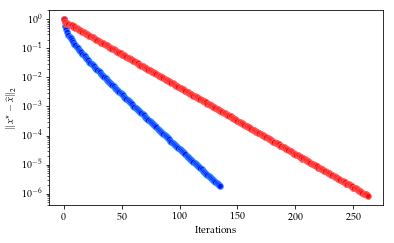

0.9


In [8]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000


eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2

#eta_GD = 1/L
#eta_HB = 1/L

#beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))

plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.plot(xs_HB, x_list_HB, '-o', color = '#FF6666', linewidth = 4, alpha = 0.7, markerfacecolor = 'r')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Nesterov acceleration

+ Acceleration #1: 

\begin{align}
\beta = \frac{\theta_t - 1}{\theta_{t+1}}, ~~\text{where}~~ \theta_0 = 1, ~\theta_{t+1} = \frac{1 + \sqrt{1 + 4\theta_t^2}}{2}
\end{align}

In [9]:
def Nesterov1(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    theta_cur = 1
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        theta_prev = theta_cur
        theta_cur = (1 + np.sqrt(1 + 4*theta_prev**2))/2
        beta = (theta_prev - 1)/theta_cur
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.4915983207819154
iter# = 1, ||x_new - x_old||_2 = 0.17377171214282133
iter# = 2, ||x_new - x_old||_2 = 0.10116319583513288
iter# = 3, ||x_new - x_old||_2 = 0.07035237289822183
iter# = 4, ||x_new - x_old||_2 = 0.05332007432966513
iter# = 5, ||x_new - x_old||_2 = 0.042437909927747625
iter# = 6, ||x_new - x_old||_2 = 0.034868763458299555
iter# = 7, ||x_new - x_old||_2 = 0.029308285135308344
iter# = 8, ||x_new - x_old||_2 = 0.025064053972865596
iter# = 9, ||x_new - x_old||_2 = 0.021730079481104947
iter# = 10, ||x_new - x_old||_2 = 0.019050957142162133
iter# = 11, ||x_new - x_old||_2 = 0.01685756449140244
iter# = 12, ||x_new - x_old||_2 = 0.015033490940365893
iter# = 13, ||x_new - x_old||_2 = 0.013496124147134182
iter# = 14, ||x_new - x_old||_2 = 0.012185347112060207
iter# = 15, ||x_new - x_old||_2 = 0.011056468420831769
iter# = 16, ||x_new - x_old||_2 = 0.010075639166953261
iter# = 17, ||x_new - x_old||_2 = 0.009216794990164106
iter# = 18, ||x_new - x_old

iter# = 192, ||x_new - x_old||_2 = 1.6874410305610665e-06
iter# = 193, ||x_new - x_old||_2 = 1.615129719006826e-06
iter# = 194, ||x_new - x_old||_2 = 1.5459379401338847e-06
iter# = 195, ||x_new - x_old||_2 = 1.4797300865856577e-06
iter# = 196, ||x_new - x_old||_2 = 1.4163764982747565e-06
iter# = 197, ||x_new - x_old||_2 = 1.3557531987660037e-06
iter# = 198, ||x_new - x_old||_2 = 1.2977416435809257e-06
iter# = 199, ||x_new - x_old||_2 = 1.2422284796972432e-06
iter# = 200, ||x_new - x_old||_2 = 1.1891053159274885e-06
iter# = 201, ||x_new - x_old||_2 = 1.1382685034776499e-06
iter# = 202, ||x_new - x_old||_2 = 1.0896189264132447e-06
iter# = 203, ||x_new - x_old||_2 = 1.0430618014633002e-06
Number of steps: 205
iter# = 0, ||x_new - x_old||_2 = 0.4915983207819154
iter# = 1, ||x_new - x_old||_2 = 0.4654205706023284
iter# = 2, ||x_new - x_old||_2 = 0.24604821024107681
iter# = 3, ||x_new - x_old||_2 = 0.2468617333573053
iter# = 4, ||x_new - x_old||_2 = 0.21272430743455475
iter# = 5, ||x_new - x

iter# = 114, ||x_new - x_old||_2 = 3.072378893256413e-05
iter# = 115, ||x_new - x_old||_2 = 3.05299770666839e-05
iter# = 116, ||x_new - x_old||_2 = 3.1062611303739144e-05
iter# = 117, ||x_new - x_old||_2 = 3.189011075634088e-05
iter# = 118, ||x_new - x_old||_2 = 3.262923033260666e-05
iter# = 119, ||x_new - x_old||_2 = 3.3005941703952996e-05
iter# = 120, ||x_new - x_old||_2 = 3.286112623798777e-05
iter# = 121, ||x_new - x_old||_2 = 3.213507482271082e-05
iter# = 122, ||x_new - x_old||_2 = 3.0849018001903376e-05
iter# = 123, ||x_new - x_old||_2 = 2.9089467038826733e-05
iter# = 124, ||x_new - x_old||_2 = 2.6995927681685398e-05
iter# = 125, ||x_new - x_old||_2 = 2.475049923765236e-05
iter# = 126, ||x_new - x_old||_2 = 2.2565828683388306e-05
iter# = 127, ||x_new - x_old||_2 = 2.0664473489761217e-05
iter# = 128, ||x_new - x_old||_2 = 1.924043209319224e-05
iter# = 129, ||x_new - x_old||_2 = 1.8402781626768925e-05
iter# = 130, ||x_new - x_old||_2 = 1.8129190835358247e-05
iter# = 131, ||x_new - 

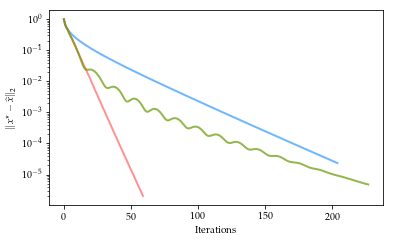

0.6400000000000005


In [11]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

#eta_GD = 2/(L + mu)
#eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2

eta_GD = 1/L
eta_HB = 1/L

beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
#beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_GD, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

#### Some observations

+ The curve has ripples: Actually, Nesterov's method is not a descent method (i.e., it does not guarantee that *per iteration* the distance to the optimum (and the function values) should drop)
+ Nesterov's method is hyper-parameter free: you don't have to worry about how to set up the momentum parameter.
+ It actually works (even in theory) beyond strongly convex functions: we presented a theorem for the Heavy Ball method that shows acceleration, but assumes strong convexity (as well as knowing many parameters such as Lipschitz gradient continuity, strong convexity). Nesterov's method requires only the knowledge of the Lipschitz gradient continuity (which is the easiest to learn - why?)

In [25]:
def Nesterov2(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        beta = i / (i + 3)
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 1.0023720987969986
iter# = 1, ||x_new - x_old||_2 = 0.5861791662151223
iter# = 2, ||x_new - x_old||_2 = 0.44043236459315876
iter# = 3, ||x_new - x_old||_2 = 0.35502133807882663
iter# = 4, ||x_new - x_old||_2 = 0.29595032750052114
iter# = 5, ||x_new - x_old||_2 = 0.25161403508338887
iter# = 6, ||x_new - x_old||_2 = 0.21671727337136606
iter# = 7, ||x_new - x_old||_2 = 0.18839876589667837
iter# = 8, ||x_new - x_old||_2 = 0.16492786066498408
iter# = 9, ||x_new - x_old||_2 = 0.14517177414315705
iter# = 10, ||x_new - x_old||_2 = 0.12834533880997243
iter# = 11, ||x_new - x_old||_2 = 0.11388042314151108
iter# = 12, ||x_new - x_old||_2 = 0.1013520424049375
iter# = 13, ||x_new - x_old||_2 = 0.09043379772187271
iter# = 14, ||x_new - x_old||_2 = 0.0808695909281451
iter# = 15, ||x_new - x_old||_2 = 0.07245490186366844
iter# = 16, ||x_new - x_old||_2 = 0.06502395660297279
iter# = 17, ||x_new - x_old||_2 = 0.058440673267428155
iter# = 18, ||x_new - x_old||_2 = 0.05259

iter# = 35, ||x_new - x_old||_2 = 0.0012393851185880805
iter# = 36, ||x_new - x_old||_2 = 0.0011293308274763542
iter# = 37, ||x_new - x_old||_2 = 0.0010719354911923997
iter# = 38, ||x_new - x_old||_2 = 0.0010533716988488412
iter# = 39, ||x_new - x_old||_2 = 0.001055000384112033
iter# = 40, ||x_new - x_old||_2 = 0.0010597966991506356
iter# = 41, ||x_new - x_old||_2 = 0.0010556534826339995
iter# = 42, ||x_new - x_old||_2 = 0.0010356995432992092
iter# = 43, ||x_new - x_old||_2 = 0.000997385237709831
iter# = 44, ||x_new - x_old||_2 = 0.0009414075887670307
iter# = 45, ||x_new - x_old||_2 = 0.0008708073451207061
iter# = 46, ||x_new - x_old||_2 = 0.0007902697655829963
iter# = 47, ||x_new - x_old||_2 = 0.0007055869781177936
iter# = 48, ||x_new - x_old||_2 = 0.0006232088285597914
iter# = 49, ||x_new - x_old||_2 = 0.0005497324579775129
iter# = 50, ||x_new - x_old||_2 = 0.0004910516030875349
iter# = 51, ||x_new - x_old||_2 = 0.0004509205991730153
iter# = 52, ||x_new - x_old||_2 = 0.00042936805768

iter# = 4, ||x_new - x_old||_2 = 0.07578301457661467
iter# = 5, ||x_new - x_old||_2 = 0.06206606767399872
iter# = 6, ||x_new - x_old||_2 = 0.05178883080880834
iter# = 7, ||x_new - x_old||_2 = 0.043704067942525265
iter# = 8, ||x_new - x_old||_2 = 0.037114958876245024
iter# = 9, ||x_new - x_old||_2 = 0.031594258751438335
iter# = 10, ||x_new - x_old||_2 = 0.026868786249461898
iter# = 11, ||x_new - x_old||_2 = 0.022767180840516106
iter# = 12, ||x_new - x_old||_2 = 0.01918242448775015
iter# = 13, ||x_new - x_old||_2 = 0.016044041998543413
iter# = 14, ||x_new - x_old||_2 = 0.013303162593166032
iter# = 15, ||x_new - x_old||_2 = 0.010926822040019808
iter# = 16, ||x_new - x_old||_2 = 0.008895332390215392
iter# = 17, ||x_new - x_old||_2 = 0.007199449540335582
iter# = 18, ||x_new - x_old||_2 = 0.0058365316995754694
iter# = 19, ||x_new - x_old||_2 = 0.004804268529731656
iter# = 20, ||x_new - x_old||_2 = 0.004089174877400884
iter# = 21, ||x_new - x_old||_2 = 0.0036514917457985633
iter# = 22, ||x_ne

iter# = 188, ||x_new - x_old||_2 = 2.317821126257018e-06
iter# = 189, ||x_new - x_old||_2 = 2.2554148542073176e-06
iter# = 190, ||x_new - x_old||_2 = 2.206731066399931e-06
iter# = 191, ||x_new - x_old||_2 = 2.1663953242337003e-06
iter# = 192, ||x_new - x_old||_2 = 2.1283420318049266e-06
iter# = 193, ||x_new - x_old||_2 = 2.087062832623665e-06
iter# = 194, ||x_new - x_old||_2 = 2.038530347987532e-06
iter# = 195, ||x_new - x_old||_2 = 1.9807095509748228e-06
iter# = 196, ||x_new - x_old||_2 = 1.9136949506114516e-06
iter# = 197, ||x_new - x_old||_2 = 1.8395481207911082e-06
iter# = 198, ||x_new - x_old||_2 = 1.7618920769306847e-06
iter# = 199, ||x_new - x_old||_2 = 1.6852903042515582e-06
iter# = 200, ||x_new - x_old||_2 = 1.6144350119582859e-06
iter# = 201, ||x_new - x_old||_2 = 1.5532185732752437e-06
iter# = 202, ||x_new - x_old||_2 = 1.5038633191121388e-06
iter# = 203, ||x_new - x_old||_2 = 1.4663741162775642e-06
iter# = 204, ||x_new - x_old||_2 = 1.4385427414004206e-06
iter# = 205, ||x_n

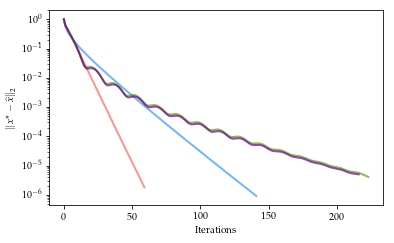

0.6399999999999999


In [27]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta_GD = 2/(L + mu)
#eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2

eta_HB = 1/L

beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
#beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_GD, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_GD, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

In [28]:
def Nesterov3(y, A, eta, L, mu, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 1.0023720987969986
iter# = 1, ||x_new - x_old||_2 = 0.5861791662151223
iter# = 2, ||x_new - x_old||_2 = 0.44043236459315876
iter# = 3, ||x_new - x_old||_2 = 0.35502133807882663
iter# = 4, ||x_new - x_old||_2 = 0.29595032750052114
iter# = 5, ||x_new - x_old||_2 = 0.25161403508338887
iter# = 6, ||x_new - x_old||_2 = 0.21671727337136606
iter# = 7, ||x_new - x_old||_2 = 0.18839876589667837
iter# = 8, ||x_new - x_old||_2 = 0.16492786066498408
iter# = 9, ||x_new - x_old||_2 = 0.14517177414315705
iter# = 10, ||x_new - x_old||_2 = 0.12834533880997243
iter# = 11, ||x_new - x_old||_2 = 0.11388042314151108
iter# = 12, ||x_new - x_old||_2 = 0.1013520424049375
iter# = 13, ||x_new - x_old||_2 = 0.09043379772187271
iter# = 14, ||x_new - x_old||_2 = 0.0808695909281451
iter# = 15, ||x_new - x_old||_2 = 0.07245490186366844
iter# = 16, ||x_new - x_old||_2 = 0.06502395660297279
iter# = 17, ||x_new - x_old||_2 = 0.058440673267428155
iter# = 18, ||x_new - x_old||_2 = 0.05259

iter# = 6, ||x_new - x_old||_2 = 0.8421848983158807
iter# = 7, ||x_new - x_old||_2 = 0.7001837546182803
iter# = 8, ||x_new - x_old||_2 = 0.740698593659146
iter# = 9, ||x_new - x_old||_2 = 0.7013225016147272
iter# = 10, ||x_new - x_old||_2 = 0.607298499643167
iter# = 11, ||x_new - x_old||_2 = 0.6423055862307345
iter# = 12, ||x_new - x_old||_2 = 0.5784158756940031
iter# = 13, ||x_new - x_old||_2 = 0.5384785506626872
iter# = 14, ||x_new - x_old||_2 = 0.535265883464419
iter# = 15, ||x_new - x_old||_2 = 0.5005374825301259
iter# = 16, ||x_new - x_old||_2 = 0.4535395748904985
iter# = 17, ||x_new - x_old||_2 = 0.4662088909009926
iter# = 18, ||x_new - x_old||_2 = 0.4152616214476119
iter# = 19, ||x_new - x_old||_2 = 0.39717017157590623
iter# = 20, ||x_new - x_old||_2 = 0.3974337035463756
iter# = 21, ||x_new - x_old||_2 = 0.34714069379538004
iter# = 22, ||x_new - x_old||_2 = 0.35089044707451633
iter# = 23, ||x_new - x_old||_2 = 0.3249420497959907
iter# = 24, ||x_new - x_old||_2 = 0.31073606637901

iter# = 186, ||x_new - x_old||_2 = 6.261117546187711e-05
iter# = 187, ||x_new - x_old||_2 = 5.774478205169044e-05
iter# = 188, ||x_new - x_old||_2 = 5.2608361178615534e-05
iter# = 189, ||x_new - x_old||_2 = 5.461858386025779e-05
iter# = 190, ||x_new - x_old||_2 = 4.7664935498765736e-05
iter# = 191, ||x_new - x_old||_2 = 4.654547953645523e-05
iter# = 192, ||x_new - x_old||_2 = 4.585528871156319e-05
iter# = 193, ||x_new - x_old||_2 = 4.016229989307618e-05
iter# = 194, ||x_new - x_old||_2 = 4.092682399336338e-05
iter# = 195, ||x_new - x_old||_2 = 3.8233516180699574e-05
iter# = 196, ||x_new - x_old||_2 = 3.4625448939414454e-05
iter# = 197, ||x_new - x_old||_2 = 3.540840493185743e-05
iter# = 198, ||x_new - x_old||_2 = 3.1608727303753355e-05
iter# = 199, ||x_new - x_old||_2 = 3.0435358027366698e-05
iter# = 200, ||x_new - x_old||_2 = 2.9818424746641767e-05
iter# = 201, ||x_new - x_old||_2 = 2.705460304033677e-05
iter# = 202, ||x_new - x_old||_2 = 2.6353354197719328e-05
iter# = 203, ||x_new - 

iter# = 106, ||x_new - x_old||_2 = 4.9224930929924166e-05
iter# = 107, ||x_new - x_old||_2 = 4.669961210264146e-05
iter# = 108, ||x_new - x_old||_2 = 4.361222180331712e-05
iter# = 109, ||x_new - x_old||_2 = 4.020671801355974e-05
iter# = 110, ||x_new - x_old||_2 = 3.678302069721969e-05
iter# = 111, ||x_new - x_old||_2 = 3.366822943726707e-05
iter# = 112, ||x_new - x_old||_2 = 3.116724811937719e-05
iter# = 113, ||x_new - x_old||_2 = 2.9487733745425432e-05
iter# = 114, ||x_new - x_old||_2 = 2.86644141092313e-05
iter# = 115, ||x_new - x_old||_2 = 2.8539518174324628e-05
iter# = 116, ||x_new - x_old||_2 = 2.882727290688628e-05
iter# = 117, ||x_new - x_old||_2 = 2.9216491150899288e-05
iter# = 118, ||x_new - x_old||_2 = 2.9447472288136965e-05
iter# = 119, ||x_new - x_old||_2 = 2.9344010842477932e-05
iter# = 120, ||x_new - x_old||_2 = 2.8815378697254613e-05
iter# = 121, ||x_new - x_old||_2 = 2.7846063002195943e-05
iter# = 122, ||x_new - x_old||_2 = 2.6482919116986494e-05
iter# = 123, ||x_new - 

iter# = 71, ||x_new - x_old||_2 = 0.00017107044830343664
iter# = 72, ||x_new - x_old||_2 = 0.00017143083602163232
iter# = 73, ||x_new - x_old||_2 = 0.00017049940270891676
iter# = 74, ||x_new - x_old||_2 = 0.00016758863231443048
iter# = 75, ||x_new - x_old||_2 = 0.00016242928153768348
iter# = 76, ||x_new - x_old||_2 = 0.00015508987277021666
iter# = 77, ||x_new - x_old||_2 = 0.00014590305019229467
iter# = 78, ||x_new - x_old||_2 = 0.0001354053275129115
iter# = 79, ||x_new - x_old||_2 = 0.00012428699243950252
iter# = 80, ||x_new - x_old||_2 = 0.00011334250491616048
iter# = 81, ||x_new - x_old||_2 = 0.00010340364869361483
iter# = 82, ||x_new - x_old||_2 = 9.523082334203966e-05
iter# = 83, ||x_new - x_old||_2 = 8.93506396443444e-05
iter# = 84, ||x_new - x_old||_2 = 8.588514352506775e-05
iter# = 85, ||x_new - x_old||_2 = 8.448657556789092e-05
iter# = 86, ||x_new - x_old||_2 = 8.44559597141434e-05
iter# = 87, ||x_new - x_old||_2 = 8.497597864168302e-05
iter# = 88, ||x_new - x_old||_2 = 8.5315

iter# = 47, ||x_new - x_old||_2 = 3.0795984707817926e-06
iter# = 48, ||x_new - x_old||_2 = 2.4675740662605105e-06
iter# = 49, ||x_new - x_old||_2 = 1.979378249974077e-06
iter# = 50, ||x_new - x_old||_2 = 1.589494748715593e-06
iter# = 51, ||x_new - x_old||_2 = 1.2777117666506596e-06
iter# = 52, ||x_new - x_old||_2 = 1.0280289968469763e-06
Number of steps: 54


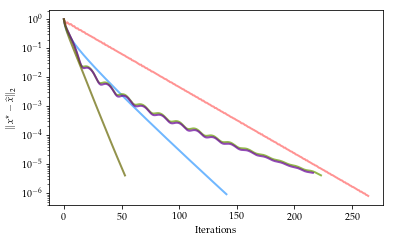

0.9


In [32]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2

#eta_GD = 1/L
#eta_HB = 1/L

#beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_GD, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_GD, iters, epsilon, True, x_star)
x_Nest3, x_list_Nest3, f_list_Nest3 = Nesterov3(y, A, eta_GD, L, mu, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))
xs_Nest3 = range(len(x_list_Nest3))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest3, x_list_Nest3, '-', color = '#666600', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Stochastic gradient descent vs. gradient descent

+ Here, we consider two cases: linear regression and logistic regression

### Well-conditioned linear regression

In [33]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

2.000000000000001


In [34]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [35]:
def SGD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Select randomly an index
        j = np.random.randint(n, size = 50)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


iter# = 0, ||x_new - x_old||_2 = 0.6198431551894575
iter# = 1, ||x_new - x_old||_2 = 0.20886927373656128
iter# = 2, ||x_new - x_old||_2 = 0.10608092849618757
iter# = 3, ||x_new - x_old||_2 = 0.06165927856375175
iter# = 4, ||x_new - x_old||_2 = 0.03834423790203353
iter# = 5, ||x_new - x_old||_2 = 0.024816639797422536
iter# = 6, ||x_new - x_old||_2 = 0.01648791343401291
iter# = 7, ||x_new - x_old||_2 = 0.011158836422842449
iter# = 8, ||x_new - x_old||_2 = 0.007656908771438242
iter# = 9, ||x_new - x_old||_2 = 0.00531042405331517
iter# = 10, ||x_new - x_old||_2 = 0.003714651289828889
iter# = 11, ||x_new - x_old||_2 = 0.002616647762708138
iter# = 12, ||x_new - x_old||_2 = 0.001853960803520005
iter# = 13, ||x_new - x_old||_2 = 0.0013200373630735875
iter# = 14, ||x_new - x_old||_2 = 0.0009438119644667956
iter# = 15, ||x_new - x_old||_2 = 0.0006772388293302358
iter# = 16, ||x_new - x_old||_2 = 0.00048746704448185825
iter# = 17, ||x_new - x_old||_2 = 0.00035182122967935533
iter# = 18, ||x_new -

iter# = 432, ||x_new - x_old||_2 = 0.00024304991506383724
iter# = 433, ||x_new - x_old||_2 = 0.0002011085132588679
iter# = 434, ||x_new - x_old||_2 = 0.0001914091973707206
iter# = 435, ||x_new - x_old||_2 = 0.00016253839605197452
iter# = 436, ||x_new - x_old||_2 = 0.00018151922076171663
iter# = 437, ||x_new - x_old||_2 = 0.00014399882749242847
iter# = 438, ||x_new - x_old||_2 = 0.00018943319001107136
iter# = 439, ||x_new - x_old||_2 = 0.00012797848560775222
iter# = 440, ||x_new - x_old||_2 = 0.0001898381636079886
iter# = 441, ||x_new - x_old||_2 = 0.0003134568030845531
iter# = 442, ||x_new - x_old||_2 = 0.00010684421454437865
iter# = 443, ||x_new - x_old||_2 = 0.00015381496292497576
iter# = 444, ||x_new - x_old||_2 = 0.00012458629704953025
iter# = 445, ||x_new - x_old||_2 = 0.00018701550950197862
iter# = 446, ||x_new - x_old||_2 = 0.00012397167884366312
iter# = 447, ||x_new - x_old||_2 = 0.000101121573505351
iter# = 448, ||x_new - x_old||_2 = 0.00010956664664929535
iter# = 449, ||x_new

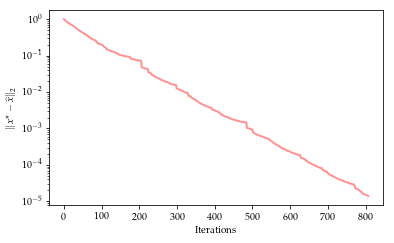

In [37]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta = 1/L

x_GD, x_list_GD, f_list_GD = GD(y, A, eta, iters, epsilon, True, x_star)
x_SGD, x_list_SGD, f_list_SGD = SGD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(x_list_GD)*n, n)
xs_SGD = range(len(x_list_SGD))
plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, x_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

In [38]:
# Ill-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 100, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

99.99999999999997


iter# = 0, ||x_new - x_old||_2 = 0.46584366729997806
iter# = 1, ||x_new - x_old||_2 = 0.15701979776111644
iter# = 2, ||x_new - x_old||_2 = 0.09224326712994614
iter# = 3, ||x_new - x_old||_2 = 0.06350360573192401
iter# = 4, ||x_new - x_old||_2 = 0.04724012229028746
iter# = 5, ||x_new - x_old||_2 = 0.03700310090661079
iter# = 6, ||x_new - x_old||_2 = 0.030125815481535777
iter# = 7, ||x_new - x_old||_2 = 0.025269959791148308
iter# = 8, ||x_new - x_old||_2 = 0.02169574004643922
iter# = 9, ||x_new - x_old||_2 = 0.018969722607488946
iter# = 10, ||x_new - x_old||_2 = 0.016826920702420797
iter# = 11, ||x_new - x_old||_2 = 0.015099386018092806
iter# = 12, ||x_new - x_old||_2 = 0.013677083289012314
iter# = 13, ||x_new - x_old||_2 = 0.01248560441299251
iter# = 14, ||x_new - x_old||_2 = 0.01147308764690867
iter# = 15, ||x_new - x_old||_2 = 0.010602338580293193
iter# = 16, ||x_new - x_old||_2 = 0.009845967980712227
iter# = 17, ||x_new - x_old||_2 = 0.009183319008736538
iter# = 18, ||x_new - x_old||

iter# = 148, ||x_new - x_old||_2 = 0.0006914816829752498
iter# = 149, ||x_new - x_old||_2 = 0.0006851549651525769
iter# = 150, ||x_new - x_old||_2 = 0.0006789257509749154
iter# = 151, ||x_new - x_old||_2 = 0.000672792094083127
iter# = 152, ||x_new - x_old||_2 = 0.0006667520952322479
iter# = 153, ||x_new - x_old||_2 = 0.0006608039008702246
iter# = 154, ||x_new - x_old||_2 = 0.0006549457017711607
iter# = 155, ||x_new - x_old||_2 = 0.0006491757317204722
iter# = 156, ||x_new - x_old||_2 = 0.0006434922662495059
iter# = 157, ||x_new - x_old||_2 = 0.0006378936214173954
iter# = 158, ||x_new - x_old||_2 = 0.000632378152637994
iter# = 159, ||x_new - x_old||_2 = 0.0006269442535497536
iter# = 160, ||x_new - x_old||_2 = 0.0006215903549267205
iter# = 161, ||x_new - x_old||_2 = 0.0006163149236287504
iter# = 162, ||x_new - x_old||_2 = 0.0006111164615891989
iter# = 163, ||x_new - x_old||_2 = 0.0006059935048384451
iter# = 164, ||x_new - x_old||_2 = 0.0006009446225617286
iter# = 165, ||x_new - x_old||_2 

iter# = 325, ||x_new - x_old||_2 = 0.00024239712800372293
iter# = 326, ||x_new - x_old||_2 = 0.00024143741140861353
iter# = 327, ||x_new - x_old||_2 = 0.00024048439972231505
iter# = 328, ||x_new - x_old||_2 = 0.00023953802130246817
iter# = 329, ||x_new - x_old||_2 = 0.00023859820555353843
iter# = 330, ||x_new - x_old||_2 = 0.00023766488290836158
iter# = 331, ||x_new - x_old||_2 = 0.00023673798481003885
iter# = 332, ||x_new - x_old||_2 = 0.000235817443694201
iter# = 333, ||x_new - x_old||_2 = 0.00023490319297160412
iter# = 334, ||x_new - x_old||_2 = 0.00023399516701107573
iter# = 335, ||x_new - x_old||_2 = 0.00023309330112278916
iter# = 336, ||x_new - x_old||_2 = 0.00023219753154184443
iter# = 337, ||x_new - x_old||_2 = 0.00023130779541218993
iter# = 338, ||x_new - x_old||_2 = 0.00023042403077084642
iter# = 339, ||x_new - x_old||_2 = 0.00022954617653242837
iter# = 340, ||x_new - x_old||_2 = 0.00022867417247397399
iter# = 341, ||x_new - x_old||_2 = 0.0002278079592200547
iter# = 342, ||x_

iter# = 509, ||x_new - x_old||_2 = 0.0001347651227043679
iter# = 510, ||x_new - x_old||_2 = 0.00013441287447703263
iter# = 511, ||x_new - x_old||_2 = 0.00013406218170636
iter# = 512, ||x_new - x_old||_2 = 0.00013371303498294892
iter# = 513, ||x_new - x_old||_2 = 0.00013336542497366025
iter# = 514, ||x_new - x_old||_2 = 0.0001330193424208021
iter# = 515, ||x_new - x_old||_2 = 0.00013267477814130207
iter# = 516, ||x_new - x_old||_2 = 0.00013233172302593295
iter# = 517, ||x_new - x_old||_2 = 0.00013199016803851918
iter# = 518, ||x_new - x_old||_2 = 0.00013165010421515316
iter# = 519, ||x_new - x_old||_2 = 0.000131311522663463
iter# = 520, ||x_new - x_old||_2 = 0.00013097441456181943
iter# = 521, ||x_new - x_old||_2 = 0.00013063877115862015
iter# = 522, ||x_new - x_old||_2 = 0.00013030458377153784
iter# = 523, ||x_new - x_old||_2 = 0.00012997184378681794
iter# = 524, ||x_new - x_old||_2 = 0.00012964054265854
iter# = 525, ||x_new - x_old||_2 = 0.00012931067190793252
iter# = 526, ||x_new - x

iter# = 691, ||x_new - x_old||_2 = 8.942781704210068e-05
iter# = 692, ||x_new - x_old||_2 = 8.925465868500706e-05
iter# = 693, ||x_new - x_old||_2 = 8.908209981128398e-05
iter# = 694, ||x_new - x_old||_2 = 8.891013765581069e-05
iter# = 695, ||x_new - x_old||_2 = 8.873876946921059e-05
iter# = 696, ||x_new - x_old||_2 = 8.856799251773859e-05
iter# = 697, ||x_new - x_old||_2 = 8.839780408313856e-05
iter# = 698, ||x_new - x_old||_2 = 8.822820146258495e-05
iter# = 699, ||x_new - x_old||_2 = 8.805918196853214e-05
iter# = 700, ||x_new - x_old||_2 = 8.789074292862472e-05
iter# = 701, ||x_new - x_old||_2 = 8.772288168559703e-05
iter# = 702, ||x_new - x_old||_2 = 8.755559559714334e-05
iter# = 703, ||x_new - x_old||_2 = 8.738888203585127e-05
iter# = 704, ||x_new - x_old||_2 = 8.722273838904728e-05
iter# = 705, ||x_new - x_old||_2 = 8.705716205875101e-05
iter# = 706, ||x_new - x_old||_2 = 8.689215046152985e-05
iter# = 707, ||x_new - x_old||_2 = 8.672770102840766e-05
iter# = 708, ||x_new - x_old||_

iter# = 867, ||x_new - x_old||_2 = 6.620362008746274e-05
iter# = 868, ||x_new - x_old||_2 = 6.610414095823563e-05
iter# = 869, ||x_new - x_old||_2 = 6.600494518054871e-05
iter# = 870, ||x_new - x_old||_2 = 6.590603163891831e-05
iter# = 871, ||x_new - x_old||_2 = 6.580739922310296e-05
iter# = 872, ||x_new - x_old||_2 = 6.570904682808818e-05
iter# = 873, ||x_new - x_old||_2 = 6.561097335407383e-05
iter# = 874, ||x_new - x_old||_2 = 6.551317770640774e-05
iter# = 875, ||x_new - x_old||_2 = 6.541565879560074e-05
iter# = 876, ||x_new - x_old||_2 = 6.531841553726507e-05
iter# = 877, ||x_new - x_old||_2 = 6.522144685209339e-05
iter# = 878, ||x_new - x_old||_2 = 6.512475166583718e-05
iter# = 879, ||x_new - x_old||_2 = 6.502832890929437e-05
iter# = 880, ||x_new - x_old||_2 = 6.493217751824886e-05
iter# = 881, ||x_new - x_old||_2 = 6.483629643344634e-05
iter# = 882, ||x_new - x_old||_2 = 6.474068460060686e-05
iter# = 883, ||x_new - x_old||_2 = 6.464534097036483e-05
iter# = 884, ||x_new - x_old||_

iter# = 194, ||x_new - x_old||_2 = 0.010497856069890187
iter# = 195, ||x_new - x_old||_2 = 0.01000505594413021
iter# = 196, ||x_new - x_old||_2 = 0.009207343602652728
iter# = 197, ||x_new - x_old||_2 = 0.010742944750495179
iter# = 198, ||x_new - x_old||_2 = 0.009780991783260192
iter# = 199, ||x_new - x_old||_2 = 0.010283379610133621
iter# = 200, ||x_new - x_old||_2 = 0.00987739296022101
iter# = 201, ||x_new - x_old||_2 = 0.012191628453634305
iter# = 202, ||x_new - x_old||_2 = 0.010707797846000526
iter# = 203, ||x_new - x_old||_2 = 0.008889008692541847
iter# = 204, ||x_new - x_old||_2 = 0.010854638297493923
iter# = 205, ||x_new - x_old||_2 = 0.010228732782591905
iter# = 206, ||x_new - x_old||_2 = 0.012951845284197034
iter# = 207, ||x_new - x_old||_2 = 0.009425905890388725
iter# = 208, ||x_new - x_old||_2 = 0.00952043875689624
iter# = 209, ||x_new - x_old||_2 = 0.00990734208963445
iter# = 210, ||x_new - x_old||_2 = 0.012558377111381712
iter# = 211, ||x_new - x_old||_2 = 0.010128719154516

iter# = 591, ||x_new - x_old||_2 = 0.004095989324950029
iter# = 592, ||x_new - x_old||_2 = 0.004646827782592879
iter# = 593, ||x_new - x_old||_2 = 0.004526676082976572
iter# = 594, ||x_new - x_old||_2 = 0.005349555845750373
iter# = 595, ||x_new - x_old||_2 = 0.004818583094487216
iter# = 596, ||x_new - x_old||_2 = 0.0049931294793777664
iter# = 597, ||x_new - x_old||_2 = 0.0033575924618933464
iter# = 598, ||x_new - x_old||_2 = 0.004508553375048489
iter# = 599, ||x_new - x_old||_2 = 0.004472532716893342
iter# = 600, ||x_new - x_old||_2 = 0.004953082285927106
iter# = 601, ||x_new - x_old||_2 = 0.0036121539513572663
iter# = 602, ||x_new - x_old||_2 = 0.00561557286609141
iter# = 603, ||x_new - x_old||_2 = 0.00552125011925561
iter# = 604, ||x_new - x_old||_2 = 0.004041875107433465
iter# = 605, ||x_new - x_old||_2 = 0.0043101696108791485
iter# = 606, ||x_new - x_old||_2 = 0.004708871829255572
iter# = 607, ||x_new - x_old||_2 = 0.004832438686261604
iter# = 608, ||x_new - x_old||_2 = 0.005325287

iter# = 974, ||x_new - x_old||_2 = 0.003658993812812142
iter# = 975, ||x_new - x_old||_2 = 0.0034523480338407783
iter# = 976, ||x_new - x_old||_2 = 0.003396204243237572
iter# = 977, ||x_new - x_old||_2 = 0.003414288987193202
iter# = 978, ||x_new - x_old||_2 = 0.0037102821578528
iter# = 979, ||x_new - x_old||_2 = 0.002475408180355376
iter# = 980, ||x_new - x_old||_2 = 0.004018803898130923
iter# = 981, ||x_new - x_old||_2 = 0.003247621800524916
iter# = 982, ||x_new - x_old||_2 = 0.0026996459974559473
iter# = 983, ||x_new - x_old||_2 = 0.003936420319881949
iter# = 984, ||x_new - x_old||_2 = 0.003127504276985078
iter# = 985, ||x_new - x_old||_2 = 0.003225284439425153
iter# = 986, ||x_new - x_old||_2 = 0.003915635681721513
iter# = 987, ||x_new - x_old||_2 = 0.0028374460002939575
iter# = 988, ||x_new - x_old||_2 = 0.0029103376713304563
iter# = 989, ||x_new - x_old||_2 = 0.0034601531027891137
iter# = 990, ||x_new - x_old||_2 = 0.002675654107888166
iter# = 991, ||x_new - x_old||_2 = 0.00273355

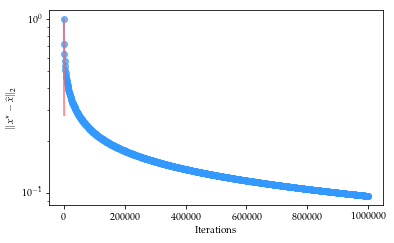

In [39]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta = 1/L

x_GD, x_list_GD, f_list_GD = GD(y, A, eta, iters, epsilon, True, x_star)
x_SGD, x_list_SGD, f_list_SGD = SGD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(x_list_GD)*n, n)
xs_SGD = range(len(x_list_SGD))
plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, x_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Logistic regression

In [40]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from numpy import linalg as la

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [41]:
# Returns the value of the objecive function
def f(x, y, A, l):
    f_val = 0
    n, p = np.shape(A)
    
    for i in range(n):
        a = A[i, :]
        f_val += (1/n) * np.log(1 + np.exp(-y[i] * a.dot(x))) 
    f_val += l * la.norm(x)**2
    
    return f_val

In [42]:
def GD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

In [43]:
def SGD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        
        J = np.random.randint(n, size = 50)
        for j in J:
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

iter# = 0, ||x_new - x_star||_2 = 0.7068741602241811, f(x_new) = 119.47049548519111
iter# = 1, ||x_new - x_star||_2 = 0.6927326662362024, f(x_new) = 114.7197122360951
iter# = 2, ||x_new - x_star||_2 = 0.6788738217089724, f(x_new) = 110.15711725543461
iter# = 3, ||x_new - x_star||_2 = 0.6652919655525089, f(x_new) = 105.77525966599168
iter# = 4, ||x_new - x_star||_2 = 0.6519815495345773, f(x_new) = 101.56698367824532
iter# = 5, ||x_new - x_star||_2 = 0.6389371360078709, f(x_new) = 97.5254169056813
iter# = 6, ||x_new - x_star||_2 = 0.6261533956821075, f(x_new) = 93.64395914282359
iter# = 7, ||x_new - x_star||_2 = 0.613625105439987, f(x_new) = 89.91627158766521
iter# = 8, ||x_new - x_star||_2 = 0.6013471461959732, f(x_new) = 86.33626649090212
iter# = 9, ||x_new - x_star||_2 = 0.5893145007968652, f(x_new) = 82.89809721507422
iter# = 10, ||x_new - x_star||_2 = 0.5775222519631643, f(x_new) = 79.59614868738379
iter# = 11, ||x_new - x_star||_2 = 0.5659655802702522, f(x_new) = 76.42502823061041


iter# = 97, ||x_new - x_star||_2 = 0.09492583210953756, f(x_new) = 2.2069557041472456
iter# = 98, ||x_new - x_star||_2 = 0.0927255477600137, f(x_new) = 2.121979171698548
iter# = 99, ||x_new - x_star||_2 = 0.09055751753662535, f(x_new) = 2.04093854325936
iter# = 100, ||x_new - x_star||_2 = 0.08842089633145295, f(x_new) = 1.9636856452216356
iter# = 101, ||x_new - x_star||_2 = 0.08631488395430552, f(x_new) = 1.8900776430694193
iter# = 102, ||x_new - x_star||_2 = 0.08423872799307602, f(x_new) = 1.8199767713094728
iter# = 103, ||x_new - x_star||_2 = 0.08219172674198569, f(x_new) = 1.7532500732346734
iter# = 104, ||x_new - x_star||_2 = 0.0801732321530626, f(x_new) = 1.6897691506779804
iter# = 105, ||x_new - x_star||_2 = 0.07818265275692869, f(x_new) = 1.6294099239944657
iter# = 106, ||x_new - x_star||_2 = 0.0762194564896293, f(x_new) = 1.5720524025842515
iter# = 107, ||x_new - x_star||_2 = 0.07428317335331515, f(x_new) = 1.5175804663385795
iter# = 108, ||x_new - x_star||_2 = 0.07237339783062

iter# = 191, ||x_new - x_star||_2 = 0.003468080045430681, f(x_new) = 0.667905424352323
iter# = 192, ||x_new - x_star||_2 = 0.0033367227641605745, f(x_new) = 0.6677961936601274
iter# = 193, ||x_new - x_star||_2 = 0.0032105042309691144, f(x_new) = 0.667695067910836
iter# = 194, ||x_new - x_star||_2 = 0.0030892168591602023, f(x_new) = 0.6676014362284061
iter# = 195, ||x_new - x_star||_2 = 0.002972661612609534, f(x_new) = 0.6675147345098839
iter# = 196, ||x_new - x_star||_2 = 0.002860647662801867, f(x_new) = 0.6674344417921265
iter# = 197, ||x_new - x_star||_2 = 0.002752992057202466, f(x_new) = 0.6673600769037455
iter# = 198, ||x_new - x_star||_2 = 0.002649519398953931, f(x_new) = 0.6672911953798246
iter# = 199, ||x_new - x_star||_2 = 0.002550061537828944, f(x_new) = 0.6672273866187189
iter# = 200, ||x_new - x_star||_2 = 0.002454457272318686, f(x_new) = 0.6671682712618542
iter# = 201, ||x_new - x_star||_2 = 0.002362552062694417, f(x_new) = 0.6671134987788925
iter# = 202, ||x_new - x_star||

iter# = 284, ||x_new - x_star||_2 = 0.0001130151462995778, f(x_new) = 0.6664130973324558
iter# = 285, ||x_new - x_star||_2 = 0.00010907200753096754, f(x_new) = 0.6664129804400112
iter# = 286, ||x_new - x_star||_2 = 0.00010526843851214577, f(x_new) = 0.6664128715569874
iter# = 287, ||x_new - x_star||_2 = 0.00010159941160179922, f(x_new) = 0.6664127701307777
iter# = 288, ||x_new - x_star||_2 = 9.806008421242433e-05, f(x_new) = 0.6664126756472172
iter# = 289, ||x_new - x_star||_2 = 9.464579181654041e-05, f(x_new) = 0.6664125876278547
iter# = 290, ||x_new - x_star||_2 = 9.13520412257833e-05, f(x_new) = 0.6664125056274525
iter# = 291, ||x_new - x_star||_2 = 8.817450413189832e-05, f(x_new) = 0.6664124292316774
iter# = 292, ||x_new - x_star||_2 = 8.510901089902433e-05, f(x_new) = 0.6664123580549299
iter# = 293, ||x_new - x_star||_2 = 8.215154459704672e-05, f(x_new) = 0.6664122917383274
iter# = 294, ||x_new - x_star||_2 = 7.9298235266437e-05, f(x_new) = 0.6664122299478492
iter# = 295, ||x_new 

iter# = 376, ||x_new - x_star||_2 = 4.580438374093992e-06, f(x_new) = 0.6664113836274927
iter# = 377, ||x_new - x_star||_2 = 4.425942107972907e-06, f(x_new) = 0.666411383434905
iter# = 378, ||x_new - x_star||_2 = 4.276695463256909e-06, f(x_new) = 0.6664113832550873
iter# = 379, ||x_new - x_star||_2 = 4.132518531516936e-06, f(x_new) = 0.6664113830871894
iter# = 380, ||x_new - x_star||_2 = 3.993237631861653e-06, f(x_new) = 0.6664113829304159
iter# = 381, ||x_new - x_star||_2 = 3.858685092798704e-06, f(x_new) = 0.6664113827840313
iter# = 382, ||x_new - x_star||_2 = 3.728699041894806e-06, f(x_new) = 0.6664113826473402
iter# = 383, ||x_new - x_star||_2 = 3.6031232028430785e-06, f(x_new) = 0.6664113825196988
iter# = 384, ||x_new - x_star||_2 = 3.481806699782498e-06, f(x_new) = 0.6664113824005081
iter# = 385, ||x_new - x_star||_2 = 3.3646038684947795e-06, f(x_new) = 0.666411382289209
iter# = 386, ||x_new - x_star||_2 = 3.2513740743658163e-06, f(x_new) = 0.6664113821852748
iter# = 387, ||x_new

iter# = 18, ||x_new - x_star||_2 = 0.46275459583857353, f(x_new) = 60.709159515713175
iter# = 19, ||x_new - x_star||_2 = 0.4535665565874424, f(x_new) = 58.48800192274314
iter# = 20, ||x_new - x_star||_2 = 0.44450675986833477, f(x_new) = 56.35117772487163
iter# = 21, ||x_new - x_star||_2 = 0.4355369834284421, f(x_new) = 54.295808408237775
iter# = 22, ||x_new - x_star||_2 = 0.4268286696479801, f(x_new) = 52.31840256386863
iter# = 23, ||x_new - x_star||_2 = 0.4183591839303231, f(x_new) = 50.415605284840254
iter# = 24, ||x_new - x_star||_2 = 0.4099866474027649, f(x_new) = 48.58488461236851
iter# = 25, ||x_new - x_star||_2 = 0.4017646363490366, f(x_new) = 46.823501713114496
iter# = 26, ||x_new - x_star||_2 = 0.3937317550050256, f(x_new) = 45.128695795575965
iter# = 27, ||x_new - x_star||_2 = 0.3858922123040397, f(x_new) = 43.49776200888545
iter# = 28, ||x_new - x_star||_2 = 0.37810309689805166, f(x_new) = 41.928646026068705
iter# = 29, ||x_new - x_star||_2 = 0.3705948439233018, f(x_new) = 4

iter# = 116, ||x_new - x_star||_2 = 0.06393519440732587, f(x_new) = 2.446544269507986
iter# = 117, ||x_new - x_star||_2 = 0.06266627504451792, f(x_new) = 2.3853511810359262
iter# = 118, ||x_new - x_star||_2 = 0.06136235022889688, f(x_new) = 2.3262864623870567
iter# = 119, ||x_new - x_star||_2 = 0.06020781460872703, f(x_new) = 2.26917578861005
iter# = 120, ||x_new - x_star||_2 = 0.05897638397677072, f(x_new) = 2.2140266058165428
iter# = 121, ||x_new - x_star||_2 = 0.05780269447930395, f(x_new) = 2.1607620270682135
iter# = 122, ||x_new - x_star||_2 = 0.056556428581752805, f(x_new) = 2.1093889129811814
iter# = 123, ||x_new - x_star||_2 = 0.05542351008761978, f(x_new) = 2.059766805732222
iter# = 124, ||x_new - x_star||_2 = 0.054320134206448156, f(x_new) = 2.011833954467036
iter# = 125, ||x_new - x_star||_2 = 0.053299681951997586, f(x_new) = 1.9654625997003037
iter# = 126, ||x_new - x_star||_2 = 0.05211080932661238, f(x_new) = 1.9207780184514143
iter# = 127, ||x_new - x_star||_2 = 0.0511877

iter# = 210, ||x_new - x_star||_2 = 0.009575170934085765, f(x_new) = 0.7447949192818396
iter# = 211, ||x_new - x_star||_2 = 0.009394235317637663, f(x_new) = 0.7428223935023698
iter# = 212, ||x_new - x_star||_2 = 0.00922351924280655, f(x_new) = 0.7409266861535917
iter# = 213, ||x_new - x_star||_2 = 0.009013455196806729, f(x_new) = 0.739109473771837
iter# = 214, ||x_new - x_star||_2 = 0.008843913241466885, f(x_new) = 0.7373507263363549
iter# = 215, ||x_new - x_star||_2 = 0.008717058424690817, f(x_new) = 0.7356564893905263
iter# = 216, ||x_new - x_star||_2 = 0.008489360833939152, f(x_new) = 0.7340307124453814
iter# = 217, ||x_new - x_star||_2 = 0.008238808706605365, f(x_new) = 0.7324811154777605
iter# = 218, ||x_new - x_star||_2 = 0.008138510692694799, f(x_new) = 0.7309839189817527
iter# = 219, ||x_new - x_star||_2 = 0.007979027908749615, f(x_new) = 0.7295319878544722
iter# = 220, ||x_new - x_star||_2 = 0.007786693176847147, f(x_new) = 0.7281487011983253
iter# = 221, ||x_new - x_star||_2 

iter# = 304, ||x_new - x_star||_2 = 0.0017838862229957635, f(x_new) = 0.6942541015084844
iter# = 305, ||x_new - x_star||_2 = 0.0017544793253930677, f(x_new) = 0.6941981714707742
iter# = 306, ||x_new - x_star||_2 = 0.0017326224551112827, f(x_new) = 0.6941421585008274
iter# = 307, ||x_new - x_star||_2 = 0.001788141405402102, f(x_new) = 0.6940938433736984
iter# = 308, ||x_new - x_star||_2 = 0.001685122225166503, f(x_new) = 0.6940490616195909
iter# = 309, ||x_new - x_star||_2 = 0.0017568545801559577, f(x_new) = 0.6939928383395971
iter# = 310, ||x_new - x_star||_2 = 0.0016584271618922165, f(x_new) = 0.6939522577766761
iter# = 311, ||x_new - x_star||_2 = 0.0016340040341986592, f(x_new) = 0.6939060829486347
iter# = 312, ||x_new - x_star||_2 = 0.0017331849432795999, f(x_new) = 0.6938571093543549
iter# = 313, ||x_new - x_star||_2 = 0.0016155968425931534, f(x_new) = 0.6938133229637052
iter# = 314, ||x_new - x_star||_2 = 0.0016196484813107406, f(x_new) = 0.6937784631653716
iter# = 315, ||x_new - 

iter# = 398, ||x_new - x_star||_2 = 0.0011258140470926437, f(x_new) = 0.6926874036937274
iter# = 399, ||x_new - x_star||_2 = 0.0011155634434963143, f(x_new) = 0.6926932544402504
iter# = 400, ||x_new - x_star||_2 = 0.0011041425464964267, f(x_new) = 0.692693895423569
iter# = 401, ||x_new - x_star||_2 = 0.001157183125920185, f(x_new) = 0.69269019284994
iter# = 402, ||x_new - x_star||_2 = 0.00113894003191319, f(x_new) = 0.6926913294896979
iter# = 403, ||x_new - x_star||_2 = 0.0010808208911288972, f(x_new) = 0.6926912582076075
iter# = 404, ||x_new - x_star||_2 = 0.001167513903790496, f(x_new) = 0.6926867217670586
iter# = 405, ||x_new - x_star||_2 = 0.0011152585420246659, f(x_new) = 0.6926820724589615
iter# = 406, ||x_new - x_star||_2 = 0.0011513915955166621, f(x_new) = 0.6926798930064098
iter# = 407, ||x_new - x_star||_2 = 0.0011855472870660197, f(x_new) = 0.6926777295908612
iter# = 408, ||x_new - x_star||_2 = 0.0011226244944434866, f(x_new) = 0.6926724589202476
iter# = 409, ||x_new - x_sta

iter# = 492, ||x_new - x_star||_2 = 0.00116031328246285, f(x_new) = 0.6925562976468588
iter# = 493, ||x_new - x_star||_2 = 0.00113562434039376, f(x_new) = 0.692551151417925
iter# = 494, ||x_new - x_star||_2 = 0.0011385694593847424, f(x_new) = 0.6925538461513913
iter# = 495, ||x_new - x_star||_2 = 0.00112462939247515, f(x_new) = 0.6925448771135861
iter# = 496, ||x_new - x_star||_2 = 0.0011112479677528706, f(x_new) = 0.692547652174294
iter# = 497, ||x_new - x_star||_2 = 0.0011170808011347641, f(x_new) = 0.6925455605798729
iter# = 498, ||x_new - x_star||_2 = 0.0011194794197445408, f(x_new) = 0.6925537256190029
iter# = 499, ||x_new - x_star||_2 = 0.00111074730037111, f(x_new) = 0.6925582780314941
iter# = 500, ||x_new - x_star||_2 = 0.001099015967228532, f(x_new) = 0.6925625903047599
iter# = 501, ||x_new - x_star||_2 = 0.0011784150648741353, f(x_new) = 0.6925645802827508
iter# = 502, ||x_new - x_star||_2 = 0.0011164506673592659, f(x_new) = 0.6925675677490943
iter# = 503, ||x_new - x_star||_

iter# = 586, ||x_new - x_star||_2 = 0.0011107347756855724, f(x_new) = 0.6925517576746147
iter# = 587, ||x_new - x_star||_2 = 0.0011265277696168947, f(x_new) = 0.6925559160350778
iter# = 588, ||x_new - x_star||_2 = 0.0011499109922243943, f(x_new) = 0.6925636159359095
iter# = 589, ||x_new - x_star||_2 = 0.0011534343271953145, f(x_new) = 0.6925582630074648
iter# = 590, ||x_new - x_star||_2 = 0.0011486898240402222, f(x_new) = 0.6925570161107615
iter# = 591, ||x_new - x_star||_2 = 0.0011333613871137977, f(x_new) = 0.6925603219096871
iter# = 592, ||x_new - x_star||_2 = 0.0011275390045075732, f(x_new) = 0.6925502692008514
iter# = 593, ||x_new - x_star||_2 = 0.0011377118539388424, f(x_new) = 0.6925532679132647
iter# = 594, ||x_new - x_star||_2 = 0.0011080372272519899, f(x_new) = 0.692558020828625
iter# = 595, ||x_new - x_star||_2 = 0.0011156427783680142, f(x_new) = 0.6925554968079355
iter# = 596, ||x_new - x_star||_2 = 0.0011579738073278782, f(x_new) = 0.6925573302908269
iter# = 597, ||x_new -

iter# = 680, ||x_new - x_star||_2 = 0.001197452824340315, f(x_new) = 0.6925703376368286
iter# = 681, ||x_new - x_star||_2 = 0.0011643205593311109, f(x_new) = 0.6925720622755245
iter# = 682, ||x_new - x_star||_2 = 0.0011399095992528296, f(x_new) = 0.6925755226835855
iter# = 683, ||x_new - x_star||_2 = 0.0011589774839277321, f(x_new) = 0.6925811631002082
iter# = 684, ||x_new - x_star||_2 = 0.0011368511649501138, f(x_new) = 0.6925852099970218
iter# = 685, ||x_new - x_star||_2 = 0.0011129284779368745, f(x_new) = 0.692588630374336
iter# = 686, ||x_new - x_star||_2 = 0.0011130183043801408, f(x_new) = 0.6925880626257526
iter# = 687, ||x_new - x_star||_2 = 0.0010992216467204006, f(x_new) = 0.6925745279689597
iter# = 688, ||x_new - x_star||_2 = 0.001128208136592668, f(x_new) = 0.6925814891049035
iter# = 689, ||x_new - x_star||_2 = 0.001159881944003867, f(x_new) = 0.6925710119046075
iter# = 690, ||x_new - x_star||_2 = 0.0011042074832203332, f(x_new) = 0.6925691241944184
iter# = 691, ||x_new - x_

iter# = 774, ||x_new - x_star||_2 = 0.0011273468517035558, f(x_new) = 0.6925813977705378
iter# = 775, ||x_new - x_star||_2 = 0.0011211277000432024, f(x_new) = 0.6925863986273981
iter# = 776, ||x_new - x_star||_2 = 0.0011409252774184817, f(x_new) = 0.6925899114872927
iter# = 777, ||x_new - x_star||_2 = 0.0011404020371705015, f(x_new) = 0.6925889556362099
iter# = 778, ||x_new - x_star||_2 = 0.0011365609731132764, f(x_new) = 0.6925859882310272
iter# = 779, ||x_new - x_star||_2 = 0.0011136204127924771, f(x_new) = 0.6925883292524209
iter# = 780, ||x_new - x_star||_2 = 0.0011228275373081117, f(x_new) = 0.6925863375890677
iter# = 781, ||x_new - x_star||_2 = 0.0011507051611402443, f(x_new) = 0.6925901325823426
iter# = 782, ||x_new - x_star||_2 = 0.001120115220302863, f(x_new) = 0.692598639188257
iter# = 783, ||x_new - x_star||_2 = 0.0011391896348434147, f(x_new) = 0.692592588035941
iter# = 784, ||x_new - x_star||_2 = 0.0011184551221127372, f(x_new) = 0.6926021646464088
iter# = 785, ||x_new - x

iter# = 868, ||x_new - x_star||_2 = 0.0011342713977664158, f(x_new) = 0.6925585027538963
iter# = 869, ||x_new - x_star||_2 = 0.0011003805045340061, f(x_new) = 0.6925585548194193
iter# = 870, ||x_new - x_star||_2 = 0.0011265151579228534, f(x_new) = 0.6925488988968724
iter# = 871, ||x_new - x_star||_2 = 0.001131268911525657, f(x_new) = 0.6925433019898037
iter# = 872, ||x_new - x_star||_2 = 0.0011365392737603865, f(x_new) = 0.6925405202802294
iter# = 873, ||x_new - x_star||_2 = 0.0011457773164745997, f(x_new) = 0.6925460731683943
iter# = 874, ||x_new - x_star||_2 = 0.0011211327960736716, f(x_new) = 0.6925399355635032
iter# = 875, ||x_new - x_star||_2 = 0.0011319395238565035, f(x_new) = 0.6925472593471168
iter# = 876, ||x_new - x_star||_2 = 0.0011265269111553214, f(x_new) = 0.6925654291060747
iter# = 877, ||x_new - x_star||_2 = 0.0011813737999321573, f(x_new) = 0.6925807384139285
iter# = 878, ||x_new - x_star||_2 = 0.0011396901471199513, f(x_new) = 0.6925880891065643
iter# = 879, ||x_new -

iter# = 962, ||x_new - x_star||_2 = 0.0011268313275980039, f(x_new) = 0.6925583853712977
iter# = 963, ||x_new - x_star||_2 = 0.0011181084125193638, f(x_new) = 0.6925568369386177
iter# = 964, ||x_new - x_star||_2 = 0.0011115030606779705, f(x_new) = 0.6925570285898108
iter# = 965, ||x_new - x_star||_2 = 0.0010931592831774854, f(x_new) = 0.6925611437226531
iter# = 966, ||x_new - x_star||_2 = 0.001148121949960955, f(x_new) = 0.692554734984767
iter# = 967, ||x_new - x_star||_2 = 0.0011575527177453398, f(x_new) = 0.6925553992584599
iter# = 968, ||x_new - x_star||_2 = 0.0011427385663708917, f(x_new) = 0.6925583185227367
iter# = 969, ||x_new - x_star||_2 = 0.0010993562641612858, f(x_new) = 0.6925640969097591
iter# = 970, ||x_new - x_star||_2 = 0.001147920732498995, f(x_new) = 0.6925632431744857
iter# = 971, ||x_new - x_star||_2 = 0.0011853965067278314, f(x_new) = 0.6925626898236703
iter# = 972, ||x_new - x_star||_2 = 0.001139894007984906, f(x_new) = 0.6925624590803734
iter# = 973, ||x_new - x_

iter# = 1054, ||x_new - x_star||_2 = 0.0011185337484803071, f(x_new) = 0.6925490649981836
iter# = 1055, ||x_new - x_star||_2 = 0.0011534489285279464, f(x_new) = 0.6925465103545962
iter# = 1056, ||x_new - x_star||_2 = 0.0010941100906444925, f(x_new) = 0.6925443971788344
iter# = 1057, ||x_new - x_star||_2 = 0.0011456613581054833, f(x_new) = 0.6925459463892044
iter# = 1058, ||x_new - x_star||_2 = 0.0010992807387413905, f(x_new) = 0.6925434476293827
iter# = 1059, ||x_new - x_star||_2 = 0.0011053413526631978, f(x_new) = 0.6925455387605297
iter# = 1060, ||x_new - x_star||_2 = 0.0011635617638018618, f(x_new) = 0.6925395964373775
iter# = 1061, ||x_new - x_star||_2 = 0.001119047375036479, f(x_new) = 0.692539544378986
iter# = 1062, ||x_new - x_star||_2 = 0.0011504816786574448, f(x_new) = 0.6925335106987601
iter# = 1063, ||x_new - x_star||_2 = 0.0011467918457427819, f(x_new) = 0.6925365137982348
iter# = 1064, ||x_new - x_star||_2 = 0.001094996295563576, f(x_new) = 0.6925413396315959
iter# = 1065,

iter# = 1146, ||x_new - x_star||_2 = 0.001093765913721712, f(x_new) = 0.6925244075417308
iter# = 1147, ||x_new - x_star||_2 = 0.0011248978941600018, f(x_new) = 0.6925304177311716
iter# = 1148, ||x_new - x_star||_2 = 0.0011173072723532217, f(x_new) = 0.6925370652064301
iter# = 1149, ||x_new - x_star||_2 = 0.001109936865197437, f(x_new) = 0.6925384908822507
iter# = 1150, ||x_new - x_star||_2 = 0.0011448084855683854, f(x_new) = 0.6925302886454654
iter# = 1151, ||x_new - x_star||_2 = 0.00114526165774988, f(x_new) = 0.6925280672377142
iter# = 1152, ||x_new - x_star||_2 = 0.0011265321961136886, f(x_new) = 0.6925251429841969
iter# = 1153, ||x_new - x_star||_2 = 0.001128718752373252, f(x_new) = 0.6925225540630593
iter# = 1154, ||x_new - x_star||_2 = 0.001152493363208791, f(x_new) = 0.6925262856324838
iter# = 1155, ||x_new - x_star||_2 = 0.0011239851568167045, f(x_new) = 0.6925244091588804
iter# = 1156, ||x_new - x_star||_2 = 0.0011288966087878954, f(x_new) = 0.6925283073700311
iter# = 1157, ||

iter# = 1238, ||x_new - x_star||_2 = 0.0011032889044011462, f(x_new) = 0.6925861061114641
iter# = 1239, ||x_new - x_star||_2 = 0.001122790478171884, f(x_new) = 0.6925837513071849
iter# = 1240, ||x_new - x_star||_2 = 0.0010875112857063034, f(x_new) = 0.6925762055189987
iter# = 1241, ||x_new - x_star||_2 = 0.0011969231287220585, f(x_new) = 0.6925810988333512
iter# = 1242, ||x_new - x_star||_2 = 0.0011398618090981856, f(x_new) = 0.6925717557485883
iter# = 1243, ||x_new - x_star||_2 = 0.0011352923058354657, f(x_new) = 0.6925705427021891
iter# = 1244, ||x_new - x_star||_2 = 0.001148640512989563, f(x_new) = 0.6925652679575195
iter# = 1245, ||x_new - x_star||_2 = 0.001151058678226814, f(x_new) = 0.6925656538233645
iter# = 1246, ||x_new - x_star||_2 = 0.0011431333655269904, f(x_new) = 0.6925709020890692
iter# = 1247, ||x_new - x_star||_2 = 0.0010723163497818073, f(x_new) = 0.6925685597841494
iter# = 1248, ||x_new - x_star||_2 = 0.0011028442354802407, f(x_new) = 0.692574938420563
iter# = 1249, 

iter# = 1330, ||x_new - x_star||_2 = 0.001130812140584983, f(x_new) = 0.6925302523377427
iter# = 1331, ||x_new - x_star||_2 = 0.0011485714118640966, f(x_new) = 0.6925303889966034
iter# = 1332, ||x_new - x_star||_2 = 0.0010724521399797596, f(x_new) = 0.6925276131883261
iter# = 1333, ||x_new - x_star||_2 = 0.0011112677072057445, f(x_new) = 0.6925191310679613
iter# = 1334, ||x_new - x_star||_2 = 0.00114483181163431, f(x_new) = 0.692522796831944
iter# = 1335, ||x_new - x_star||_2 = 0.0011147282558979885, f(x_new) = 0.6925274278997592
iter# = 1336, ||x_new - x_star||_2 = 0.0011312173854550699, f(x_new) = 0.6925309897154327
iter# = 1337, ||x_new - x_star||_2 = 0.0011640326021448767, f(x_new) = 0.692529319144983
iter# = 1338, ||x_new - x_star||_2 = 0.0011095652272401532, f(x_new) = 0.6925201767507615
iter# = 1339, ||x_new - x_star||_2 = 0.001114346954151593, f(x_new) = 0.6925286581472276
iter# = 1340, ||x_new - x_star||_2 = 0.001162166180676033, f(x_new) = 0.6925294669580562
iter# = 1341, ||x

iter# = 1422, ||x_new - x_star||_2 = 0.001082947952959821, f(x_new) = 0.6925183709234679
iter# = 1423, ||x_new - x_star||_2 = 0.0011120826686835618, f(x_new) = 0.6925145568434979
iter# = 1424, ||x_new - x_star||_2 = 0.0010797023844723677, f(x_new) = 0.6925113304737498
iter# = 1425, ||x_new - x_star||_2 = 0.0011417815282564457, f(x_new) = 0.6925172847929909
iter# = 1426, ||x_new - x_star||_2 = 0.0010860941856459252, f(x_new) = 0.6925164557880533
iter# = 1427, ||x_new - x_star||_2 = 0.0010659710692370852, f(x_new) = 0.6925150355438574
iter# = 1428, ||x_new - x_star||_2 = 0.001144319740480793, f(x_new) = 0.692511887890137
iter# = 1429, ||x_new - x_star||_2 = 0.0011609883517792925, f(x_new) = 0.6925164072037956
iter# = 1430, ||x_new - x_star||_2 = 0.0010926653924118051, f(x_new) = 0.6925178275093867
iter# = 1431, ||x_new - x_star||_2 = 0.0011041553851427878, f(x_new) = 0.6925123212951
iter# = 1432, ||x_new - x_star||_2 = 0.0011590479324751612, f(x_new) = 0.6925123373099348
iter# = 1433, ||

iter# = 1514, ||x_new - x_star||_2 = 0.0012046105894434455, f(x_new) = 0.6925866102677264
iter# = 1515, ||x_new - x_star||_2 = 0.0011448589911661482, f(x_new) = 0.692583524288008
iter# = 1516, ||x_new - x_star||_2 = 0.0010895121958260665, f(x_new) = 0.6925842806564247
iter# = 1517, ||x_new - x_star||_2 = 0.0011178061173651621, f(x_new) = 0.6925860413900626
iter# = 1518, ||x_new - x_star||_2 = 0.0011359356461204803, f(x_new) = 0.6925816990241456
iter# = 1519, ||x_new - x_star||_2 = 0.0011127929089247539, f(x_new) = 0.6925747929728379
iter# = 1520, ||x_new - x_star||_2 = 0.001089736015785154, f(x_new) = 0.6925728229586045
iter# = 1521, ||x_new - x_star||_2 = 0.0011256802271827062, f(x_new) = 0.6925722815876021
iter# = 1522, ||x_new - x_star||_2 = 0.001091932147206106, f(x_new) = 0.6925729438814292
iter# = 1523, ||x_new - x_star||_2 = 0.0011067153891791152, f(x_new) = 0.6925819427691001
iter# = 1524, ||x_new - x_star||_2 = 0.0011156438214973451, f(x_new) = 0.6925804016071446
iter# = 1525,

iter# = 1606, ||x_new - x_star||_2 = 0.0011025066815881304, f(x_new) = 0.6925391783370722
iter# = 1607, ||x_new - x_star||_2 = 0.0011459588290166094, f(x_new) = 0.6925362137598445
iter# = 1608, ||x_new - x_star||_2 = 0.0011440784193946047, f(x_new) = 0.6925438187742744
iter# = 1609, ||x_new - x_star||_2 = 0.0011623223502299396, f(x_new) = 0.6925411560916234
iter# = 1610, ||x_new - x_star||_2 = 0.001142711677369143, f(x_new) = 0.6925406612442302
iter# = 1611, ||x_new - x_star||_2 = 0.0011473969638832679, f(x_new) = 0.6925319059304831
iter# = 1612, ||x_new - x_star||_2 = 0.0011196319325868268, f(x_new) = 0.6925331486662369
iter# = 1613, ||x_new - x_star||_2 = 0.0011265080322360977, f(x_new) = 0.6925282463162453
iter# = 1614, ||x_new - x_star||_2 = 0.0011095122100796121, f(x_new) = 0.6925178716594138
iter# = 1615, ||x_new - x_star||_2 = 0.0011128507388799864, f(x_new) = 0.6925133918402449
iter# = 1616, ||x_new - x_star||_2 = 0.0011554044343271466, f(x_new) = 0.6925186309812958
iter# = 161

iter# = 1698, ||x_new - x_star||_2 = 0.0010935251268134362, f(x_new) = 0.6925744352076814
iter# = 1699, ||x_new - x_star||_2 = 0.0011031049950613932, f(x_new) = 0.6925649828576279
iter# = 1700, ||x_new - x_star||_2 = 0.0010972562522945113, f(x_new) = 0.6925594582953177
iter# = 1701, ||x_new - x_star||_2 = 0.0011161751150704305, f(x_new) = 0.6925559938960432
iter# = 1702, ||x_new - x_star||_2 = 0.0010757408508495702, f(x_new) = 0.692554751100444
iter# = 1703, ||x_new - x_star||_2 = 0.0010851520542862082, f(x_new) = 0.6925461221619209
iter# = 1704, ||x_new - x_star||_2 = 0.0011651586507178391, f(x_new) = 0.6925505745201151
iter# = 1705, ||x_new - x_star||_2 = 0.0010875648340268607, f(x_new) = 0.6925545731292669
iter# = 1706, ||x_new - x_star||_2 = 0.0011571745609282927, f(x_new) = 0.6925527332379179
iter# = 1707, ||x_new - x_star||_2 = 0.0011532977849695774, f(x_new) = 0.6925667784176422
iter# = 1708, ||x_new - x_star||_2 = 0.0011325376645473532, f(x_new) = 0.692564105383132
iter# = 1709

iter# = 1790, ||x_new - x_star||_2 = 0.001114231252157017, f(x_new) = 0.692520070375009
iter# = 1791, ||x_new - x_star||_2 = 0.0011525683493518368, f(x_new) = 0.692510935073843
iter# = 1792, ||x_new - x_star||_2 = 0.0011071180714866075, f(x_new) = 0.6925134968196145
iter# = 1793, ||x_new - x_star||_2 = 0.0011286001456819533, f(x_new) = 0.6925153307256265
iter# = 1794, ||x_new - x_star||_2 = 0.001146199557952251, f(x_new) = 0.6925068925740944
iter# = 1795, ||x_new - x_star||_2 = 0.0010984901906430802, f(x_new) = 0.6925078074594446
iter# = 1796, ||x_new - x_star||_2 = 0.0011325438909075166, f(x_new) = 0.6925120639207705
iter# = 1797, ||x_new - x_star||_2 = 0.001152860219908, f(x_new) = 0.6925134886000863
iter# = 1798, ||x_new - x_star||_2 = 0.0010773203744671744, f(x_new) = 0.6925142044805219
iter# = 1799, ||x_new - x_star||_2 = 0.0011193809296254163, f(x_new) = 0.69251680773003
iter# = 1800, ||x_new - x_star||_2 = 0.001120544545940806, f(x_new) = 0.6925239069452067
iter# = 1801, ||x_new

iter# = 1882, ||x_new - x_star||_2 = 0.0011345407981796912, f(x_new) = 0.6925699733428604
iter# = 1883, ||x_new - x_star||_2 = 0.0011564257321228161, f(x_new) = 0.6925747190934123
iter# = 1884, ||x_new - x_star||_2 = 0.0011412781939835563, f(x_new) = 0.6925783741380324
iter# = 1885, ||x_new - x_star||_2 = 0.0010770504297959716, f(x_new) = 0.6925790706688655
iter# = 1886, ||x_new - x_star||_2 = 0.0010891283220989167, f(x_new) = 0.6925854526848828
iter# = 1887, ||x_new - x_star||_2 = 0.0011475943174900122, f(x_new) = 0.6925900503843337
iter# = 1888, ||x_new - x_star||_2 = 0.001078271596071965, f(x_new) = 0.6925836606299959
iter# = 1889, ||x_new - x_star||_2 = 0.0011376838621489386, f(x_new) = 0.6925944179672986
iter# = 1890, ||x_new - x_star||_2 = 0.0011624570039604348, f(x_new) = 0.6925969725787479
iter# = 1891, ||x_new - x_star||_2 = 0.0010671271745644846, f(x_new) = 0.6925972230625281
iter# = 1892, ||x_new - x_star||_2 = 0.0010913584905011037, f(x_new) = 0.6925994310488223
iter# = 189

iter# = 1974, ||x_new - x_star||_2 = 0.0011188307506847927, f(x_new) = 0.6925754054387566
iter# = 1975, ||x_new - x_star||_2 = 0.0011009140373461272, f(x_new) = 0.6925822648209775
iter# = 1976, ||x_new - x_star||_2 = 0.001121580116516568, f(x_new) = 0.6925759440922593
iter# = 1977, ||x_new - x_star||_2 = 0.001101617513839898, f(x_new) = 0.6925775229449342
iter# = 1978, ||x_new - x_star||_2 = 0.0011123335579040555, f(x_new) = 0.6925687570583474
iter# = 1979, ||x_new - x_star||_2 = 0.001152670016000953, f(x_new) = 0.6925696756755477
iter# = 1980, ||x_new - x_star||_2 = 0.0011357476776785514, f(x_new) = 0.6925736842179439
iter# = 1981, ||x_new - x_star||_2 = 0.0011482235567031194, f(x_new) = 0.6925784286017906
iter# = 1982, ||x_new - x_star||_2 = 0.0011250612631504473, f(x_new) = 0.6925765222074792
iter# = 1983, ||x_new - x_star||_2 = 0.0010980412325754423, f(x_new) = 0.6925764568802649
iter# = 1984, ||x_new - x_star||_2 = 0.0011065051256094543, f(x_new) = 0.6925754751312011
iter# = 1985,

iter# = 2066, ||x_new - x_star||_2 = 0.0010970711396912085, f(x_new) = 0.6925447158659239
iter# = 2067, ||x_new - x_star||_2 = 0.001094817106457223, f(x_new) = 0.6925479734121769
iter# = 2068, ||x_new - x_star||_2 = 0.0011372337205672767, f(x_new) = 0.6925482938597634
iter# = 2069, ||x_new - x_star||_2 = 0.0011328786893449318, f(x_new) = 0.6925544065101849
iter# = 2070, ||x_new - x_star||_2 = 0.0011494207117654365, f(x_new) = 0.6925504169818615
iter# = 2071, ||x_new - x_star||_2 = 0.0011250425767377638, f(x_new) = 0.692548258458872
iter# = 2072, ||x_new - x_star||_2 = 0.0010877805419012747, f(x_new) = 0.6925512544467672
iter# = 2073, ||x_new - x_star||_2 = 0.0011772202136060767, f(x_new) = 0.6925533894355606
iter# = 2074, ||x_new - x_star||_2 = 0.0010722326080405632, f(x_new) = 0.6925512349554336
iter# = 2075, ||x_new - x_star||_2 = 0.0011141226121247354, f(x_new) = 0.692552878600256
iter# = 2076, ||x_new - x_star||_2 = 0.0011018018365998902, f(x_new) = 0.6925626083100423
iter# = 2077,

iter# = 2158, ||x_new - x_star||_2 = 0.0011326432054852879, f(x_new) = 0.6925878979899328
iter# = 2159, ||x_new - x_star||_2 = 0.0011487824615165174, f(x_new) = 0.6925958238253708
iter# = 2160, ||x_new - x_star||_2 = 0.0011209408352718928, f(x_new) = 0.6925955367374063
iter# = 2161, ||x_new - x_star||_2 = 0.001097432668862491, f(x_new) = 0.6925922421493939
iter# = 2162, ||x_new - x_star||_2 = 0.0010962227052518975, f(x_new) = 0.6925955810120199
iter# = 2163, ||x_new - x_star||_2 = 0.0011473687750455917, f(x_new) = 0.6925943441157072
iter# = 2164, ||x_new - x_star||_2 = 0.001116048579657839, f(x_new) = 0.6925943709272636
iter# = 2165, ||x_new - x_star||_2 = 0.0011277082190856015, f(x_new) = 0.6925893143202781
iter# = 2166, ||x_new - x_star||_2 = 0.001160108982763657, f(x_new) = 0.6925904254976193
iter# = 2167, ||x_new - x_star||_2 = 0.0011291970634461626, f(x_new) = 0.6926011961863745
iter# = 2168, ||x_new - x_star||_2 = 0.001108785124771894, f(x_new) = 0.6925969119447997
iter# = 2169, 

iter# = 2250, ||x_new - x_star||_2 = 0.001158215324388352, f(x_new) = 0.6925184182736919
iter# = 2251, ||x_new - x_star||_2 = 0.0011320794196247508, f(x_new) = 0.6925156885235132
iter# = 2252, ||x_new - x_star||_2 = 0.0011219694725446486, f(x_new) = 0.692511205476529
iter# = 2253, ||x_new - x_star||_2 = 0.001117834887067478, f(x_new) = 0.6925045077776928
iter# = 2254, ||x_new - x_star||_2 = 0.001104838294963757, f(x_new) = 0.6925066901946583
iter# = 2255, ||x_new - x_star||_2 = 0.0011328480279517352, f(x_new) = 0.6925123391430136
iter# = 2256, ||x_new - x_star||_2 = 0.0011438504609251076, f(x_new) = 0.6925073959635503
iter# = 2257, ||x_new - x_star||_2 = 0.0011718130754648168, f(x_new) = 0.6925077732999257
iter# = 2258, ||x_new - x_star||_2 = 0.0011272448988021034, f(x_new) = 0.6925060361478196
iter# = 2259, ||x_new - x_star||_2 = 0.0011388224961496418, f(x_new) = 0.6925065207838025
iter# = 2260, ||x_new - x_star||_2 = 0.001151269734116308, f(x_new) = 0.6925136719487651
iter# = 2261, |

iter# = 2342, ||x_new - x_star||_2 = 0.001086656035209842, f(x_new) = 0.6925874353864644
iter# = 2343, ||x_new - x_star||_2 = 0.0011008542202160698, f(x_new) = 0.6925942205886512
iter# = 2344, ||x_new - x_star||_2 = 0.0010771070320717887, f(x_new) = 0.6925993568665162
iter# = 2345, ||x_new - x_star||_2 = 0.0011953490825361227, f(x_new) = 0.6925993587831388
iter# = 2346, ||x_new - x_star||_2 = 0.001104953945532424, f(x_new) = 0.692597899794798
iter# = 2347, ||x_new - x_star||_2 = 0.001152132269162112, f(x_new) = 0.6925923810275391
iter# = 2348, ||x_new - x_star||_2 = 0.0010989432581596124, f(x_new) = 0.6925882337409037
iter# = 2349, ||x_new - x_star||_2 = 0.001159956704746944, f(x_new) = 0.692584549366698
iter# = 2350, ||x_new - x_star||_2 = 0.0010999962637213102, f(x_new) = 0.6925852583333165
iter# = 2351, ||x_new - x_star||_2 = 0.0011016495062011493, f(x_new) = 0.6925888944815078
iter# = 2352, ||x_new - x_star||_2 = 0.001099184968312151, f(x_new) = 0.6925814242420049
iter# = 2353, ||x

iter# = 2434, ||x_new - x_star||_2 = 0.0010967993224590673, f(x_new) = 0.6925571745596141
iter# = 2435, ||x_new - x_star||_2 = 0.001125817968255453, f(x_new) = 0.6925507817750763
iter# = 2436, ||x_new - x_star||_2 = 0.0011309676039873912, f(x_new) = 0.6925517100925148
iter# = 2437, ||x_new - x_star||_2 = 0.0011291416045933682, f(x_new) = 0.6925487770165335
iter# = 2438, ||x_new - x_star||_2 = 0.0011114795051131079, f(x_new) = 0.6925487319244019
iter# = 2439, ||x_new - x_star||_2 = 0.0011301922692053567, f(x_new) = 0.6925426826494628
iter# = 2440, ||x_new - x_star||_2 = 0.0010980567187997786, f(x_new) = 0.6925476084190556
iter# = 2441, ||x_new - x_star||_2 = 0.001097030519508292, f(x_new) = 0.6925408942105842
iter# = 2442, ||x_new - x_star||_2 = 0.0011602514057697342, f(x_new) = 0.6925486214381027
iter# = 2443, ||x_new - x_star||_2 = 0.0011139367651306308, f(x_new) = 0.6925495592821393
iter# = 2444, ||x_new - x_star||_2 = 0.0010822324139132297, f(x_new) = 0.6925523015303133
iter# = 2445

iter# = 2526, ||x_new - x_star||_2 = 0.001083588389046575, f(x_new) = 0.6925683881619493
iter# = 2527, ||x_new - x_star||_2 = 0.001180480672968954, f(x_new) = 0.69257027087278
iter# = 2528, ||x_new - x_star||_2 = 0.0011015198931877738, f(x_new) = 0.6925752115477949
iter# = 2529, ||x_new - x_star||_2 = 0.0011458681217777276, f(x_new) = 0.6925775140670193
iter# = 2530, ||x_new - x_star||_2 = 0.0011752413029538372, f(x_new) = 0.6925710850359978
iter# = 2531, ||x_new - x_star||_2 = 0.0011030368270541666, f(x_new) = 0.6925766352909642
iter# = 2532, ||x_new - x_star||_2 = 0.001121425798368551, f(x_new) = 0.6925729765880908
iter# = 2533, ||x_new - x_star||_2 = 0.0011033954593664777, f(x_new) = 0.6925705172585961
iter# = 2534, ||x_new - x_star||_2 = 0.0011208693759840443, f(x_new) = 0.6925601470113703
iter# = 2535, ||x_new - x_star||_2 = 0.0010914904323867877, f(x_new) = 0.6925663534544226
iter# = 2536, ||x_new - x_star||_2 = 0.0011559443984640572, f(x_new) = 0.6925640963707445
iter# = 2537, |

iter# = 2618, ||x_new - x_star||_2 = 0.0011205829895240486, f(x_new) = 0.6925874311165316
iter# = 2619, ||x_new - x_star||_2 = 0.001148485061815599, f(x_new) = 0.6925866208696316
iter# = 2620, ||x_new - x_star||_2 = 0.0011233271277214232, f(x_new) = 0.6925899218342815
iter# = 2621, ||x_new - x_star||_2 = 0.0011235054332845683, f(x_new) = 0.6925855259258141
iter# = 2622, ||x_new - x_star||_2 = 0.0011003436341425433, f(x_new) = 0.6925845518597106
iter# = 2623, ||x_new - x_star||_2 = 0.001092201511424144, f(x_new) = 0.6925759139055477
iter# = 2624, ||x_new - x_star||_2 = 0.0011298992037230935, f(x_new) = 0.6925724289535073
iter# = 2625, ||x_new - x_star||_2 = 0.0011212237803619974, f(x_new) = 0.6925698316130524
iter# = 2626, ||x_new - x_star||_2 = 0.00112073296974656, f(x_new) = 0.6925663826456531
iter# = 2627, ||x_new - x_star||_2 = 0.0011520363983861556, f(x_new) = 0.6925734321447963
iter# = 2628, ||x_new - x_star||_2 = 0.0011094584604467866, f(x_new) = 0.6925628638222194
iter# = 2629, 

iter# = 2710, ||x_new - x_star||_2 = 0.0010920637614985757, f(x_new) = 0.6925873443936589
iter# = 2711, ||x_new - x_star||_2 = 0.0011139220640955577, f(x_new) = 0.6925846527118182
iter# = 2712, ||x_new - x_star||_2 = 0.0010831877113802884, f(x_new) = 0.692581426365463
iter# = 2713, ||x_new - x_star||_2 = 0.001156419313989851, f(x_new) = 0.6925762027025586
iter# = 2714, ||x_new - x_star||_2 = 0.0011134518391691722, f(x_new) = 0.6925828724851619
iter# = 2715, ||x_new - x_star||_2 = 0.001111136770549284, f(x_new) = 0.6925845293174654
iter# = 2716, ||x_new - x_star||_2 = 0.0010635151896530662, f(x_new) = 0.692579970850842
iter# = 2717, ||x_new - x_star||_2 = 0.0011057195989425963, f(x_new) = 0.692577557756581
iter# = 2718, ||x_new - x_star||_2 = 0.0011263414936578979, f(x_new) = 0.6925750188353982
iter# = 2719, ||x_new - x_star||_2 = 0.0011167533035904152, f(x_new) = 0.6925742979108763
iter# = 2720, ||x_new - x_star||_2 = 0.0011759238800232304, f(x_new) = 0.6925786817599041
iter# = 2721, |

iter# = 2802, ||x_new - x_star||_2 = 0.00109844819513959, f(x_new) = 0.6925664678648672
iter# = 2803, ||x_new - x_star||_2 = 0.0010931360563272258, f(x_new) = 0.6925562481485596
iter# = 2804, ||x_new - x_star||_2 = 0.0011373208567379018, f(x_new) = 0.6925576027218797
iter# = 2805, ||x_new - x_star||_2 = 0.0010913128938518557, f(x_new) = 0.6925502014112155
iter# = 2806, ||x_new - x_star||_2 = 0.0011417784197283016, f(x_new) = 0.6925534663116157
iter# = 2807, ||x_new - x_star||_2 = 0.0011542331098290742, f(x_new) = 0.6925584063564822
iter# = 2808, ||x_new - x_star||_2 = 0.0011121868772871353, f(x_new) = 0.6925579614510694
iter# = 2809, ||x_new - x_star||_2 = 0.001111471685353314, f(x_new) = 0.6925546485407773
iter# = 2810, ||x_new - x_star||_2 = 0.001134164330361581, f(x_new) = 0.6925454334277762
iter# = 2811, ||x_new - x_star||_2 = 0.0011223353916132806, f(x_new) = 0.6925490589046616
iter# = 2812, ||x_new - x_star||_2 = 0.0011082981922723026, f(x_new) = 0.6925403173848032
iter# = 2813, 

iter# = 2894, ||x_new - x_star||_2 = 0.0011113081600795593, f(x_new) = 0.6924924886921101
iter# = 2895, ||x_new - x_star||_2 = 0.0010908526300624317, f(x_new) = 0.6924812697878691
iter# = 2896, ||x_new - x_star||_2 = 0.0011436424328662826, f(x_new) = 0.6924832832207657
iter# = 2897, ||x_new - x_star||_2 = 0.001136960136290418, f(x_new) = 0.6924744947660788
iter# = 2898, ||x_new - x_star||_2 = 0.0010996300996936438, f(x_new) = 0.6924701837261963
iter# = 2899, ||x_new - x_star||_2 = 0.0011084022644275702, f(x_new) = 0.6924735701274485
iter# = 2900, ||x_new - x_star||_2 = 0.0011123270936795936, f(x_new) = 0.6924651843257977
iter# = 2901, ||x_new - x_star||_2 = 0.001130188646130999, f(x_new) = 0.692465375039354
iter# = 2902, ||x_new - x_star||_2 = 0.001108911073255493, f(x_new) = 0.6924586071597114
iter# = 2903, ||x_new - x_star||_2 = 0.001114480969240337, f(x_new) = 0.6924623937750012
iter# = 2904, ||x_new - x_star||_2 = 0.0011224132426681803, f(x_new) = 0.6924587661179772
iter# = 2905, |

iter# = 2986, ||x_new - x_star||_2 = 0.0010997668663475836, f(x_new) = 0.6925137205795399
iter# = 2987, ||x_new - x_star||_2 = 0.00114184134329001, f(x_new) = 0.6925198653240887
iter# = 2988, ||x_new - x_star||_2 = 0.0010952941838567637, f(x_new) = 0.6925307802418171
iter# = 2989, ||x_new - x_star||_2 = 0.0011265354142582186, f(x_new) = 0.6925430269639224
iter# = 2990, ||x_new - x_star||_2 = 0.001144030618110663, f(x_new) = 0.6925361291516545
iter# = 2991, ||x_new - x_star||_2 = 0.001112379662278878, f(x_new) = 0.6925365099828106
iter# = 2992, ||x_new - x_star||_2 = 0.0011361200427557558, f(x_new) = 0.6925448503250353
iter# = 2993, ||x_new - x_star||_2 = 0.0011319503313278732, f(x_new) = 0.6925448229509025
iter# = 2994, ||x_new - x_star||_2 = 0.001119981624734667, f(x_new) = 0.6925382683956751
iter# = 2995, ||x_new - x_star||_2 = 0.0011318023998765434, f(x_new) = 0.6925407990266678
iter# = 2996, ||x_new - x_star||_2 = 0.0011151457861750841, f(x_new) = 0.6925424880425758
iter# = 2997, |

iter# = 3078, ||x_new - x_star||_2 = 0.0011661564486263193, f(x_new) = 0.6925311619599077
iter# = 3079, ||x_new - x_star||_2 = 0.0011431389455102629, f(x_new) = 0.6925415357069817
iter# = 3080, ||x_new - x_star||_2 = 0.0011390322718840963, f(x_new) = 0.6925361991818293
iter# = 3081, ||x_new - x_star||_2 = 0.0011456994291128466, f(x_new) = 0.6925505429598513
iter# = 3082, ||x_new - x_star||_2 = 0.0011833340712815406, f(x_new) = 0.6925540143989188
iter# = 3083, ||x_new - x_star||_2 = 0.0011117927058242997, f(x_new) = 0.6925493040712605
iter# = 3084, ||x_new - x_star||_2 = 0.0010436470955823755, f(x_new) = 0.6925565047263988
iter# = 3085, ||x_new - x_star||_2 = 0.0010810748719124982, f(x_new) = 0.6925612742985644
iter# = 3086, ||x_new - x_star||_2 = 0.0010804258544730154, f(x_new) = 0.6925679011277847
iter# = 3087, ||x_new - x_star||_2 = 0.0010767312540591449, f(x_new) = 0.6925652405104632
iter# = 3088, ||x_new - x_star||_2 = 0.0011237444714557506, f(x_new) = 0.6925651438803992
iter# = 30

iter# = 3170, ||x_new - x_star||_2 = 0.0011360929214116553, f(x_new) = 0.6925210693474422
iter# = 3171, ||x_new - x_star||_2 = 0.0011349231853769418, f(x_new) = 0.6925228063840387
iter# = 3172, ||x_new - x_star||_2 = 0.0011071622761054732, f(x_new) = 0.6925281435077644
iter# = 3173, ||x_new - x_star||_2 = 0.001145195545835387, f(x_new) = 0.6925250912388122
iter# = 3174, ||x_new - x_star||_2 = 0.0010533811919562592, f(x_new) = 0.6925313206623602
iter# = 3175, ||x_new - x_star||_2 = 0.0011132165308104112, f(x_new) = 0.6925326703234804
iter# = 3176, ||x_new - x_star||_2 = 0.0011425072104955416, f(x_new) = 0.692520015450579
iter# = 3177, ||x_new - x_star||_2 = 0.0010988764271611655, f(x_new) = 0.6925232120396654
iter# = 3178, ||x_new - x_star||_2 = 0.0010723441389582054, f(x_new) = 0.6925251532595175
iter# = 3179, ||x_new - x_star||_2 = 0.0010857282074040054, f(x_new) = 0.6925244929315071
iter# = 3180, ||x_new - x_star||_2 = 0.001176563379360841, f(x_new) = 0.69251991945425
iter# = 3181, |

iter# = 3262, ||x_new - x_star||_2 = 0.0011365022128346706, f(x_new) = 0.6925551124407868
iter# = 3263, ||x_new - x_star||_2 = 0.0010813612941344625, f(x_new) = 0.6925548578839746
iter# = 3264, ||x_new - x_star||_2 = 0.001098625846972384, f(x_new) = 0.6925495837169862
iter# = 3265, ||x_new - x_star||_2 = 0.001118712724798536, f(x_new) = 0.6925540167907763
iter# = 3266, ||x_new - x_star||_2 = 0.001093082876747162, f(x_new) = 0.6925524587408762
iter# = 3267, ||x_new - x_star||_2 = 0.0010654186972247717, f(x_new) = 0.6925503716737518
iter# = 3268, ||x_new - x_star||_2 = 0.0011090296652621725, f(x_new) = 0.6925491538305631
iter# = 3269, ||x_new - x_star||_2 = 0.0011256940199225564, f(x_new) = 0.6925490395103808
iter# = 3270, ||x_new - x_star||_2 = 0.0011501203041451573, f(x_new) = 0.6925530065767344
iter# = 3271, ||x_new - x_star||_2 = 0.0011141242953609603, f(x_new) = 0.6925522408328451
iter# = 3272, ||x_new - x_star||_2 = 0.001093944089837071, f(x_new) = 0.6925478562355195
iter# = 3273, 

iter# = 3354, ||x_new - x_star||_2 = 0.001148466460062625, f(x_new) = 0.6925244111881278
iter# = 3355, ||x_new - x_star||_2 = 0.0011136674473384957, f(x_new) = 0.6925306215704119
iter# = 3356, ||x_new - x_star||_2 = 0.0011206511238379565, f(x_new) = 0.6925284003889647
iter# = 3357, ||x_new - x_star||_2 = 0.0011643379841561386, f(x_new) = 0.6925305444562794
iter# = 3358, ||x_new - x_star||_2 = 0.0011548749749478496, f(x_new) = 0.6925287503629304
iter# = 3359, ||x_new - x_star||_2 = 0.0011254749211426901, f(x_new) = 0.6925295910813564
iter# = 3360, ||x_new - x_star||_2 = 0.0011298317423575606, f(x_new) = 0.6925239748860095
iter# = 3361, ||x_new - x_star||_2 = 0.0010903609502643282, f(x_new) = 0.6925369386427774
iter# = 3362, ||x_new - x_star||_2 = 0.0011483917648956535, f(x_new) = 0.692538638419177
iter# = 3363, ||x_new - x_star||_2 = 0.0010662628683617468, f(x_new) = 0.6925409206880186
iter# = 3364, ||x_new - x_star||_2 = 0.0011537614844854217, f(x_new) = 0.692536452159817
iter# = 3365,

iter# = 3446, ||x_new - x_star||_2 = 0.0011497567314383127, f(x_new) = 0.6925690381116234
iter# = 3447, ||x_new - x_star||_2 = 0.0010933238334834424, f(x_new) = 0.6925699270599426
iter# = 3448, ||x_new - x_star||_2 = 0.0011315957337501921, f(x_new) = 0.6925664477429656
iter# = 3449, ||x_new - x_star||_2 = 0.0011946927884435685, f(x_new) = 0.6925641313958213
iter# = 3450, ||x_new - x_star||_2 = 0.0011220863307810892, f(x_new) = 0.6925653547398243
iter# = 3451, ||x_new - x_star||_2 = 0.0011703985595646095, f(x_new) = 0.69256086965087
iter# = 3452, ||x_new - x_star||_2 = 0.0011046002945897945, f(x_new) = 0.6925533673493836
iter# = 3453, ||x_new - x_star||_2 = 0.0011549045205226814, f(x_new) = 0.6925605921725622
iter# = 3454, ||x_new - x_star||_2 = 0.001138756236379971, f(x_new) = 0.6925595030104553
iter# = 3455, ||x_new - x_star||_2 = 0.0011149176032071101, f(x_new) = 0.6925565273537978
iter# = 3456, ||x_new - x_star||_2 = 0.0011172982967904287, f(x_new) = 0.6925584972662759
iter# = 3457,

iter# = 3538, ||x_new - x_star||_2 = 0.0011020576654450817, f(x_new) = 0.6925432033156337
iter# = 3539, ||x_new - x_star||_2 = 0.0011596069324526228, f(x_new) = 0.6925534573719336
iter# = 3540, ||x_new - x_star||_2 = 0.0011212832903034569, f(x_new) = 0.6925507400229481
iter# = 3541, ||x_new - x_star||_2 = 0.001097764220257041, f(x_new) = 0.6925581269090978
iter# = 3542, ||x_new - x_star||_2 = 0.00118064802316385, f(x_new) = 0.6925626646124927
iter# = 3543, ||x_new - x_star||_2 = 0.0011559499028680929, f(x_new) = 0.6925617923545203
iter# = 3544, ||x_new - x_star||_2 = 0.001131173735938261, f(x_new) = 0.6925601629915126
iter# = 3545, ||x_new - x_star||_2 = 0.0010826955931812542, f(x_new) = 0.6925688468193651
iter# = 3546, ||x_new - x_star||_2 = 0.001095407287061709, f(x_new) = 0.6925743109732203
iter# = 3547, ||x_new - x_star||_2 = 0.0010894597059546928, f(x_new) = 0.6925774083384172
iter# = 3548, ||x_new - x_star||_2 = 0.0011232652689970527, f(x_new) = 0.6925733411333047
iter# = 3549, |

iter# = 3630, ||x_new - x_star||_2 = 0.0011529219299280795, f(x_new) = 0.6925470230778678
iter# = 3631, ||x_new - x_star||_2 = 0.0011292218034408303, f(x_new) = 0.6925471299503546
iter# = 3632, ||x_new - x_star||_2 = 0.001131619023726124, f(x_new) = 0.6925469731703683
iter# = 3633, ||x_new - x_star||_2 = 0.0010711510798552205, f(x_new) = 0.692544000703114
iter# = 3634, ||x_new - x_star||_2 = 0.001109910675488608, f(x_new) = 0.6925485719662156
iter# = 3635, ||x_new - x_star||_2 = 0.0011358760596530708, f(x_new) = 0.6925446645250831
iter# = 3636, ||x_new - x_star||_2 = 0.0011434421055024893, f(x_new) = 0.6925559874218563
iter# = 3637, ||x_new - x_star||_2 = 0.001093225026071961, f(x_new) = 0.6925630071280152
iter# = 3638, ||x_new - x_star||_2 = 0.0011196626434448259, f(x_new) = 0.6925567200823833
iter# = 3639, ||x_new - x_star||_2 = 0.0011638241925321575, f(x_new) = 0.6925578414454275
iter# = 3640, ||x_new - x_star||_2 = 0.0011092474605393422, f(x_new) = 0.6925546418738061
iter# = 3641, 

iter# = 3722, ||x_new - x_star||_2 = 0.0011356105578046842, f(x_new) = 0.6925560293109405
iter# = 3723, ||x_new - x_star||_2 = 0.001127060007348699, f(x_new) = 0.6925630143321624
iter# = 3724, ||x_new - x_star||_2 = 0.0011342682656554249, f(x_new) = 0.6925610783181199
iter# = 3725, ||x_new - x_star||_2 = 0.001200845948594492, f(x_new) = 0.6925628466885873
iter# = 3726, ||x_new - x_star||_2 = 0.0011174142358856482, f(x_new) = 0.692565852452163
iter# = 3727, ||x_new - x_star||_2 = 0.0011106509025105044, f(x_new) = 0.6925715537461357
iter# = 3728, ||x_new - x_star||_2 = 0.0011349046056101006, f(x_new) = 0.6925682095989414
iter# = 3729, ||x_new - x_star||_2 = 0.0011217111895043485, f(x_new) = 0.6925674328349942
iter# = 3730, ||x_new - x_star||_2 = 0.0010904625129635318, f(x_new) = 0.6925705469477215
iter# = 3731, ||x_new - x_star||_2 = 0.001111005483696258, f(x_new) = 0.6925755678090646
iter# = 3732, ||x_new - x_star||_2 = 0.0011040679802777735, f(x_new) = 0.6925773598167262
iter# = 3733, 

iter# = 3814, ||x_new - x_star||_2 = 0.0011670683122512184, f(x_new) = 0.6925568611816292
iter# = 3815, ||x_new - x_star||_2 = 0.0011251181930265395, f(x_new) = 0.6925655865880593
iter# = 3816, ||x_new - x_star||_2 = 0.0011603867321103496, f(x_new) = 0.692565772411391
iter# = 3817, ||x_new - x_star||_2 = 0.0011886316599724234, f(x_new) = 0.6925660171097425
iter# = 3818, ||x_new - x_star||_2 = 0.0010626864863119163, f(x_new) = 0.6925573676025017
iter# = 3819, ||x_new - x_star||_2 = 0.0011590540252869074, f(x_new) = 0.6925524974458597
iter# = 3820, ||x_new - x_star||_2 = 0.0011309836414059875, f(x_new) = 0.6925517070115628
iter# = 3821, ||x_new - x_star||_2 = 0.0011612062150940545, f(x_new) = 0.6925459736541592
iter# = 3822, ||x_new - x_star||_2 = 0.0010977642970817162, f(x_new) = 0.6925492071331113
iter# = 3823, ||x_new - x_star||_2 = 0.001146773112100286, f(x_new) = 0.692560921485574
iter# = 3824, ||x_new - x_star||_2 = 0.0011609833008318783, f(x_new) = 0.6925652841949903
iter# = 3825,

iter# = 3906, ||x_new - x_star||_2 = 0.0011325239098297522, f(x_new) = 0.6926177565583492
iter# = 3907, ||x_new - x_star||_2 = 0.0011252110696522875, f(x_new) = 0.6926198907133253
iter# = 3908, ||x_new - x_star||_2 = 0.0011144498411832882, f(x_new) = 0.6926094571759313
iter# = 3909, ||x_new - x_star||_2 = 0.0011139885333554412, f(x_new) = 0.692604880711376
iter# = 3910, ||x_new - x_star||_2 = 0.001092773382593874, f(x_new) = 0.6926068425349811
iter# = 3911, ||x_new - x_star||_2 = 0.0011041786557508255, f(x_new) = 0.6926073773947502
iter# = 3912, ||x_new - x_star||_2 = 0.0011128412648988705, f(x_new) = 0.6926062351558859
iter# = 3913, ||x_new - x_star||_2 = 0.0011223384547072266, f(x_new) = 0.6926086441758614
iter# = 3914, ||x_new - x_star||_2 = 0.001124223080549281, f(x_new) = 0.6926029963421743
iter# = 3915, ||x_new - x_star||_2 = 0.0011041928126423062, f(x_new) = 0.6926017363805065
iter# = 3916, ||x_new - x_star||_2 = 0.0011749617121415948, f(x_new) = 0.6925966864406752
iter# = 3917,

iter# = 3998, ||x_new - x_star||_2 = 0.0011068425823714417, f(x_new) = 0.6925391400371332
iter# = 3999, ||x_new - x_star||_2 = 0.00110807712336169, f(x_new) = 0.6925401580009971
iter# = 4000, ||x_new - x_star||_2 = 0.001096266373793694, f(x_new) = 0.6925472995737184
iter# = 4001, ||x_new - x_star||_2 = 0.0011425342014400022, f(x_new) = 0.6925468115856266
iter# = 4002, ||x_new - x_star||_2 = 0.0011141554561144012, f(x_new) = 0.6925460306584119
iter# = 4003, ||x_new - x_star||_2 = 0.0011281919932580097, f(x_new) = 0.6925471553471624
iter# = 4004, ||x_new - x_star||_2 = 0.001120813928785262, f(x_new) = 0.6925453969442167
iter# = 4005, ||x_new - x_star||_2 = 0.001102090796296355, f(x_new) = 0.6925437473579596
iter# = 4006, ||x_new - x_star||_2 = 0.0010987459183694874, f(x_new) = 0.6925339455888762
iter# = 4007, ||x_new - x_star||_2 = 0.0011285358335815629, f(x_new) = 0.6925307263924191
iter# = 4008, ||x_new - x_star||_2 = 0.00105985347534064, f(x_new) = 0.6925377266148429
iter# = 4009, ||x

iter# = 4090, ||x_new - x_star||_2 = 0.0011063163747937542, f(x_new) = 0.6925523396150306
iter# = 4091, ||x_new - x_star||_2 = 0.0011304640558876917, f(x_new) = 0.6925567350749509
iter# = 4092, ||x_new - x_star||_2 = 0.0011334643777241007, f(x_new) = 0.6925592987177821
iter# = 4093, ||x_new - x_star||_2 = 0.0011156765100912619, f(x_new) = 0.6925542600952037
iter# = 4094, ||x_new - x_star||_2 = 0.0011695761645926673, f(x_new) = 0.6925495206518619
iter# = 4095, ||x_new - x_star||_2 = 0.0011051693493127164, f(x_new) = 0.6925434336901193
iter# = 4096, ||x_new - x_star||_2 = 0.0011368638796438017, f(x_new) = 0.6925437829831671
iter# = 4097, ||x_new - x_star||_2 = 0.0011241572807243786, f(x_new) = 0.6925517679817217
iter# = 4098, ||x_new - x_star||_2 = 0.0011136922682997645, f(x_new) = 0.6925526556132703
iter# = 4099, ||x_new - x_star||_2 = 0.0011085274806427183, f(x_new) = 0.6925430240542755
iter# = 4100, ||x_new - x_star||_2 = 0.0011196265108877853, f(x_new) = 0.6925473517279831
iter# = 41

iter# = 4182, ||x_new - x_star||_2 = 0.0011748503889509045, f(x_new) = 0.6925471638043628
iter# = 4183, ||x_new - x_star||_2 = 0.001136682144760162, f(x_new) = 0.6925472494367553
iter# = 4184, ||x_new - x_star||_2 = 0.0010928666391896958, f(x_new) = 0.6925537611876631
iter# = 4185, ||x_new - x_star||_2 = 0.0010874423924072492, f(x_new) = 0.6925609450764667
iter# = 4186, ||x_new - x_star||_2 = 0.001092254196565921, f(x_new) = 0.6925671254862068
iter# = 4187, ||x_new - x_star||_2 = 0.0011369052821556694, f(x_new) = 0.6925720709334832
iter# = 4188, ||x_new - x_star||_2 = 0.0011174441079278817, f(x_new) = 0.6925635946858124
iter# = 4189, ||x_new - x_star||_2 = 0.0011103065881615175, f(x_new) = 0.6925675851890877
iter# = 4190, ||x_new - x_star||_2 = 0.00111458084572433, f(x_new) = 0.6925580532357691
iter# = 4191, ||x_new - x_star||_2 = 0.0011410738155564059, f(x_new) = 0.6925484412879187
iter# = 4192, ||x_new - x_star||_2 = 0.001100915720160722, f(x_new) = 0.6925463332973915
iter# = 4193, |

iter# = 4274, ||x_new - x_star||_2 = 0.0011342971376265129, f(x_new) = 0.6925312573898471
iter# = 4275, ||x_new - x_star||_2 = 0.0011225077770531731, f(x_new) = 0.6925290682997998
iter# = 4276, ||x_new - x_star||_2 = 0.0011418037560428306, f(x_new) = 0.6925255863505363
iter# = 4277, ||x_new - x_star||_2 = 0.001098220240265498, f(x_new) = 0.6925195380525395
iter# = 4278, ||x_new - x_star||_2 = 0.0011014637627670446, f(x_new) = 0.6925207824034705
iter# = 4279, ||x_new - x_star||_2 = 0.0010836595912124861, f(x_new) = 0.692519696145504
iter# = 4280, ||x_new - x_star||_2 = 0.0011473462672834719, f(x_new) = 0.692518361880513
iter# = 4281, ||x_new - x_star||_2 = 0.001110443754378457, f(x_new) = 0.6925203372471135
iter# = 4282, ||x_new - x_star||_2 = 0.001119729578292587, f(x_new) = 0.6925185133467123
iter# = 4283, ||x_new - x_star||_2 = 0.0011366691788360843, f(x_new) = 0.6925233218351755
iter# = 4284, ||x_new - x_star||_2 = 0.0011420421888490183, f(x_new) = 0.6925209611561656
iter# = 4285, |

iter# = 4366, ||x_new - x_star||_2 = 0.0011313105076983143, f(x_new) = 0.6925598817145313
iter# = 4367, ||x_new - x_star||_2 = 0.0011016814508216914, f(x_new) = 0.6925622390543343
iter# = 4368, ||x_new - x_star||_2 = 0.0011220163581999567, f(x_new) = 0.692562682654284
iter# = 4369, ||x_new - x_star||_2 = 0.0011239127568617128, f(x_new) = 0.6925646588752754
iter# = 4370, ||x_new - x_star||_2 = 0.001127646994011702, f(x_new) = 0.6925627058304392
iter# = 4371, ||x_new - x_star||_2 = 0.0010949842902250979, f(x_new) = 0.6925661189095577
iter# = 4372, ||x_new - x_star||_2 = 0.0011359740197470984, f(x_new) = 0.6925633147728042
iter# = 4373, ||x_new - x_star||_2 = 0.0011132479729355589, f(x_new) = 0.6925665211748108
iter# = 4374, ||x_new - x_star||_2 = 0.0011271572461254524, f(x_new) = 0.6925584189390266
iter# = 4375, ||x_new - x_star||_2 = 0.0011717268058648543, f(x_new) = 0.6925625929786663
iter# = 4376, ||x_new - x_star||_2 = 0.0010970086176359506, f(x_new) = 0.6925635598286248
iter# = 4377

iter# = 4458, ||x_new - x_star||_2 = 0.001148863026386274, f(x_new) = 0.6925694996652603
iter# = 4459, ||x_new - x_star||_2 = 0.0011023946403176494, f(x_new) = 0.6925635141045019
iter# = 4460, ||x_new - x_star||_2 = 0.0011313332385996765, f(x_new) = 0.6925582622299591
iter# = 4461, ||x_new - x_star||_2 = 0.0011471473519747426, f(x_new) = 0.6925527256554057
iter# = 4462, ||x_new - x_star||_2 = 0.0010921486720408943, f(x_new) = 0.6925529049373961
iter# = 4463, ||x_new - x_star||_2 = 0.0011656168018797845, f(x_new) = 0.6925605046640485
iter# = 4464, ||x_new - x_star||_2 = 0.0011632719033543117, f(x_new) = 0.6925610965565182
iter# = 4465, ||x_new - x_star||_2 = 0.0011034922952287815, f(x_new) = 0.6925614537331062
iter# = 4466, ||x_new - x_star||_2 = 0.0011055469656700487, f(x_new) = 0.692565228114242
iter# = 4467, ||x_new - x_star||_2 = 0.001111929301390238, f(x_new) = 0.6925684535528078
iter# = 4468, ||x_new - x_star||_2 = 0.0011132604495733374, f(x_new) = 0.6925729437083635
iter# = 4469,

iter# = 4550, ||x_new - x_star||_2 = 0.001146534325596609, f(x_new) = 0.6925475312283362
iter# = 4551, ||x_new - x_star||_2 = 0.0010694030804720336, f(x_new) = 0.6925427666721985
iter# = 4552, ||x_new - x_star||_2 = 0.0011495075801157134, f(x_new) = 0.6925491805585453
iter# = 4553, ||x_new - x_star||_2 = 0.0011393456102769797, f(x_new) = 0.6925516058502661
iter# = 4554, ||x_new - x_star||_2 = 0.0011114270776278346, f(x_new) = 0.6925482250689333
iter# = 4555, ||x_new - x_star||_2 = 0.0011385041995554484, f(x_new) = 0.6925505563135074
iter# = 4556, ||x_new - x_star||_2 = 0.0011553210766482723, f(x_new) = 0.6925610813621054
iter# = 4557, ||x_new - x_star||_2 = 0.0011288881991948492, f(x_new) = 0.6925609644162908
iter# = 4558, ||x_new - x_star||_2 = 0.0011350016747047086, f(x_new) = 0.6925504963439625
iter# = 4559, ||x_new - x_star||_2 = 0.0010861504548472921, f(x_new) = 0.6925500959649149
iter# = 4560, ||x_new - x_star||_2 = 0.0011329379597066129, f(x_new) = 0.692547203439155
iter# = 4561

iter# = 4642, ||x_new - x_star||_2 = 0.0011079250623952585, f(x_new) = 0.6925616242976766
iter# = 4643, ||x_new - x_star||_2 = 0.0011560295126640272, f(x_new) = 0.6925640881500731
iter# = 4644, ||x_new - x_star||_2 = 0.0011144572762830963, f(x_new) = 0.6925585127074045
iter# = 4645, ||x_new - x_star||_2 = 0.001133093183473454, f(x_new) = 0.6925606144392068
iter# = 4646, ||x_new - x_star||_2 = 0.001125460840896949, f(x_new) = 0.6925503189554947
iter# = 4647, ||x_new - x_star||_2 = 0.00108002502659826, f(x_new) = 0.6925550413638244
iter# = 4648, ||x_new - x_star||_2 = 0.0011552282618223688, f(x_new) = 0.6925481680763321
iter# = 4649, ||x_new - x_star||_2 = 0.0011063778782416508, f(x_new) = 0.6925485972765709
iter# = 4650, ||x_new - x_star||_2 = 0.0011677105628318154, f(x_new) = 0.6925524345377089
iter# = 4651, ||x_new - x_star||_2 = 0.0011106568138903382, f(x_new) = 0.6925521052248887
iter# = 4652, ||x_new - x_star||_2 = 0.0011193338867515137, f(x_new) = 0.6925540937424647
iter# = 4653, 

iter# = 4734, ||x_new - x_star||_2 = 0.0011036478141434431, f(x_new) = 0.6925753436090278
iter# = 4735, ||x_new - x_star||_2 = 0.0011440954503039778, f(x_new) = 0.6925702365550643
iter# = 4736, ||x_new - x_star||_2 = 0.001120487430441189, f(x_new) = 0.6925718597854821
iter# = 4737, ||x_new - x_star||_2 = 0.0011115251315366613, f(x_new) = 0.692576027231839
iter# = 4738, ||x_new - x_star||_2 = 0.0010972108914120004, f(x_new) = 0.6925791102458466
iter# = 4739, ||x_new - x_star||_2 = 0.0010915053378827996, f(x_new) = 0.6925822773672955
iter# = 4740, ||x_new - x_star||_2 = 0.0010970117666016022, f(x_new) = 0.6925889731185381
iter# = 4741, ||x_new - x_star||_2 = 0.0011189142047526336, f(x_new) = 0.6925935588337431
iter# = 4742, ||x_new - x_star||_2 = 0.0011135408616768842, f(x_new) = 0.6925925044074177
iter# = 4743, ||x_new - x_star||_2 = 0.0011435181846633725, f(x_new) = 0.6925898673367299
iter# = 4744, ||x_new - x_star||_2 = 0.0011576114097445484, f(x_new) = 0.6925909796407609
iter# = 4745

iter# = 4826, ||x_new - x_star||_2 = 0.0011388504407835857, f(x_new) = 0.6925892673969167
iter# = 4827, ||x_new - x_star||_2 = 0.0011858253029874933, f(x_new) = 0.6925896298033071
iter# = 4828, ||x_new - x_star||_2 = 0.00112295183000618, f(x_new) = 0.6925829381516103
iter# = 4829, ||x_new - x_star||_2 = 0.0010873546338505318, f(x_new) = 0.6925774896164805
iter# = 4830, ||x_new - x_star||_2 = 0.0010394304499065363, f(x_new) = 0.6925726511332447
iter# = 4831, ||x_new - x_star||_2 = 0.0011026586823347814, f(x_new) = 0.6925725618482003
iter# = 4832, ||x_new - x_star||_2 = 0.0011187101305914994, f(x_new) = 0.6925796785682289
iter# = 4833, ||x_new - x_star||_2 = 0.001131113605895884, f(x_new) = 0.6925796316432828
iter# = 4834, ||x_new - x_star||_2 = 0.0011202902509280352, f(x_new) = 0.6925815016200945
iter# = 4835, ||x_new - x_star||_2 = 0.0011301179451014799, f(x_new) = 0.6925842131548766
iter# = 4836, ||x_new - x_star||_2 = 0.0011081799202671506, f(x_new) = 0.6925834396999945
iter# = 4837,

iter# = 4918, ||x_new - x_star||_2 = 0.001105307327864336, f(x_new) = 0.6925998245438982
iter# = 4919, ||x_new - x_star||_2 = 0.0011003169935755895, f(x_new) = 0.6926031833780888
iter# = 4920, ||x_new - x_star||_2 = 0.0011272821234830392, f(x_new) = 0.6926080279050473
iter# = 4921, ||x_new - x_star||_2 = 0.0010782471520044924, f(x_new) = 0.69260060311787
iter# = 4922, ||x_new - x_star||_2 = 0.001098959992503519, f(x_new) = 0.6926016486858327
iter# = 4923, ||x_new - x_star||_2 = 0.0011697164680050374, f(x_new) = 0.6925939100937569
iter# = 4924, ||x_new - x_star||_2 = 0.0011358417681565757, f(x_new) = 0.6925945227485384
iter# = 4925, ||x_new - x_star||_2 = 0.0011474949664441723, f(x_new) = 0.6925914759621862
iter# = 4926, ||x_new - x_star||_2 = 0.001090269388612313, f(x_new) = 0.6925827115576582
iter# = 4927, ||x_new - x_star||_2 = 0.0011073339306431234, f(x_new) = 0.6925833631968483
iter# = 4928, ||x_new - x_star||_2 = 0.0011437367382371325, f(x_new) = 0.692584527644642
iter# = 4929, ||

iter# = 5010, ||x_new - x_star||_2 = 0.0011209323717801733, f(x_new) = 0.6925514348391406
iter# = 5011, ||x_new - x_star||_2 = 0.0011116016855958423, f(x_new) = 0.6925557326533227
iter# = 5012, ||x_new - x_star||_2 = 0.001095138838310642, f(x_new) = 0.6925587495928497
iter# = 5013, ||x_new - x_star||_2 = 0.0011299998225119204, f(x_new) = 0.6925570143600698
iter# = 5014, ||x_new - x_star||_2 = 0.0010944094842999278, f(x_new) = 0.6925541853512684
iter# = 5015, ||x_new - x_star||_2 = 0.0011752188147375526, f(x_new) = 0.6925505931663856
iter# = 5016, ||x_new - x_star||_2 = 0.001113788347499215, f(x_new) = 0.6925493929425339
iter# = 5017, ||x_new - x_star||_2 = 0.0011083010759175558, f(x_new) = 0.6925455304572147
iter# = 5018, ||x_new - x_star||_2 = 0.0010596469985090374, f(x_new) = 0.692552646257343
iter# = 5019, ||x_new - x_star||_2 = 0.0011351289754769562, f(x_new) = 0.6925534092980368
iter# = 5020, ||x_new - x_star||_2 = 0.001121178297549618, f(x_new) = 0.6925555704735331
iter# = 5021, 

iter# = 5102, ||x_new - x_star||_2 = 0.0011154679824609483, f(x_new) = 0.6925889912714183
iter# = 5103, ||x_new - x_star||_2 = 0.001137643680799916, f(x_new) = 0.6925937708571432
iter# = 5104, ||x_new - x_star||_2 = 0.0011050754619867824, f(x_new) = 0.6925929997366033
iter# = 5105, ||x_new - x_star||_2 = 0.0011469164018575102, f(x_new) = 0.6925789039221173
iter# = 5106, ||x_new - x_star||_2 = 0.0011565420247432138, f(x_new) = 0.6925781246674256
iter# = 5107, ||x_new - x_star||_2 = 0.001126928365964759, f(x_new) = 0.6925731349448069
iter# = 5108, ||x_new - x_star||_2 = 0.0010845552894966548, f(x_new) = 0.6925765679975553
iter# = 5109, ||x_new - x_star||_2 = 0.0011424629500072917, f(x_new) = 0.6925848182677397
iter# = 5110, ||x_new - x_star||_2 = 0.0011320756476261669, f(x_new) = 0.6925812742194776
iter# = 5111, ||x_new - x_star||_2 = 0.001186483899585928, f(x_new) = 0.6925880019231782
iter# = 5112, ||x_new - x_star||_2 = 0.001103409506851017, f(x_new) = 0.6925990771265206
iter# = 5113, 

iter# = 5194, ||x_new - x_star||_2 = 0.0011305448242562668, f(x_new) = 0.6925299534621002
iter# = 5195, ||x_new - x_star||_2 = 0.001129638859830716, f(x_new) = 0.6925227524316566
iter# = 5196, ||x_new - x_star||_2 = 0.0011146221118628178, f(x_new) = 0.6925184432470989
iter# = 5197, ||x_new - x_star||_2 = 0.001101211851296459, f(x_new) = 0.6925289363797207
iter# = 5198, ||x_new - x_star||_2 = 0.0011233934846549627, f(x_new) = 0.6925284848557841
iter# = 5199, ||x_new - x_star||_2 = 0.0011096723341407983, f(x_new) = 0.6925235846514688
iter# = 5200, ||x_new - x_star||_2 = 0.001151893840237762, f(x_new) = 0.6925218179842666
iter# = 5201, ||x_new - x_star||_2 = 0.0010942156877751716, f(x_new) = 0.6925240066688972
iter# = 5202, ||x_new - x_star||_2 = 0.0011260279746018512, f(x_new) = 0.6925270963380823
iter# = 5203, ||x_new - x_star||_2 = 0.001092457488693503, f(x_new) = 0.6925379612520249
iter# = 5204, ||x_new - x_star||_2 = 0.001095509697560923, f(x_new) = 0.6925388044481277
iter# = 5205, |

iter# = 5286, ||x_new - x_star||_2 = 0.0011295028298856941, f(x_new) = 0.6925580621447966
iter# = 5287, ||x_new - x_star||_2 = 0.0011119157735375528, f(x_new) = 0.6925559770767973
iter# = 5288, ||x_new - x_star||_2 = 0.001136419596590724, f(x_new) = 0.6925596933539208
iter# = 5289, ||x_new - x_star||_2 = 0.0011168174137653323, f(x_new) = 0.6925567321119183
iter# = 5290, ||x_new - x_star||_2 = 0.00113990762281349, f(x_new) = 0.6925466282695129
iter# = 5291, ||x_new - x_star||_2 = 0.0011880596369822308, f(x_new) = 0.6925326991295605
iter# = 5292, ||x_new - x_star||_2 = 0.0010984674429967238, f(x_new) = 0.692530852495403
iter# = 5293, ||x_new - x_star||_2 = 0.0010498613175033, f(x_new) = 0.692524147826594
iter# = 5294, ||x_new - x_star||_2 = 0.0011342628208058896, f(x_new) = 0.6925160130814272
iter# = 5295, ||x_new - x_star||_2 = 0.0011032442870991675, f(x_new) = 0.6925171784639422
iter# = 5296, ||x_new - x_star||_2 = 0.0011327264057472233, f(x_new) = 0.6925195166496523
iter# = 5297, ||x_

iter# = 5378, ||x_new - x_star||_2 = 0.00113926068272646, f(x_new) = 0.6925119486535012
iter# = 5379, ||x_new - x_star||_2 = 0.0011228656008469915, f(x_new) = 0.6925142078200293
iter# = 5380, ||x_new - x_star||_2 = 0.0010863625296245849, f(x_new) = 0.6925165279442015
iter# = 5381, ||x_new - x_star||_2 = 0.0011076869856181993, f(x_new) = 0.6925187412613325
iter# = 5382, ||x_new - x_star||_2 = 0.0010824271417281053, f(x_new) = 0.6925126253370226
iter# = 5383, ||x_new - x_star||_2 = 0.0011238867254735265, f(x_new) = 0.6925062079040576
iter# = 5384, ||x_new - x_star||_2 = 0.001122240480820866, f(x_new) = 0.6925122711639148
iter# = 5385, ||x_new - x_star||_2 = 0.00113540525339303, f(x_new) = 0.6925039095632722
iter# = 5386, ||x_new - x_star||_2 = 0.0011007168333360625, f(x_new) = 0.6925082772015599
iter# = 5387, ||x_new - x_star||_2 = 0.0011809330704059978, f(x_new) = 0.6925115246082205
iter# = 5388, ||x_new - x_star||_2 = 0.0010861929247453841, f(x_new) = 0.6925108637976128
iter# = 5389, |

iter# = 5470, ||x_new - x_star||_2 = 0.0010903961430321631, f(x_new) = 0.6925878923747982
iter# = 5471, ||x_new - x_star||_2 = 0.0011296286135577054, f(x_new) = 0.692593736603658
iter# = 5472, ||x_new - x_star||_2 = 0.001147678064832472, f(x_new) = 0.6925888389023498
iter# = 5473, ||x_new - x_star||_2 = 0.0010753293467561378, f(x_new) = 0.6925821276589866
iter# = 5474, ||x_new - x_star||_2 = 0.0010651821866076475, f(x_new) = 0.6925852576098938
iter# = 5475, ||x_new - x_star||_2 = 0.001132342531552933, f(x_new) = 0.6925781779992833
iter# = 5476, ||x_new - x_star||_2 = 0.0010978169371329788, f(x_new) = 0.69257975549452
iter# = 5477, ||x_new - x_star||_2 = 0.0011561981869462178, f(x_new) = 0.6925816658638301
iter# = 5478, ||x_new - x_star||_2 = 0.001193065621161087, f(x_new) = 0.6925849664517514
iter# = 5479, ||x_new - x_star||_2 = 0.0011308017134203476, f(x_new) = 0.6925823240737927
iter# = 5480, ||x_new - x_star||_2 = 0.0010990233079616514, f(x_new) = 0.6925799736419685
iter# = 5481, ||

iter# = 5562, ||x_new - x_star||_2 = 0.0011139272236454607, f(x_new) = 0.6925594339008622
iter# = 5563, ||x_new - x_star||_2 = 0.0011094538704145276, f(x_new) = 0.692557418351958
iter# = 5564, ||x_new - x_star||_2 = 0.0011528523923141649, f(x_new) = 0.6925542115579053
iter# = 5565, ||x_new - x_star||_2 = 0.0011208193506609672, f(x_new) = 0.6925604831518047
iter# = 5566, ||x_new - x_star||_2 = 0.001108675456455092, f(x_new) = 0.6925524950852354
iter# = 5567, ||x_new - x_star||_2 = 0.0010759850096032676, f(x_new) = 0.6925494234997737
iter# = 5568, ||x_new - x_star||_2 = 0.0010913889865144441, f(x_new) = 0.6925471669196063
iter# = 5569, ||x_new - x_star||_2 = 0.001101538609500878, f(x_new) = 0.6925462424141136
iter# = 5570, ||x_new - x_star||_2 = 0.001163531398480967, f(x_new) = 0.6925467761824081
iter# = 5571, ||x_new - x_star||_2 = 0.0010745298220350057, f(x_new) = 0.6925446382806497
iter# = 5572, ||x_new - x_star||_2 = 0.0011640261393205795, f(x_new) = 0.6925463025682441
iter# = 5573, 

iter# = 5654, ||x_new - x_star||_2 = 0.0011396090587281148, f(x_new) = 0.6925467784698639
iter# = 5655, ||x_new - x_star||_2 = 0.0011289782817315804, f(x_new) = 0.6925460161736964
iter# = 5656, ||x_new - x_star||_2 = 0.0011144838340302991, f(x_new) = 0.6925393051053228
iter# = 5657, ||x_new - x_star||_2 = 0.0010923592835563435, f(x_new) = 0.692545199281209
iter# = 5658, ||x_new - x_star||_2 = 0.0011050414177924107, f(x_new) = 0.6925391254428763
iter# = 5659, ||x_new - x_star||_2 = 0.0011318459625928104, f(x_new) = 0.6925422760102943
iter# = 5660, ||x_new - x_star||_2 = 0.0011282383534248776, f(x_new) = 0.6925397061681797
iter# = 5661, ||x_new - x_star||_2 = 0.0011274106959767278, f(x_new) = 0.6925402781750892
iter# = 5662, ||x_new - x_star||_2 = 0.0011291744930160394, f(x_new) = 0.6925402869113523
iter# = 5663, ||x_new - x_star||_2 = 0.001113778665678941, f(x_new) = 0.6925467338992977
iter# = 5664, ||x_new - x_star||_2 = 0.0011834254706425676, f(x_new) = 0.6925435724931007
iter# = 5665

iter# = 5746, ||x_new - x_star||_2 = 0.0010995815173442628, f(x_new) = 0.6925336534259092
iter# = 5747, ||x_new - x_star||_2 = 0.0011837596487854823, f(x_new) = 0.6925246186286377
iter# = 5748, ||x_new - x_star||_2 = 0.0011065772402776206, f(x_new) = 0.6925223458170294
iter# = 5749, ||x_new - x_star||_2 = 0.0011283313193391137, f(x_new) = 0.6925179861143653
iter# = 5750, ||x_new - x_star||_2 = 0.0011208944751857001, f(x_new) = 0.6925184838943969
iter# = 5751, ||x_new - x_star||_2 = 0.001129589628254916, f(x_new) = 0.6925180182060764
iter# = 5752, ||x_new - x_star||_2 = 0.0010775904723595465, f(x_new) = 0.6925202653682645
iter# = 5753, ||x_new - x_star||_2 = 0.0011477579845276117, f(x_new) = 0.6925166530850975
iter# = 5754, ||x_new - x_star||_2 = 0.0011378989838784915, f(x_new) = 0.6925208196503115
iter# = 5755, ||x_new - x_star||_2 = 0.001127618641606236, f(x_new) = 0.6925207330332918
iter# = 5756, ||x_new - x_star||_2 = 0.0011271229161898052, f(x_new) = 0.6925169346611236
iter# = 5757

iter# = 5838, ||x_new - x_star||_2 = 0.0011302758389368371, f(x_new) = 0.6925180788796595
iter# = 5839, ||x_new - x_star||_2 = 0.0011205082423859127, f(x_new) = 0.6925049343900701
iter# = 5840, ||x_new - x_star||_2 = 0.0011369633586013062, f(x_new) = 0.6924976109525414
iter# = 5841, ||x_new - x_star||_2 = 0.0011060858465158773, f(x_new) = 0.6924983947733905
iter# = 5842, ||x_new - x_star||_2 = 0.001094219641543118, f(x_new) = 0.6925039107506263
iter# = 5843, ||x_new - x_star||_2 = 0.001101612863866025, f(x_new) = 0.6924981869811416
iter# = 5844, ||x_new - x_star||_2 = 0.0011169046960192944, f(x_new) = 0.692495220642483
iter# = 5845, ||x_new - x_star||_2 = 0.001151549572838307, f(x_new) = 0.692493466783557
iter# = 5846, ||x_new - x_star||_2 = 0.0010892561757619072, f(x_new) = 0.6924983544683192
iter# = 5847, ||x_new - x_star||_2 = 0.0011529882225875272, f(x_new) = 0.6925070352557152
iter# = 5848, ||x_new - x_star||_2 = 0.0011127480193171013, f(x_new) = 0.6925018553054848
iter# = 5849, |

iter# = 5930, ||x_new - x_star||_2 = 0.0011437149221961505, f(x_new) = 0.6925392653573641
iter# = 5931, ||x_new - x_star||_2 = 0.001134895436099913, f(x_new) = 0.6925400111349814
iter# = 5932, ||x_new - x_star||_2 = 0.0011558785828834387, f(x_new) = 0.6925421362601583
iter# = 5933, ||x_new - x_star||_2 = 0.0011154083349112496, f(x_new) = 0.6925411354032862
iter# = 5934, ||x_new - x_star||_2 = 0.0011178508785618325, f(x_new) = 0.6925406631996407
iter# = 5935, ||x_new - x_star||_2 = 0.0011285944439763688, f(x_new) = 0.6925491829700614
iter# = 5936, ||x_new - x_star||_2 = 0.0011200153534433428, f(x_new) = 0.6925495575602257
iter# = 5937, ||x_new - x_star||_2 = 0.0011386397419456903, f(x_new) = 0.692548797633416
iter# = 5938, ||x_new - x_star||_2 = 0.001138778827147425, f(x_new) = 0.6925490451540114
iter# = 5939, ||x_new - x_star||_2 = 0.0011124414997809215, f(x_new) = 0.6925437468473835
iter# = 5940, ||x_new - x_star||_2 = 0.0011334958361413744, f(x_new) = 0.6925476802838963
iter# = 5941,

iter# = 6022, ||x_new - x_star||_2 = 0.0011384670175425605, f(x_new) = 0.6925445175245459
iter# = 6023, ||x_new - x_star||_2 = 0.001126114355898398, f(x_new) = 0.6925437308741779
iter# = 6024, ||x_new - x_star||_2 = 0.0011258378044873112, f(x_new) = 0.6925481560457489
iter# = 6025, ||x_new - x_star||_2 = 0.001141315228002855, f(x_new) = 0.6925541966552765
iter# = 6026, ||x_new - x_star||_2 = 0.0010877348980912298, f(x_new) = 0.6925510214964398
iter# = 6027, ||x_new - x_star||_2 = 0.001116305308249559, f(x_new) = 0.6925414797655116
iter# = 6028, ||x_new - x_star||_2 = 0.0011461974654730423, f(x_new) = 0.6925393631221223
iter# = 6029, ||x_new - x_star||_2 = 0.001127034240668015, f(x_new) = 0.6925397346992155
iter# = 6030, ||x_new - x_star||_2 = 0.0011667086312166077, f(x_new) = 0.6925482100730628
iter# = 6031, ||x_new - x_star||_2 = 0.0011348430950114822, f(x_new) = 0.6925513485908231
iter# = 6032, ||x_new - x_star||_2 = 0.0011290337119262079, f(x_new) = 0.6925529711958862
iter# = 6033, 

iter# = 6114, ||x_new - x_star||_2 = 0.0011822601115543715, f(x_new) = 0.6925916357702568
iter# = 6115, ||x_new - x_star||_2 = 0.0011294684379142487, f(x_new) = 0.692583861676967
iter# = 6116, ||x_new - x_star||_2 = 0.00110913345675089, f(x_new) = 0.6925846921906694
iter# = 6117, ||x_new - x_star||_2 = 0.001165275119873494, f(x_new) = 0.6925884802016258
iter# = 6118, ||x_new - x_star||_2 = 0.001137397621435982, f(x_new) = 0.6925844725530261
iter# = 6119, ||x_new - x_star||_2 = 0.001105034542766939, f(x_new) = 0.6925738587316356
iter# = 6120, ||x_new - x_star||_2 = 0.001107338494747644, f(x_new) = 0.6925842315498764
iter# = 6121, ||x_new - x_star||_2 = 0.0011108780177468344, f(x_new) = 0.6925872644659407
iter# = 6122, ||x_new - x_star||_2 = 0.0011176740022898735, f(x_new) = 0.6925881369458163
iter# = 6123, ||x_new - x_star||_2 = 0.0011226129688687659, f(x_new) = 0.6925800863910986
iter# = 6124, ||x_new - x_star||_2 = 0.0011647313700467994, f(x_new) = 0.6925825314130812
iter# = 6125, ||x

iter# = 6206, ||x_new - x_star||_2 = 0.001162084499934938, f(x_new) = 0.6925253366851237
iter# = 6207, ||x_new - x_star||_2 = 0.0011369875940071934, f(x_new) = 0.6925327626372384
iter# = 6208, ||x_new - x_star||_2 = 0.001147075820327144, f(x_new) = 0.6925360687942954
iter# = 6209, ||x_new - x_star||_2 = 0.001150518060289399, f(x_new) = 0.6925334714459674
iter# = 6210, ||x_new - x_star||_2 = 0.0010850379623528342, f(x_new) = 0.6925401905236491
iter# = 6211, ||x_new - x_star||_2 = 0.0010815689762733401, f(x_new) = 0.6925375478578354
iter# = 6212, ||x_new - x_star||_2 = 0.001179139294332441, f(x_new) = 0.6925408505045354
iter# = 6213, ||x_new - x_star||_2 = 0.0010879188699404966, f(x_new) = 0.6925362487578821
iter# = 6214, ||x_new - x_star||_2 = 0.0010727216427525504, f(x_new) = 0.6925290603114291
iter# = 6215, ||x_new - x_star||_2 = 0.0010862848465592813, f(x_new) = 0.6925300088310005
iter# = 6216, ||x_new - x_star||_2 = 0.001138186763595024, f(x_new) = 0.6925396196780146
iter# = 6217, |

iter# = 6298, ||x_new - x_star||_2 = 0.0010856349956138882, f(x_new) = 0.6925383792995456
iter# = 6299, ||x_new - x_star||_2 = 0.0011166229807615562, f(x_new) = 0.6925359764121314
iter# = 6300, ||x_new - x_star||_2 = 0.0011247258804655894, f(x_new) = 0.6925355769038181
iter# = 6301, ||x_new - x_star||_2 = 0.0011701192145588638, f(x_new) = 0.692536800843137
iter# = 6302, ||x_new - x_star||_2 = 0.0011407664384826945, f(x_new) = 0.6925330057892246
iter# = 6303, ||x_new - x_star||_2 = 0.0010612073770311504, f(x_new) = 0.6925422357189076
iter# = 6304, ||x_new - x_star||_2 = 0.0011173069704954375, f(x_new) = 0.6925286339237038
iter# = 6305, ||x_new - x_star||_2 = 0.0010860084663494088, f(x_new) = 0.6925409016399643
iter# = 6306, ||x_new - x_star||_2 = 0.0011237221925918088, f(x_new) = 0.6925375886534272
iter# = 6307, ||x_new - x_star||_2 = 0.00112336287834802, f(x_new) = 0.6925310074041456
iter# = 6308, ||x_new - x_star||_2 = 0.001098430229115905, f(x_new) = 0.6925292362173854
iter# = 6309, 

iter# = 6390, ||x_new - x_star||_2 = 0.0011247492011102222, f(x_new) = 0.6925295836505316
iter# = 6391, ||x_new - x_star||_2 = 0.001111316472517498, f(x_new) = 0.692542976501177
iter# = 6392, ||x_new - x_star||_2 = 0.0011067946123621934, f(x_new) = 0.6925362367110073
iter# = 6393, ||x_new - x_star||_2 = 0.0011542902095171908, f(x_new) = 0.6925310043240331
iter# = 6394, ||x_new - x_star||_2 = 0.0011082417428784786, f(x_new) = 0.6925297097088519
iter# = 6395, ||x_new - x_star||_2 = 0.0011051551147050233, f(x_new) = 0.69253152307774
iter# = 6396, ||x_new - x_star||_2 = 0.001152794806443618, f(x_new) = 0.6925290384378545
iter# = 6397, ||x_new - x_star||_2 = 0.001080050409462309, f(x_new) = 0.6925282176330273
iter# = 6398, ||x_new - x_star||_2 = 0.0010988202198024641, f(x_new) = 0.692530075730511
iter# = 6399, ||x_new - x_star||_2 = 0.0011505256211492873, f(x_new) = 0.6925349180244883
iter# = 6400, ||x_new - x_star||_2 = 0.0010724202271796945, f(x_new) = 0.6925381551710424
iter# = 6401, ||x

iter# = 6482, ||x_new - x_star||_2 = 0.001111321430357971, f(x_new) = 0.6925658220055328
iter# = 6483, ||x_new - x_star||_2 = 0.001081500448442929, f(x_new) = 0.6925668762286149
iter# = 6484, ||x_new - x_star||_2 = 0.0011793627059327413, f(x_new) = 0.6925746720016476
iter# = 6485, ||x_new - x_star||_2 = 0.0011188047812600002, f(x_new) = 0.6925785223930941
iter# = 6486, ||x_new - x_star||_2 = 0.001109097192139229, f(x_new) = 0.6925739114231713
iter# = 6487, ||x_new - x_star||_2 = 0.0011102021496346396, f(x_new) = 0.6925695317697979
iter# = 6488, ||x_new - x_star||_2 = 0.0011240674497974257, f(x_new) = 0.6925591066284371
iter# = 6489, ||x_new - x_star||_2 = 0.0011322349613182247, f(x_new) = 0.6925530511375915
iter# = 6490, ||x_new - x_star||_2 = 0.0010958228281297301, f(x_new) = 0.6925538155039747
iter# = 6491, ||x_new - x_star||_2 = 0.0011537616998596623, f(x_new) = 0.6925570588804228
iter# = 6492, ||x_new - x_star||_2 = 0.0011064074762420256, f(x_new) = 0.6925504870279082
iter# = 6493,

iter# = 6574, ||x_new - x_star||_2 = 0.001092797611313261, f(x_new) = 0.692586563209216
iter# = 6575, ||x_new - x_star||_2 = 0.0011630697433887578, f(x_new) = 0.6925923910356211
iter# = 6576, ||x_new - x_star||_2 = 0.0011046044142680436, f(x_new) = 0.6925946775959922
iter# = 6577, ||x_new - x_star||_2 = 0.001116565045857369, f(x_new) = 0.69259497118235
iter# = 6578, ||x_new - x_star||_2 = 0.0011248765913372265, f(x_new) = 0.6926086916169334
iter# = 6579, ||x_new - x_star||_2 = 0.001064980073811564, f(x_new) = 0.6926122704700616
iter# = 6580, ||x_new - x_star||_2 = 0.0011739932772239217, f(x_new) = 0.6926017380603937
iter# = 6581, ||x_new - x_star||_2 = 0.0011058945099505977, f(x_new) = 0.6926007066561113
iter# = 6582, ||x_new - x_star||_2 = 0.0010856348240018312, f(x_new) = 0.6926010113092518
iter# = 6583, ||x_new - x_star||_2 = 0.0011166136229776153, f(x_new) = 0.6926023036494259
iter# = 6584, ||x_new - x_star||_2 = 0.0011425441613480748, f(x_new) = 0.6926086335921757
iter# = 6585, ||

iter# = 6666, ||x_new - x_star||_2 = 0.0011382133691152868, f(x_new) = 0.692559812970888
iter# = 6667, ||x_new - x_star||_2 = 0.0010876986575614755, f(x_new) = 0.6925560243926331
iter# = 6668, ||x_new - x_star||_2 = 0.001142327262709719, f(x_new) = 0.6925513566101379
iter# = 6669, ||x_new - x_star||_2 = 0.001137811883322912, f(x_new) = 0.6925487149381565
iter# = 6670, ||x_new - x_star||_2 = 0.0011099853368148455, f(x_new) = 0.692561735913723
iter# = 6671, ||x_new - x_star||_2 = 0.0011268813187388649, f(x_new) = 0.6925584273210816
iter# = 6672, ||x_new - x_star||_2 = 0.00113675997215886, f(x_new) = 0.6925558796636777
iter# = 6673, ||x_new - x_star||_2 = 0.001112626005276553, f(x_new) = 0.6925547120898972
iter# = 6674, ||x_new - x_star||_2 = 0.001104066482697121, f(x_new) = 0.692563268051648
iter# = 6675, ||x_new - x_star||_2 = 0.0011216279583036504, f(x_new) = 0.692566514843762
iter# = 6676, ||x_new - x_star||_2 = 0.0011571576623079626, f(x_new) = 0.6925684415014128
iter# = 6677, ||x_ne

iter# = 6758, ||x_new - x_star||_2 = 0.0011464421083782989, f(x_new) = 0.6925320921928071
iter# = 6759, ||x_new - x_star||_2 = 0.0010886690830232458, f(x_new) = 0.6925312738404087
iter# = 6760, ||x_new - x_star||_2 = 0.0011147357157893815, f(x_new) = 0.6925334403996836
iter# = 6761, ||x_new - x_star||_2 = 0.0010920898957467926, f(x_new) = 0.6925222232408491
iter# = 6762, ||x_new - x_star||_2 = 0.0011387165180196503, f(x_new) = 0.6925178260506563
iter# = 6763, ||x_new - x_star||_2 = 0.0011039654461040295, f(x_new) = 0.6925200054343325
iter# = 6764, ||x_new - x_star||_2 = 0.001092634179624378, f(x_new) = 0.6925164798688542
iter# = 6765, ||x_new - x_star||_2 = 0.0011170742583162564, f(x_new) = 0.6925168999138337
iter# = 6766, ||x_new - x_star||_2 = 0.0011064465652429383, f(x_new) = 0.6925130315372398
iter# = 6767, ||x_new - x_star||_2 = 0.001106645026753427, f(x_new) = 0.6925122703555747
iter# = 6768, ||x_new - x_star||_2 = 0.0010919790765731433, f(x_new) = 0.6925097282420327
iter# = 6769

iter# = 6850, ||x_new - x_star||_2 = 0.0011021068197160939, f(x_new) = 0.6924912937429315
iter# = 6851, ||x_new - x_star||_2 = 0.0011306312818232021, f(x_new) = 0.6924910822232886
iter# = 6852, ||x_new - x_star||_2 = 0.0011438943054895181, f(x_new) = 0.692491429883591
iter# = 6853, ||x_new - x_star||_2 = 0.0011421214790347713, f(x_new) = 0.6924854035327628
iter# = 6854, ||x_new - x_star||_2 = 0.0011360778166553246, f(x_new) = 0.6924862033915876
iter# = 6855, ||x_new - x_star||_2 = 0.0011027912000804248, f(x_new) = 0.6924873794885383
iter# = 6856, ||x_new - x_star||_2 = 0.0011447163536971948, f(x_new) = 0.6924836953875113
iter# = 6857, ||x_new - x_star||_2 = 0.0011250141078543397, f(x_new) = 0.6924897343472095
iter# = 6858, ||x_new - x_star||_2 = 0.0010944818426322168, f(x_new) = 0.692491184101977
iter# = 6859, ||x_new - x_star||_2 = 0.0011212273441694371, f(x_new) = 0.6924966433946989
iter# = 6860, ||x_new - x_star||_2 = 0.0011121672869344517, f(x_new) = 0.6925016639936115
iter# = 6861

iter# = 6942, ||x_new - x_star||_2 = 0.0011267650989126216, f(x_new) = 0.6925492102655257
iter# = 6943, ||x_new - x_star||_2 = 0.0011104877765260553, f(x_new) = 0.6925449166754659
iter# = 6944, ||x_new - x_star||_2 = 0.0010934725791919397, f(x_new) = 0.6925581730939798
iter# = 6945, ||x_new - x_star||_2 = 0.0011076998650566047, f(x_new) = 0.6925494843825313
iter# = 6946, ||x_new - x_star||_2 = 0.0011485375138312341, f(x_new) = 0.6925481213138178
iter# = 6947, ||x_new - x_star||_2 = 0.0010902490742438961, f(x_new) = 0.692550932791797
iter# = 6948, ||x_new - x_star||_2 = 0.0011394518176395935, f(x_new) = 0.692550850922516
iter# = 6949, ||x_new - x_star||_2 = 0.001078951187215059, f(x_new) = 0.6925530057214058
iter# = 6950, ||x_new - x_star||_2 = 0.0011150904942233454, f(x_new) = 0.6925506589322792
iter# = 6951, ||x_new - x_star||_2 = 0.0011311530516659545, f(x_new) = 0.6925539030278511
iter# = 6952, ||x_new - x_star||_2 = 0.0011341870209176134, f(x_new) = 0.6925539201858849
iter# = 6953,

iter# = 7034, ||x_new - x_star||_2 = 0.001147826037824554, f(x_new) = 0.6925212785904892
iter# = 7035, ||x_new - x_star||_2 = 0.0011226999265250112, f(x_new) = 0.692518628406139
iter# = 7036, ||x_new - x_star||_2 = 0.0011724941440528734, f(x_new) = 0.6925291548777713
iter# = 7037, ||x_new - x_star||_2 = 0.001157461873630277, f(x_new) = 0.6925292931898056
iter# = 7038, ||x_new - x_star||_2 = 0.001125044061689935, f(x_new) = 0.692519627844072
iter# = 7039, ||x_new - x_star||_2 = 0.001175648192086533, f(x_new) = 0.692515632058981
iter# = 7040, ||x_new - x_star||_2 = 0.0011318116669617982, f(x_new) = 0.6925226713593305
iter# = 7041, ||x_new - x_star||_2 = 0.0011492130049855702, f(x_new) = 0.6925252532976914
iter# = 7042, ||x_new - x_star||_2 = 0.0010870969173361021, f(x_new) = 0.6925297408576683
iter# = 7043, ||x_new - x_star||_2 = 0.001112005976998312, f(x_new) = 0.6925266237699605
iter# = 7044, ||x_new - x_star||_2 = 0.0011270294519994495, f(x_new) = 0.6925379334034573
iter# = 7045, ||x_

iter# = 7126, ||x_new - x_star||_2 = 0.0011389241320719492, f(x_new) = 0.6925776511658243
iter# = 7127, ||x_new - x_star||_2 = 0.001128996695729495, f(x_new) = 0.692571842050503
iter# = 7128, ||x_new - x_star||_2 = 0.001110909600350615, f(x_new) = 0.6925750973198603
iter# = 7129, ||x_new - x_star||_2 = 0.0011216965854488174, f(x_new) = 0.6925697218932447
iter# = 7130, ||x_new - x_star||_2 = 0.0011226686280598156, f(x_new) = 0.6925677445049652
iter# = 7131, ||x_new - x_star||_2 = 0.0011755847393243226, f(x_new) = 0.692578065491405
iter# = 7132, ||x_new - x_star||_2 = 0.0011090239215869107, f(x_new) = 0.6925772956523671
iter# = 7133, ||x_new - x_star||_2 = 0.0011583521282317786, f(x_new) = 0.6925737731179795
iter# = 7134, ||x_new - x_star||_2 = 0.0011314281624060414, f(x_new) = 0.6925736714663999
iter# = 7135, ||x_new - x_star||_2 = 0.0011403971439798237, f(x_new) = 0.6925724105872128
iter# = 7136, ||x_new - x_star||_2 = 0.0011743902109591902, f(x_new) = 0.6925731588144528
iter# = 7137, 

iter# = 7218, ||x_new - x_star||_2 = 0.0010892465314735927, f(x_new) = 0.6925172461078271
iter# = 7219, ||x_new - x_star||_2 = 0.0011397114315010919, f(x_new) = 0.6925135772956065
iter# = 7220, ||x_new - x_star||_2 = 0.0011534499907286276, f(x_new) = 0.6925226791511927
iter# = 7221, ||x_new - x_star||_2 = 0.0011285020657408119, f(x_new) = 0.6925216576169657
iter# = 7222, ||x_new - x_star||_2 = 0.001087159234933449, f(x_new) = 0.6925218373650363
iter# = 7223, ||x_new - x_star||_2 = 0.0011583598960614304, f(x_new) = 0.6925260589894408
iter# = 7224, ||x_new - x_star||_2 = 0.0011090961191744149, f(x_new) = 0.692526639815352
iter# = 7225, ||x_new - x_star||_2 = 0.001091312037718739, f(x_new) = 0.6925273195593604
iter# = 7226, ||x_new - x_star||_2 = 0.0010526787410659105, f(x_new) = 0.6925288678003255
iter# = 7227, ||x_new - x_star||_2 = 0.0011112892824161412, f(x_new) = 0.692530623944281
iter# = 7228, ||x_new - x_star||_2 = 0.0011102740131548878, f(x_new) = 0.6925308106935278
iter# = 7229, 

iter# = 7310, ||x_new - x_star||_2 = 0.0011543595619861913, f(x_new) = 0.6925485765788545
iter# = 7311, ||x_new - x_star||_2 = 0.0011549169869169015, f(x_new) = 0.6925404698595028
iter# = 7312, ||x_new - x_star||_2 = 0.001117345088348893, f(x_new) = 0.6925441475036688
iter# = 7313, ||x_new - x_star||_2 = 0.0011174099225423268, f(x_new) = 0.69254142203498
iter# = 7314, ||x_new - x_star||_2 = 0.0011465499576158525, f(x_new) = 0.6925419819051244
iter# = 7315, ||x_new - x_star||_2 = 0.0011280578734533535, f(x_new) = 0.6925465244404762
iter# = 7316, ||x_new - x_star||_2 = 0.0011237867093966526, f(x_new) = 0.6925567346355676
iter# = 7317, ||x_new - x_star||_2 = 0.0011366539901597845, f(x_new) = 0.6925574529438908
iter# = 7318, ||x_new - x_star||_2 = 0.0011421868082269898, f(x_new) = 0.692558445931418
iter# = 7319, ||x_new - x_star||_2 = 0.0011237346771063317, f(x_new) = 0.6925560410482109
iter# = 7320, ||x_new - x_star||_2 = 0.0011552982548876415, f(x_new) = 0.6925559163368841
iter# = 7321, 

iter# = 7402, ||x_new - x_star||_2 = 0.00109884462370601, f(x_new) = 0.6925341760024651
iter# = 7403, ||x_new - x_star||_2 = 0.001093397030822127, f(x_new) = 0.6925292129066368
iter# = 7404, ||x_new - x_star||_2 = 0.0011227830821277937, f(x_new) = 0.6925305607807752
iter# = 7405, ||x_new - x_star||_2 = 0.0011108172861999013, f(x_new) = 0.6925173088284571
iter# = 7406, ||x_new - x_star||_2 = 0.0010880040815514115, f(x_new) = 0.692519208291341
iter# = 7407, ||x_new - x_star||_2 = 0.0011267480599331313, f(x_new) = 0.6925164919613808
iter# = 7408, ||x_new - x_star||_2 = 0.0010979752973184814, f(x_new) = 0.6925123026076169
iter# = 7409, ||x_new - x_star||_2 = 0.0011226287788562565, f(x_new) = 0.6925033909204795
iter# = 7410, ||x_new - x_star||_2 = 0.0011059618863079816, f(x_new) = 0.6925012310055993
iter# = 7411, ||x_new - x_star||_2 = 0.0011467612153178949, f(x_new) = 0.6925010030818445
iter# = 7412, ||x_new - x_star||_2 = 0.001119877499024376, f(x_new) = 0.6925058414401555
iter# = 7413, |

iter# = 7494, ||x_new - x_star||_2 = 0.0011286737334860182, f(x_new) = 0.6925697755243724
iter# = 7495, ||x_new - x_star||_2 = 0.0011317968687387717, f(x_new) = 0.6925638351711967
iter# = 7496, ||x_new - x_star||_2 = 0.0011468050197943748, f(x_new) = 0.6925669107148206
iter# = 7497, ||x_new - x_star||_2 = 0.001139830036919176, f(x_new) = 0.6925653657224357
iter# = 7498, ||x_new - x_star||_2 = 0.0010917019096644703, f(x_new) = 0.692562562123889
iter# = 7499, ||x_new - x_star||_2 = 0.0011432128352951152, f(x_new) = 0.6925600338531142
iter# = 7500, ||x_new - x_star||_2 = 0.0011280015094503484, f(x_new) = 0.692550044576844
iter# = 7501, ||x_new - x_star||_2 = 0.0011338320251950943, f(x_new) = 0.6925392648599755
iter# = 7502, ||x_new - x_star||_2 = 0.001092348073706065, f(x_new) = 0.6925366281322507
iter# = 7503, ||x_new - x_star||_2 = 0.0011572063457579104, f(x_new) = 0.6925342108712405
iter# = 7504, ||x_new - x_star||_2 = 0.0011514119513036838, f(x_new) = 0.6925329569339664
iter# = 7505, 

iter# = 7586, ||x_new - x_star||_2 = 0.001145795740160106, f(x_new) = 0.6925714597558709
iter# = 7587, ||x_new - x_star||_2 = 0.0011486611191454802, f(x_new) = 0.6925795594732415
iter# = 7588, ||x_new - x_star||_2 = 0.0011490256573055777, f(x_new) = 0.692580870761022
iter# = 7589, ||x_new - x_star||_2 = 0.001091268685447173, f(x_new) = 0.6925806569074909
iter# = 7590, ||x_new - x_star||_2 = 0.0011295640220702534, f(x_new) = 0.6925752091411608
iter# = 7591, ||x_new - x_star||_2 = 0.001090978492649998, f(x_new) = 0.6925770784923607
iter# = 7592, ||x_new - x_star||_2 = 0.001101167040411327, f(x_new) = 0.6925700654224184
iter# = 7593, ||x_new - x_star||_2 = 0.0011309303010470276, f(x_new) = 0.6925613415597225
iter# = 7594, ||x_new - x_star||_2 = 0.001118955242473405, f(x_new) = 0.6925635188335681
iter# = 7595, ||x_new - x_star||_2 = 0.001120908020339166, f(x_new) = 0.6925716163710615
iter# = 7596, ||x_new - x_star||_2 = 0.001092996934099163, f(x_new) = 0.6925680970803345
iter# = 7597, ||x_

iter# = 7678, ||x_new - x_star||_2 = 0.00110434572903432, f(x_new) = 0.6925469615245052
iter# = 7679, ||x_new - x_star||_2 = 0.001150957084353087, f(x_new) = 0.692545430248392
iter# = 7680, ||x_new - x_star||_2 = 0.001173721125243376, f(x_new) = 0.6925546840714875
iter# = 7681, ||x_new - x_star||_2 = 0.001078240826097117, f(x_new) = 0.6925541458507187
iter# = 7682, ||x_new - x_star||_2 = 0.001100598967280503, f(x_new) = 0.6925600657161267
iter# = 7683, ||x_new - x_star||_2 = 0.0011110961686491094, f(x_new) = 0.692558264825312
iter# = 7684, ||x_new - x_star||_2 = 0.0011699086041838606, f(x_new) = 0.6925591548104312
iter# = 7685, ||x_new - x_star||_2 = 0.0011217044079403413, f(x_new) = 0.6925716547858322
iter# = 7686, ||x_new - x_star||_2 = 0.0011106195279841579, f(x_new) = 0.6925753556650031
iter# = 7687, ||x_new - x_star||_2 = 0.0011734844339468123, f(x_new) = 0.6925763023202087
iter# = 7688, ||x_new - x_star||_2 = 0.0011184647802248192, f(x_new) = 0.6925692058270314
iter# = 7689, ||x_

iter# = 7770, ||x_new - x_star||_2 = 0.0011126388414281199, f(x_new) = 0.6925597264729701
iter# = 7771, ||x_new - x_star||_2 = 0.0011638362094363742, f(x_new) = 0.6925616741562882
iter# = 7772, ||x_new - x_star||_2 = 0.0011333129097878382, f(x_new) = 0.6925611662544555
iter# = 7773, ||x_new - x_star||_2 = 0.0011300604770424262, f(x_new) = 0.6925579286804893
iter# = 7774, ||x_new - x_star||_2 = 0.0011451662686287356, f(x_new) = 0.6925597821102911
iter# = 7775, ||x_new - x_star||_2 = 0.0011363285121175825, f(x_new) = 0.6925581596342995
iter# = 7776, ||x_new - x_star||_2 = 0.0011331452224870515, f(x_new) = 0.6925552210482007
iter# = 7777, ||x_new - x_star||_2 = 0.0012035847449854218, f(x_new) = 0.692555821086935
iter# = 7778, ||x_new - x_star||_2 = 0.00111537799870083, f(x_new) = 0.6925592334995552
iter# = 7779, ||x_new - x_star||_2 = 0.0011359601794995173, f(x_new) = 0.6925624266563944
iter# = 7780, ||x_new - x_star||_2 = 0.0011434161668100978, f(x_new) = 0.6925571755026004
iter# = 7781,

iter# = 7862, ||x_new - x_star||_2 = 0.0011165903717877072, f(x_new) = 0.6925315496654476
iter# = 7863, ||x_new - x_star||_2 = 0.0011350635552834372, f(x_new) = 0.6925407485171755
iter# = 7864, ||x_new - x_star||_2 = 0.0011205151352338433, f(x_new) = 0.6925388963631572
iter# = 7865, ||x_new - x_star||_2 = 0.0011452977462761145, f(x_new) = 0.6925409635808242
iter# = 7866, ||x_new - x_star||_2 = 0.001090974109337181, f(x_new) = 0.6925441592219079
iter# = 7867, ||x_new - x_star||_2 = 0.001129713172714857, f(x_new) = 0.692536838373231
iter# = 7868, ||x_new - x_star||_2 = 0.0011393102597557273, f(x_new) = 0.6925422096128379
iter# = 7869, ||x_new - x_star||_2 = 0.0011786143616462337, f(x_new) = 0.6925438308048592
iter# = 7870, ||x_new - x_star||_2 = 0.0011171985843220092, f(x_new) = 0.6925435532276565
iter# = 7871, ||x_new - x_star||_2 = 0.0011158478995281767, f(x_new) = 0.6925510309679553
iter# = 7872, ||x_new - x_star||_2 = 0.001130295558641147, f(x_new) = 0.6925530993077843
iter# = 7873, 

iter# = 7954, ||x_new - x_star||_2 = 0.001141765410097134, f(x_new) = 0.692525899481547
iter# = 7955, ||x_new - x_star||_2 = 0.0011147464683957094, f(x_new) = 0.692526091758287
iter# = 7956, ||x_new - x_star||_2 = 0.0011052765075655223, f(x_new) = 0.6925266646703735
iter# = 7957, ||x_new - x_star||_2 = 0.0011234966256940902, f(x_new) = 0.6925279404199924
iter# = 7958, ||x_new - x_star||_2 = 0.0011213267138554086, f(x_new) = 0.6925312881250552
iter# = 7959, ||x_new - x_star||_2 = 0.0011200225603021498, f(x_new) = 0.6925354110634082
iter# = 7960, ||x_new - x_star||_2 = 0.0011411505324880353, f(x_new) = 0.69253770610443
iter# = 7961, ||x_new - x_star||_2 = 0.001124817916535028, f(x_new) = 0.6925411880544453
iter# = 7962, ||x_new - x_star||_2 = 0.0011037464053466257, f(x_new) = 0.6925414238406713
iter# = 7963, ||x_new - x_star||_2 = 0.001126205455582178, f(x_new) = 0.6925421419273238
iter# = 7964, ||x_new - x_star||_2 = 0.0011470918078574416, f(x_new) = 0.6925413904365089
iter# = 7965, ||x

iter# = 8046, ||x_new - x_star||_2 = 0.0011498228990813727, f(x_new) = 0.6925592146388908
iter# = 8047, ||x_new - x_star||_2 = 0.0012176838497305028, f(x_new) = 0.6925506218156703
iter# = 8048, ||x_new - x_star||_2 = 0.001079556990800218, f(x_new) = 0.6925453797883295
iter# = 8049, ||x_new - x_star||_2 = 0.0011006418860850962, f(x_new) = 0.6925514054075403
iter# = 8050, ||x_new - x_star||_2 = 0.0011429963508226165, f(x_new) = 0.6925496734403104
iter# = 8051, ||x_new - x_star||_2 = 0.0010907562769024467, f(x_new) = 0.6925490139989591
iter# = 8052, ||x_new - x_star||_2 = 0.0011364370353353045, f(x_new) = 0.6925506657687305
iter# = 8053, ||x_new - x_star||_2 = 0.0011018670793036356, f(x_new) = 0.6925567997000113
iter# = 8054, ||x_new - x_star||_2 = 0.0011298892941838247, f(x_new) = 0.6925520511181523
iter# = 8055, ||x_new - x_star||_2 = 0.0011231189316542247, f(x_new) = 0.6925469401934683
iter# = 8056, ||x_new - x_star||_2 = 0.0011558414621206325, f(x_new) = 0.6925480728784972
iter# = 805

iter# = 8138, ||x_new - x_star||_2 = 0.0011173087421219796, f(x_new) = 0.6925501065410393
iter# = 8139, ||x_new - x_star||_2 = 0.0011213632556840141, f(x_new) = 0.6925486817209169
iter# = 8140, ||x_new - x_star||_2 = 0.00111011558623518, f(x_new) = 0.6925419636376372
iter# = 8141, ||x_new - x_star||_2 = 0.0010995763554254394, f(x_new) = 0.6925362317214325
iter# = 8142, ||x_new - x_star||_2 = 0.0011836687146645393, f(x_new) = 0.6925428310105088
iter# = 8143, ||x_new - x_star||_2 = 0.0011094916413248816, f(x_new) = 0.6925537871838772
iter# = 8144, ||x_new - x_star||_2 = 0.0011286359904945763, f(x_new) = 0.6925514547591337
iter# = 8145, ||x_new - x_star||_2 = 0.0011264526868115061, f(x_new) = 0.6925557450849917
iter# = 8146, ||x_new - x_star||_2 = 0.001127710468313006, f(x_new) = 0.6925480480216187
iter# = 8147, ||x_new - x_star||_2 = 0.0011445698157287684, f(x_new) = 0.6925528136896449
iter# = 8148, ||x_new - x_star||_2 = 0.0011333679444930139, f(x_new) = 0.6925632539680915
iter# = 8149,

iter# = 8230, ||x_new - x_star||_2 = 0.0010903960430454459, f(x_new) = 0.6925155632196519
iter# = 8231, ||x_new - x_star||_2 = 0.0011348323565881914, f(x_new) = 0.6925086557434335
iter# = 8232, ||x_new - x_star||_2 = 0.0011285403386631922, f(x_new) = 0.6925147539420671
iter# = 8233, ||x_new - x_star||_2 = 0.0011509611632955217, f(x_new) = 0.6925074253672984
iter# = 8234, ||x_new - x_star||_2 = 0.0011423806451917964, f(x_new) = 0.6924986355940963
iter# = 8235, ||x_new - x_star||_2 = 0.0011238183903898049, f(x_new) = 0.6924910965401163
iter# = 8236, ||x_new - x_star||_2 = 0.001110646484658558, f(x_new) = 0.6925008268919762
iter# = 8237, ||x_new - x_star||_2 = 0.0011158267612974076, f(x_new) = 0.6924982883383392
iter# = 8238, ||x_new - x_star||_2 = 0.0011555190930293494, f(x_new) = 0.692505454665496
iter# = 8239, ||x_new - x_star||_2 = 0.0011408301996070674, f(x_new) = 0.6925076484834979
iter# = 8240, ||x_new - x_star||_2 = 0.001123527702684434, f(x_new) = 0.6925022078712962
iter# = 8241,

iter# = 8322, ||x_new - x_star||_2 = 0.0011360346355549196, f(x_new) = 0.6924576027047135
iter# = 8323, ||x_new - x_star||_2 = 0.0010790745973150578, f(x_new) = 0.6924583508574339
iter# = 8324, ||x_new - x_star||_2 = 0.0010867504897037288, f(x_new) = 0.6924606023381393
iter# = 8325, ||x_new - x_star||_2 = 0.0011230632166462967, f(x_new) = 0.692463888138135
iter# = 8326, ||x_new - x_star||_2 = 0.0011496690728974477, f(x_new) = 0.6924779839604048
iter# = 8327, ||x_new - x_star||_2 = 0.0011279521835990771, f(x_new) = 0.6924801232193827
iter# = 8328, ||x_new - x_star||_2 = 0.001123327685149072, f(x_new) = 0.6924782308831074
iter# = 8329, ||x_new - x_star||_2 = 0.0010973996158632662, f(x_new) = 0.6924747126068612
iter# = 8330, ||x_new - x_star||_2 = 0.0011063316733680236, f(x_new) = 0.6924844553234407
iter# = 8331, ||x_new - x_star||_2 = 0.0011582986049298546, f(x_new) = 0.692489396966474
iter# = 8332, ||x_new - x_star||_2 = 0.0011092233004497294, f(x_new) = 0.6924825065489398
iter# = 8333,

iter# = 8414, ||x_new - x_star||_2 = 0.0011574594059902096, f(x_new) = 0.6925265553181721
iter# = 8415, ||x_new - x_star||_2 = 0.0010890684067811343, f(x_new) = 0.6925219874376217
iter# = 8416, ||x_new - x_star||_2 = 0.001139578283963975, f(x_new) = 0.6925259663990037
iter# = 8417, ||x_new - x_star||_2 = 0.0011009304344317605, f(x_new) = 0.6925227842834424
iter# = 8418, ||x_new - x_star||_2 = 0.0011602297755386039, f(x_new) = 0.6925318461981752
iter# = 8419, ||x_new - x_star||_2 = 0.0010981063611314537, f(x_new) = 0.6925432592370496
iter# = 8420, ||x_new - x_star||_2 = 0.001169651416017782, f(x_new) = 0.6925481693508136
iter# = 8421, ||x_new - x_star||_2 = 0.0011304478798803742, f(x_new) = 0.6925511177117749
iter# = 8422, ||x_new - x_star||_2 = 0.0011176783658331797, f(x_new) = 0.692548767493065
iter# = 8423, ||x_new - x_star||_2 = 0.0010791683626677655, f(x_new) = 0.6925492455250044
iter# = 8424, ||x_new - x_star||_2 = 0.0011250117056234154, f(x_new) = 0.6925540182366597
iter# = 8425,

iter# = 8506, ||x_new - x_star||_2 = 0.0011201992378197638, f(x_new) = 0.6925445828465137
iter# = 8507, ||x_new - x_star||_2 = 0.0011064656652954694, f(x_new) = 0.6925411198026231
iter# = 8508, ||x_new - x_star||_2 = 0.0011174760043501776, f(x_new) = 0.6925403747748387
iter# = 8509, ||x_new - x_star||_2 = 0.0011349857349625162, f(x_new) = 0.6925426814719289
iter# = 8510, ||x_new - x_star||_2 = 0.0011919174012229566, f(x_new) = 0.6925458962725844
iter# = 8511, ||x_new - x_star||_2 = 0.0011318975539587077, f(x_new) = 0.6925427602455598
iter# = 8512, ||x_new - x_star||_2 = 0.001142334457168032, f(x_new) = 0.6925420284664354
iter# = 8513, ||x_new - x_star||_2 = 0.0011436710712889803, f(x_new) = 0.6925403099414058
iter# = 8514, ||x_new - x_star||_2 = 0.0010879656074853183, f(x_new) = 0.6925439390783407
iter# = 8515, ||x_new - x_star||_2 = 0.0011444614743113112, f(x_new) = 0.6925482051244278
iter# = 8516, ||x_new - x_star||_2 = 0.001172183556481768, f(x_new) = 0.6925533880146058
iter# = 8517

iter# = 8598, ||x_new - x_star||_2 = 0.0011295253312802636, f(x_new) = 0.6925403383333794
iter# = 8599, ||x_new - x_star||_2 = 0.001094960789417415, f(x_new) = 0.6925473231821383
iter# = 8600, ||x_new - x_star||_2 = 0.0010928791375113538, f(x_new) = 0.6925387988929851
iter# = 8601, ||x_new - x_star||_2 = 0.001104013176604454, f(x_new) = 0.6925318879441273
iter# = 8602, ||x_new - x_star||_2 = 0.0011227258941513454, f(x_new) = 0.6925403228936289
iter# = 8603, ||x_new - x_star||_2 = 0.0011016001821838365, f(x_new) = 0.6925408149865091
iter# = 8604, ||x_new - x_star||_2 = 0.0011409059377488911, f(x_new) = 0.6925462241151452
iter# = 8605, ||x_new - x_star||_2 = 0.0011310665061266786, f(x_new) = 0.6925479624849262
iter# = 8606, ||x_new - x_star||_2 = 0.0010940112183714377, f(x_new) = 0.6925463263947251
iter# = 8607, ||x_new - x_star||_2 = 0.0011411967523330135, f(x_new) = 0.6925323644576067
iter# = 8608, ||x_new - x_star||_2 = 0.0011263267039383024, f(x_new) = 0.6925175952003241
iter# = 8609

iter# = 8690, ||x_new - x_star||_2 = 0.001121039970466991, f(x_new) = 0.6925143853492665
iter# = 8691, ||x_new - x_star||_2 = 0.0011705422264118351, f(x_new) = 0.69251696155437
iter# = 8692, ||x_new - x_star||_2 = 0.0011708427678662529, f(x_new) = 0.692520765059059
iter# = 8693, ||x_new - x_star||_2 = 0.001131219900227852, f(x_new) = 0.6925142278777228
iter# = 8694, ||x_new - x_star||_2 = 0.0011234668741536967, f(x_new) = 0.692515518107035
iter# = 8695, ||x_new - x_star||_2 = 0.001152460744355759, f(x_new) = 0.6925153986531488
iter# = 8696, ||x_new - x_star||_2 = 0.001154740892399773, f(x_new) = 0.692517529211498
iter# = 8697, ||x_new - x_star||_2 = 0.0011356707381039318, f(x_new) = 0.6925166782307981
iter# = 8698, ||x_new - x_star||_2 = 0.001156352876777235, f(x_new) = 0.6925121418950188
iter# = 8699, ||x_new - x_star||_2 = 0.0010980448404731748, f(x_new) = 0.6925028499980816
iter# = 8700, ||x_new - x_star||_2 = 0.0011129906933425033, f(x_new) = 0.6925114838463117
iter# = 8701, ||x_ne

iter# = 8782, ||x_new - x_star||_2 = 0.0011144016121004937, f(x_new) = 0.6925184758844772
iter# = 8783, ||x_new - x_star||_2 = 0.001153077175987087, f(x_new) = 0.6925235206186087
iter# = 8784, ||x_new - x_star||_2 = 0.0011417612109220416, f(x_new) = 0.6925303049124969
iter# = 8785, ||x_new - x_star||_2 = 0.0011050037824576597, f(x_new) = 0.6925225130512193
iter# = 8786, ||x_new - x_star||_2 = 0.0011952335522475968, f(x_new) = 0.692516256277023
iter# = 8787, ||x_new - x_star||_2 = 0.0011350177926133958, f(x_new) = 0.6925061157871856
iter# = 8788, ||x_new - x_star||_2 = 0.0011223989819094278, f(x_new) = 0.6924984579405503
iter# = 8789, ||x_new - x_star||_2 = 0.0011407872520004649, f(x_new) = 0.6924923326408634
iter# = 8790, ||x_new - x_star||_2 = 0.0011317182702997555, f(x_new) = 0.6924935576801576
iter# = 8791, ||x_new - x_star||_2 = 0.0011134944094625628, f(x_new) = 0.6924950940012298
iter# = 8792, ||x_new - x_star||_2 = 0.0011289788455376341, f(x_new) = 0.6924884156849473
iter# = 8793

iter# = 8874, ||x_new - x_star||_2 = 0.0011344071140465496, f(x_new) = 0.6925228452743178
iter# = 8875, ||x_new - x_star||_2 = 0.0010783636361550398, f(x_new) = 0.6925315574476523
iter# = 8876, ||x_new - x_star||_2 = 0.00113899725599368, f(x_new) = 0.69252865333714
iter# = 8877, ||x_new - x_star||_2 = 0.0011140067030241702, f(x_new) = 0.6925304889788743
iter# = 8878, ||x_new - x_star||_2 = 0.0011059629722802197, f(x_new) = 0.692523324033417
iter# = 8879, ||x_new - x_star||_2 = 0.001125898027761406, f(x_new) = 0.6925304224345356
iter# = 8880, ||x_new - x_star||_2 = 0.001119131244809241, f(x_new) = 0.6925284608972321
iter# = 8881, ||x_new - x_star||_2 = 0.0011155082135945516, f(x_new) = 0.6925255144166923
iter# = 8882, ||x_new - x_star||_2 = 0.001128324365183958, f(x_new) = 0.6925304572085401
iter# = 8883, ||x_new - x_star||_2 = 0.0011251718499957078, f(x_new) = 0.6925324356860013
iter# = 8884, ||x_new - x_star||_2 = 0.0010828457422866868, f(x_new) = 0.6925327776650095
iter# = 8885, ||x_

iter# = 8966, ||x_new - x_star||_2 = 0.0010619563985985623, f(x_new) = 0.6925774128516459
iter# = 8967, ||x_new - x_star||_2 = 0.001118704765615546, f(x_new) = 0.692572480083727
iter# = 8968, ||x_new - x_star||_2 = 0.001126413422786608, f(x_new) = 0.6925721145348123
iter# = 8969, ||x_new - x_star||_2 = 0.0011337803297452305, f(x_new) = 0.6925798089716595
iter# = 8970, ||x_new - x_star||_2 = 0.001083931216532051, f(x_new) = 0.6925823161327022
iter# = 8971, ||x_new - x_star||_2 = 0.0011263000944404873, f(x_new) = 0.6925876533509002
iter# = 8972, ||x_new - x_star||_2 = 0.0011385994939689635, f(x_new) = 0.6925845255992246
iter# = 8973, ||x_new - x_star||_2 = 0.0010951716687275775, f(x_new) = 0.6925857180192843
iter# = 8974, ||x_new - x_star||_2 = 0.0010990844776094068, f(x_new) = 0.6925815786279341
iter# = 8975, ||x_new - x_star||_2 = 0.0011240876757048703, f(x_new) = 0.6925663927155497
iter# = 8976, ||x_new - x_star||_2 = 0.0011561126437980036, f(x_new) = 0.692572915605349
iter# = 8977, |

iter# = 9058, ||x_new - x_star||_2 = 0.001132644398298552, f(x_new) = 0.6925470257050635
iter# = 9059, ||x_new - x_star||_2 = 0.001094890803428268, f(x_new) = 0.6925423851390553
iter# = 9060, ||x_new - x_star||_2 = 0.001136018215967621, f(x_new) = 0.6925495247158161
iter# = 9061, ||x_new - x_star||_2 = 0.0011370969343659756, f(x_new) = 0.6925622725453536
iter# = 9062, ||x_new - x_star||_2 = 0.0011008050429962318, f(x_new) = 0.6925618146883383
iter# = 9063, ||x_new - x_star||_2 = 0.0011149372615872944, f(x_new) = 0.6925496449680009
iter# = 9064, ||x_new - x_star||_2 = 0.0011772713693606427, f(x_new) = 0.6925531062785978
iter# = 9065, ||x_new - x_star||_2 = 0.001139816922023514, f(x_new) = 0.6925570935480376
iter# = 9066, ||x_new - x_star||_2 = 0.0011155420873439814, f(x_new) = 0.6925559820114162
iter# = 9067, ||x_new - x_star||_2 = 0.001093685872145489, f(x_new) = 0.6925535630419705
iter# = 9068, ||x_new - x_star||_2 = 0.0011118812232929795, f(x_new) = 0.6925444769288641
iter# = 9069, |

iter# = 9150, ||x_new - x_star||_2 = 0.0010975633917445582, f(x_new) = 0.6925283496825809
iter# = 9151, ||x_new - x_star||_2 = 0.001146825950374815, f(x_new) = 0.6925314625723746
iter# = 9152, ||x_new - x_star||_2 = 0.001129071293475035, f(x_new) = 0.6925266819840602
iter# = 9153, ||x_new - x_star||_2 = 0.001085888104153035, f(x_new) = 0.692531798973714
iter# = 9154, ||x_new - x_star||_2 = 0.0011618060240910632, f(x_new) = 0.6925323059367423
iter# = 9155, ||x_new - x_star||_2 = 0.0011022594739416218, f(x_new) = 0.6925269841367657
iter# = 9156, ||x_new - x_star||_2 = 0.0010852902499930096, f(x_new) = 0.6925331343313806
iter# = 9157, ||x_new - x_star||_2 = 0.0010703376092300837, f(x_new) = 0.6925416130258153
iter# = 9158, ||x_new - x_star||_2 = 0.0011486288743691464, f(x_new) = 0.6925411107664994
iter# = 9159, ||x_new - x_star||_2 = 0.0011096909623630855, f(x_new) = 0.6925368517554352
iter# = 9160, ||x_new - x_star||_2 = 0.0011550525495863345, f(x_new) = 0.6925327732883426
iter# = 9161, 

iter# = 9242, ||x_new - x_star||_2 = 0.0011032742407248457, f(x_new) = 0.6925209924431851
iter# = 9243, ||x_new - x_star||_2 = 0.0011242062715199098, f(x_new) = 0.692527720032705
iter# = 9244, ||x_new - x_star||_2 = 0.0011203798530533455, f(x_new) = 0.6925235589361682
iter# = 9245, ||x_new - x_star||_2 = 0.0011273557926380763, f(x_new) = 0.6925204074559183
iter# = 9246, ||x_new - x_star||_2 = 0.0011371818480654182, f(x_new) = 0.6925258698924602
iter# = 9247, ||x_new - x_star||_2 = 0.0011002641464130905, f(x_new) = 0.6925221449647834
iter# = 9248, ||x_new - x_star||_2 = 0.0011279078063389384, f(x_new) = 0.6925230105363367
iter# = 9249, ||x_new - x_star||_2 = 0.0011744711641202966, f(x_new) = 0.6925328703489172
iter# = 9250, ||x_new - x_star||_2 = 0.0011064302574219874, f(x_new) = 0.6925283836903068
iter# = 9251, ||x_new - x_star||_2 = 0.0010925824462163208, f(x_new) = 0.6925272494913212
iter# = 9252, ||x_new - x_star||_2 = 0.0010916451563574557, f(x_new) = 0.6925294370013106
iter# = 925

iter# = 9334, ||x_new - x_star||_2 = 0.0011501508880714763, f(x_new) = 0.6925436187245332
iter# = 9335, ||x_new - x_star||_2 = 0.00112414898710083, f(x_new) = 0.6925352595325426
iter# = 9336, ||x_new - x_star||_2 = 0.0011506313668395655, f(x_new) = 0.692538103168788
iter# = 9337, ||x_new - x_star||_2 = 0.0011564120221410953, f(x_new) = 0.6925484318601333
iter# = 9338, ||x_new - x_star||_2 = 0.001106155057702668, f(x_new) = 0.6925429254457431
iter# = 9339, ||x_new - x_star||_2 = 0.0010628746388575473, f(x_new) = 0.6925455206703174
iter# = 9340, ||x_new - x_star||_2 = 0.0010812127886127667, f(x_new) = 0.6925376089053011
iter# = 9341, ||x_new - x_star||_2 = 0.0011027365540332633, f(x_new) = 0.692541970495027
iter# = 9342, ||x_new - x_star||_2 = 0.0010600556418151334, f(x_new) = 0.6925306951067929
iter# = 9343, ||x_new - x_star||_2 = 0.0011226735020386342, f(x_new) = 0.6925268119992871
iter# = 9344, ||x_new - x_star||_2 = 0.0011361053363930316, f(x_new) = 0.692525429153412
iter# = 9345, ||

iter# = 9426, ||x_new - x_star||_2 = 0.0011367385726421169, f(x_new) = 0.6925214025120757
iter# = 9427, ||x_new - x_star||_2 = 0.0011421935109809773, f(x_new) = 0.6925185866800937
iter# = 9428, ||x_new - x_star||_2 = 0.0011557910102126623, f(x_new) = 0.6925174585138572
iter# = 9429, ||x_new - x_star||_2 = 0.0011052061070864444, f(x_new) = 0.6925136209822023
iter# = 9430, ||x_new - x_star||_2 = 0.0011268156297884128, f(x_new) = 0.6925185058230645
iter# = 9431, ||x_new - x_star||_2 = 0.001142140738441544, f(x_new) = 0.6925124675128052
iter# = 9432, ||x_new - x_star||_2 = 0.0011449633330283988, f(x_new) = 0.6925138631691939
iter# = 9433, ||x_new - x_star||_2 = 0.0011678765854807992, f(x_new) = 0.6925218771142493
iter# = 9434, ||x_new - x_star||_2 = 0.0011405133060359298, f(x_new) = 0.6925416879360924
iter# = 9435, ||x_new - x_star||_2 = 0.00112704339303777, f(x_new) = 0.692545652932914
iter# = 9436, ||x_new - x_star||_2 = 0.0011174819156650772, f(x_new) = 0.6925450961127528
iter# = 9437, 

iter# = 9518, ||x_new - x_star||_2 = 0.0011075526717726244, f(x_new) = 0.6925436823696186
iter# = 9519, ||x_new - x_star||_2 = 0.0011204427094310759, f(x_new) = 0.6925386178075572
iter# = 9520, ||x_new - x_star||_2 = 0.0011118131315814074, f(x_new) = 0.6925357091326453
iter# = 9521, ||x_new - x_star||_2 = 0.001125492032968645, f(x_new) = 0.6925356567257019
iter# = 9522, ||x_new - x_star||_2 = 0.0011133846112253976, f(x_new) = 0.6925287645358753
iter# = 9523, ||x_new - x_star||_2 = 0.0011297970957829166, f(x_new) = 0.6925277259815135
iter# = 9524, ||x_new - x_star||_2 = 0.0011067518419325263, f(x_new) = 0.6925271688102891
iter# = 9525, ||x_new - x_star||_2 = 0.0010819025872054802, f(x_new) = 0.6925291919860176
iter# = 9526, ||x_new - x_star||_2 = 0.0010983880338996093, f(x_new) = 0.6925325943242997
iter# = 9527, ||x_new - x_star||_2 = 0.0010930785169963317, f(x_new) = 0.69254215679076
iter# = 9528, ||x_new - x_star||_2 = 0.001151971880741332, f(x_new) = 0.6925395603239208
iter# = 9529, 

iter# = 9610, ||x_new - x_star||_2 = 0.0011327577801582215, f(x_new) = 0.6925585174917782
iter# = 9611, ||x_new - x_star||_2 = 0.0010872417303686222, f(x_new) = 0.6925574590985704
iter# = 9612, ||x_new - x_star||_2 = 0.0011151253913172785, f(x_new) = 0.692558641143328
iter# = 9613, ||x_new - x_star||_2 = 0.0010883125790967613, f(x_new) = 0.6925622346663515
iter# = 9614, ||x_new - x_star||_2 = 0.001139224607346144, f(x_new) = 0.6925695949118608
iter# = 9615, ||x_new - x_star||_2 = 0.0011289420818253945, f(x_new) = 0.6925619480424606
iter# = 9616, ||x_new - x_star||_2 = 0.001093218017063805, f(x_new) = 0.6925576378246584
iter# = 9617, ||x_new - x_star||_2 = 0.0011174234051043541, f(x_new) = 0.6925598646600124
iter# = 9618, ||x_new - x_star||_2 = 0.0011537396208455904, f(x_new) = 0.6925623995019234
iter# = 9619, ||x_new - x_star||_2 = 0.001135553420933165, f(x_new) = 0.692565058966917
iter# = 9620, ||x_new - x_star||_2 = 0.0011033707296349456, f(x_new) = 0.6925713746511909
iter# = 9621, |

iter# = 9702, ||x_new - x_star||_2 = 0.0011197164389266671, f(x_new) = 0.6925180241792375
iter# = 9703, ||x_new - x_star||_2 = 0.001088762389011286, f(x_new) = 0.6925172637487825
iter# = 9704, ||x_new - x_star||_2 = 0.0011035047958167172, f(x_new) = 0.6925223844369192
iter# = 9705, ||x_new - x_star||_2 = 0.0010972246065725328, f(x_new) = 0.692522772510625
iter# = 9706, ||x_new - x_star||_2 = 0.0011607474687507012, f(x_new) = 0.692520445860134
iter# = 9707, ||x_new - x_star||_2 = 0.0010693626122506036, f(x_new) = 0.6925275625085392
iter# = 9708, ||x_new - x_star||_2 = 0.0010998336964709707, f(x_new) = 0.692532458104102
iter# = 9709, ||x_new - x_star||_2 = 0.0011381269328106169, f(x_new) = 0.6925371264313894
iter# = 9710, ||x_new - x_star||_2 = 0.0011291919029650856, f(x_new) = 0.6925305875371045
iter# = 9711, ||x_new - x_star||_2 = 0.0010992673410966203, f(x_new) = 0.6925239423505586
iter# = 9712, ||x_new - x_star||_2 = 0.001083391805972965, f(x_new) = 0.6925222456983529
iter# = 9713, |

iter# = 9794, ||x_new - x_star||_2 = 0.001115288683825743, f(x_new) = 0.6925780514515115
iter# = 9795, ||x_new - x_star||_2 = 0.001109194288493452, f(x_new) = 0.692577839459816
iter# = 9796, ||x_new - x_star||_2 = 0.001107359196701799, f(x_new) = 0.6925814218065104
iter# = 9797, ||x_new - x_star||_2 = 0.0011737597386650468, f(x_new) = 0.6925757688313317
iter# = 9798, ||x_new - x_star||_2 = 0.0010965601436887771, f(x_new) = 0.692574300324615
iter# = 9799, ||x_new - x_star||_2 = 0.0011098396964991616, f(x_new) = 0.6925670561603926
iter# = 9800, ||x_new - x_star||_2 = 0.0011980590423957085, f(x_new) = 0.6925704830448133
iter# = 9801, ||x_new - x_star||_2 = 0.0011279000335284433, f(x_new) = 0.6925771768069069
iter# = 9802, ||x_new - x_star||_2 = 0.0011183633687167087, f(x_new) = 0.6925757290215949
iter# = 9803, ||x_new - x_star||_2 = 0.001137128412372011, f(x_new) = 0.6925708178980425
iter# = 9804, ||x_new - x_star||_2 = 0.0011004105018081552, f(x_new) = 0.6925740011122787
iter# = 9805, ||

iter# = 9886, ||x_new - x_star||_2 = 0.001173221544277386, f(x_new) = 0.6925447763735405
iter# = 9887, ||x_new - x_star||_2 = 0.0011370801403034227, f(x_new) = 0.6925443559774198
iter# = 9888, ||x_new - x_star||_2 = 0.0011538259263484303, f(x_new) = 0.6925428408194904
iter# = 9889, ||x_new - x_star||_2 = 0.0010666149790354831, f(x_new) = 0.6925421318510763
iter# = 9890, ||x_new - x_star||_2 = 0.001108439581054313, f(x_new) = 0.6925428854125477
iter# = 9891, ||x_new - x_star||_2 = 0.0011058330906411607, f(x_new) = 0.692541933892166
iter# = 9892, ||x_new - x_star||_2 = 0.0011005942807291594, f(x_new) = 0.6925386156213272
iter# = 9893, ||x_new - x_star||_2 = 0.0011357530396412159, f(x_new) = 0.6925384998243007
iter# = 9894, ||x_new - x_star||_2 = 0.0011504231748824376, f(x_new) = 0.6925424888830282
iter# = 9895, ||x_new - x_star||_2 = 0.0011425107519779758, f(x_new) = 0.6925465151955501
iter# = 9896, ||x_new - x_star||_2 = 0.0011402472217119117, f(x_new) = 0.6925438902878462
iter# = 9897,

iter# = 9978, ||x_new - x_star||_2 = 0.0011389381006609574, f(x_new) = 0.692549529206569
iter# = 9979, ||x_new - x_star||_2 = 0.0011473239715968921, f(x_new) = 0.6925547797784838
iter# = 9980, ||x_new - x_star||_2 = 0.0011115353735864533, f(x_new) = 0.6925608919332708
iter# = 9981, ||x_new - x_star||_2 = 0.0011117925939960612, f(x_new) = 0.692561280895029
iter# = 9982, ||x_new - x_star||_2 = 0.0011397920861843493, f(x_new) = 0.692552888542343
iter# = 9983, ||x_new - x_star||_2 = 0.0011490377231873658, f(x_new) = 0.6925475276152057
iter# = 9984, ||x_new - x_star||_2 = 0.001176499880009383, f(x_new) = 0.6925360806992422
iter# = 9985, ||x_new - x_star||_2 = 0.0011261601025116482, f(x_new) = 0.6925427300097988
iter# = 9986, ||x_new - x_star||_2 = 0.001108119655874144, f(x_new) = 0.6925435387129856
iter# = 9987, ||x_new - x_star||_2 = 0.0011190142321436441, f(x_new) = 0.6925597828947776
iter# = 9988, ||x_new - x_star||_2 = 0.0011182197474395687, f(x_new) = 0.6925628369102008
iter# = 9989, |

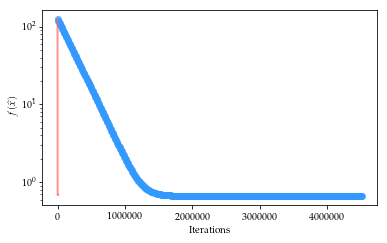

In [44]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 10000
eta = 0.1
verbose = 1
l = 0.1

n = 10000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   
A = np.random.randn(n, p)
x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(len(f_list_SGD))
plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### SVRG 

In [45]:
def SVRG_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    inner_iters = iters//100
    
    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad_full = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad_full += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad_full += 2 * l * x_old
        
        x_tilde = x_old

        for q in range(inner_iters):
        
            grad_1 = np.zeros(p)
            grad_2 = np.zeros(p)
            
            J = np.random.randint(n, size = 50)
            for j in J:
                a = A[j, :]
                grad_1 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_tilde)))) * a.T
                grad_2 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
            grad_1 += 2 * l * x_tilde
            grad_2 += 2 * l * x_old
    
            # Perform gradient step
            x_tilde = x_tilde - eta * (grad_1 - (grad_2 - grad_full))    
        
        x_new = x_tilde
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

50.000000000000036
iter# = 0, ||x_new - x_star||_2 = 0.6724501842535685, f(x_new) = 107.26259819566766
iter# = 1, ||x_new - x_star||_2 = 0.6589823022202199, f(x_new) = 102.96351215091498
iter# = 2, ||x_new - x_star||_2 = 0.6457827534806502, f(x_new) = 98.83492895871268
iter# = 3, ||x_new - x_star||_2 = 0.6328461803353232, f(x_new) = 94.87010425744654
iter# = 4, ||x_new - x_star||_2 = 0.6201673391015348, f(x_new) = 91.06256014626872
iter# = 5, ||x_new - x_star||_2 = 0.6077410946292653, f(x_new) = 87.40607462729317
iter# = 6, ||x_new - x_star||_2 = 0.5955624138535441, f(x_new) = 83.89467151988265
iter# = 7, ||x_new - x_star||_2 = 0.5836263590655335, f(x_new) = 80.52261082550022
iter# = 8, ||x_new - x_star||_2 = 0.5719280816730559, f(x_new) = 77.28437951408671
iter# = 9, ||x_new - x_star||_2 = 0.5604628170456968, f(x_new) = 74.17468269926248
iter# = 10, ||x_new - x_star||_2 = 0.5492258806863279, f(x_new) = 71.18843517075186
iter# = 11, ||x_new - x_star||_2 = 0.5382126656101615, f(x_new) =

iter# = 106, ||x_new - x_star||_2 = 0.06826344115554711, f(x_new) = 1.3451040167678148
iter# = 107, ||x_new - x_star||_2 = 0.06654076119679841, f(x_new) = 1.301388090048185
iter# = 108, ||x_new - x_star||_2 = 0.06485487674975333, f(x_new) = 1.2598613067037965
iter# = 109, ||x_new - x_star||_2 = 0.06320554293942753, f(x_new) = 1.2204216195375506
iter# = 110, ||x_new - x_star||_2 = 0.06159251241532986, f(x_new) = 1.182970877550272
iter# = 111, ||x_new - x_star||_2 = 0.06001552898408389, f(x_new) = 1.1474147272524564
iter# = 112, ||x_new - x_star||_2 = 0.05847432122057772, f(x_new) = 1.1136625214839952
iter# = 113, ||x_new - x_star||_2 = 0.0569685965648988, f(x_new) = 1.0816272340304267
iter# = 114, ||x_new - x_star||_2 = 0.05549803634700916, f(x_new) = 1.0512253780829743
iter# = 115, ||x_new - x_star||_2 = 0.05406229205572862, f(x_new) = 1.022376926572183
iter# = 116, ||x_new - x_star||_2 = 0.05266098301542661, f(x_new) = 0.9950052325888747
iter# = 117, ||x_new - x_star||_2 = 0.051293695

iter# = 0, ||x_new - x_star||_2 = 0.6327564837895695, f(x_new) = 107.54184295315517
iter# = 1, ||x_new - x_star||_2 = 0.6206134827883433, f(x_new) = 103.50266091958454
iter# = 2, ||x_new - x_star||_2 = 0.6081952900981656, f(x_new) = 99.61961100238108
iter# = 3, ||x_new - x_star||_2 = 0.5959980406960554, f(x_new) = 95.88599171333112
iter# = 4, ||x_new - x_star||_2 = 0.5829336257038678, f(x_new) = 92.30305580161367
iter# = 5, ||x_new - x_star||_2 = 0.5719741887046117, f(x_new) = 88.85362700731174
iter# = 6, ||x_new - x_star||_2 = 0.5603383900857024, f(x_new) = 85.53793376448237
iter# = 7, ||x_new - x_star||_2 = 0.5495266848144228, f(x_new) = 82.34677417939112
iter# = 8, ||x_new - x_star||_2 = 0.5381895697500994, f(x_new) = 79.27988081871645
iter# = 9, ||x_new - x_star||_2 = 0.5275883121412903, f(x_new) = 76.32975203306715
iter# = 10, ||x_new - x_star||_2 = 0.5172537540857474, f(x_new) = 73.49186369441261
iter# = 11, ||x_new - x_star||_2 = 0.5068738667943813, f(x_new) = 70.76249599407632


iter# = 97, ||x_new - x_star||_2 = 0.09036233178422702, f(x_new) = 3.5763429083272635
iter# = 98, ||x_new - x_star||_2 = 0.08805534082634106, f(x_new) = 3.4722311553634095
iter# = 99, ||x_new - x_star||_2 = 0.08644318042683358, f(x_new) = 3.371342613715922
iter# = 100, ||x_new - x_star||_2 = 0.08377370731614024, f(x_new) = 3.274942839427726
iter# = 101, ||x_new - x_star||_2 = 0.08261317857929518, f(x_new) = 3.1814966227681962
iter# = 102, ||x_new - x_star||_2 = 0.08137650252855856, f(x_new) = 3.090962332412568
iter# = 103, ||x_new - x_star||_2 = 0.08023339025189513, f(x_new) = 3.003327374049708
iter# = 104, ||x_new - x_star||_2 = 0.0781245095623363, f(x_new) = 2.918975076943763
iter# = 105, ||x_new - x_star||_2 = 0.07616007681861958, f(x_new) = 2.838349023619561
iter# = 106, ||x_new - x_star||_2 = 0.0745942736232585, f(x_new) = 2.7603775849300733
iter# = 107, ||x_new - x_star||_2 = 0.07371831709364744, f(x_new) = 2.6847221666676
iter# = 108, ||x_new - x_star||_2 = 0.07323732572354005, 

iter# = 195, ||x_new - x_star||_2 = 0.01601244497234871, f(x_new) = 0.7171387391919406
iter# = 196, ||x_new - x_star||_2 = 0.016321449807878963, f(x_new) = 0.7146578429724404
iter# = 197, ||x_new - x_star||_2 = 0.015029203028436236, f(x_new) = 0.7122690025227799
iter# = 198, ||x_new - x_star||_2 = 0.014795161786996268, f(x_new) = 0.7100379845674276
iter# = 199, ||x_new - x_star||_2 = 0.014716284685919958, f(x_new) = 0.7076667574420351
iter# = 200, ||x_new - x_star||_2 = 0.014288573121115661, f(x_new) = 0.705673963746757
iter# = 201, ||x_new - x_star||_2 = 0.014357879650111463, f(x_new) = 0.7033791093110683
iter# = 202, ||x_new - x_star||_2 = 0.01403049471307054, f(x_new) = 0.7012450702977538
iter# = 203, ||x_new - x_star||_2 = 0.01521972276460113, f(x_new) = 0.6991792469195446
iter# = 204, ||x_new - x_star||_2 = 0.013303824872035174, f(x_new) = 0.697462437681796
iter# = 205, ||x_new - x_star||_2 = 0.014695569753261563, f(x_new) = 0.6952926132524677
iter# = 206, ||x_new - x_star||_2 = 0

iter# = 294, ||x_new - x_star||_2 = 0.009855475791545066, f(x_new) = 0.6510567735510497
iter# = 295, ||x_new - x_star||_2 = 0.010197903656183971, f(x_new) = 0.6508302063569087
iter# = 296, ||x_new - x_star||_2 = 0.010081278381419326, f(x_new) = 0.650982616012267
iter# = 297, ||x_new - x_star||_2 = 0.010101685463444997, f(x_new) = 0.6509284901414922
iter# = 298, ||x_new - x_star||_2 = 0.010389873804615155, f(x_new) = 0.650925621032437
iter# = 299, ||x_new - x_star||_2 = 0.009675950389599283, f(x_new) = 0.6509337419493734
iter# = 300, ||x_new - x_star||_2 = 0.009876215857477909, f(x_new) = 0.6508794315392935
iter# = 301, ||x_new - x_star||_2 = 0.009751556915232737, f(x_new) = 0.6507606520226131
iter# = 302, ||x_new - x_star||_2 = 0.00991411711114797, f(x_new) = 0.6507312269718911
iter# = 303, ||x_new - x_star||_2 = 0.009594686042277797, f(x_new) = 0.6505839877814096
iter# = 304, ||x_new - x_star||_2 = 0.009952888044348964, f(x_new) = 0.6506087918114731
iter# = 305, ||x_new - x_star||_2 =

iter# = 397, ||x_new - x_star||_2 = 0.00972237332873827, f(x_new) = 0.6493938704539608
iter# = 398, ||x_new - x_star||_2 = 0.01014036567963987, f(x_new) = 0.6493497528034103
iter# = 399, ||x_new - x_star||_2 = 0.009544291723192372, f(x_new) = 0.6493580641751923
iter# = 400, ||x_new - x_star||_2 = 0.009064494893272827, f(x_new) = 0.6492350366836818
iter# = 401, ||x_new - x_star||_2 = 0.009982794838237245, f(x_new) = 0.6492904940437215
iter# = 402, ||x_new - x_star||_2 = 0.009579234328710846, f(x_new) = 0.6492958536371752
iter# = 403, ||x_new - x_star||_2 = 0.009955151084122052, f(x_new) = 0.6493938174433533
iter# = 404, ||x_new - x_star||_2 = 0.010063372890520937, f(x_new) = 0.6493511410591171
iter# = 405, ||x_new - x_star||_2 = 0.009529418799117468, f(x_new) = 0.6493795689154885
iter# = 406, ||x_new - x_star||_2 = 0.01014948129221597, f(x_new) = 0.6493178773801943
iter# = 407, ||x_new - x_star||_2 = 0.009718632837802279, f(x_new) = 0.6493866181391785
iter# = 408, ||x_new - x_star||_2 =

iter# = 499, ||x_new - x_star||_2 = 0.009703785120571958, f(x_new) = 0.6492580710396902
iter# = 500, ||x_new - x_star||_2 = 0.009505278116161094, f(x_new) = 0.6491656850678323
iter# = 501, ||x_new - x_star||_2 = 0.009511588008892442, f(x_new) = 0.6492238513770975
iter# = 502, ||x_new - x_star||_2 = 0.010340059981127504, f(x_new) = 0.6491458119975394
iter# = 503, ||x_new - x_star||_2 = 0.009444888968721626, f(x_new) = 0.6489867602599623
iter# = 504, ||x_new - x_star||_2 = 0.009856991256259027, f(x_new) = 0.6490886790114474
iter# = 505, ||x_new - x_star||_2 = 0.009968124870531517, f(x_new) = 0.6490220375981581
iter# = 506, ||x_new - x_star||_2 = 0.009981063486991832, f(x_new) = 0.6491042310255122
iter# = 507, ||x_new - x_star||_2 = 0.009426603702556676, f(x_new) = 0.6491268849915031
iter# = 508, ||x_new - x_star||_2 = 0.009634499528944898, f(x_new) = 0.6491407054290133
iter# = 509, ||x_new - x_star||_2 = 0.010302535516684799, f(x_new) = 0.6490439966698173
iter# = 510, ||x_new - x_star||_

iter# = 599, ||x_new - x_star||_2 = 0.009762372987898098, f(x_new) = 0.6490376536523477
iter# = 600, ||x_new - x_star||_2 = 0.010394592111032913, f(x_new) = 0.6492744514778848
iter# = 601, ||x_new - x_star||_2 = 0.009497157370570811, f(x_new) = 0.6492657842722647
iter# = 602, ||x_new - x_star||_2 = 0.009822299656277789, f(x_new) = 0.6492290769002317
iter# = 603, ||x_new - x_star||_2 = 0.009800542278242048, f(x_new) = 0.6491388546225707
iter# = 604, ||x_new - x_star||_2 = 0.009583117642466632, f(x_new) = 0.6491612952404894
iter# = 605, ||x_new - x_star||_2 = 0.009986546496458693, f(x_new) = 0.6492338282341578
iter# = 606, ||x_new - x_star||_2 = 0.009929211193277259, f(x_new) = 0.649359560196637
iter# = 607, ||x_new - x_star||_2 = 0.009668387331571594, f(x_new) = 0.6492698291029896
iter# = 608, ||x_new - x_star||_2 = 0.009990855944068382, f(x_new) = 0.6493605086577299
iter# = 609, ||x_new - x_star||_2 = 0.010123496721244286, f(x_new) = 0.6493305585450591
iter# = 610, ||x_new - x_star||_2

iter# = 700, ||x_new - x_star||_2 = 0.009659363013028499, f(x_new) = 0.6492227170988164
iter# = 701, ||x_new - x_star||_2 = 0.009601738491443246, f(x_new) = 0.6491242330551342
iter# = 702, ||x_new - x_star||_2 = 0.009425890784268334, f(x_new) = 0.649137590861442
iter# = 703, ||x_new - x_star||_2 = 0.010095038620567173, f(x_new) = 0.6491004066812202
iter# = 704, ||x_new - x_star||_2 = 0.009540396528875648, f(x_new) = 0.648936893731923
iter# = 705, ||x_new - x_star||_2 = 0.009385304675429912, f(x_new) = 0.6488697017903791
iter# = 706, ||x_new - x_star||_2 = 0.009776371728641684, f(x_new) = 0.6487498672621408
iter# = 707, ||x_new - x_star||_2 = 0.009660262722264727, f(x_new) = 0.6488237530210692
iter# = 708, ||x_new - x_star||_2 = 0.009749470139889279, f(x_new) = 0.6488256193573679
iter# = 709, ||x_new - x_star||_2 = 0.009785236279010241, f(x_new) = 0.6487559306100219
iter# = 710, ||x_new - x_star||_2 = 0.010128321779745876, f(x_new) = 0.648754190792215
iter# = 711, ||x_new - x_star||_2 =

iter# = 800, ||x_new - x_star||_2 = 0.009818205062507487, f(x_new) = 0.6489234937579755
iter# = 801, ||x_new - x_star||_2 = 0.010067657410779068, f(x_new) = 0.6489926848239097
iter# = 802, ||x_new - x_star||_2 = 0.009261882372680854, f(x_new) = 0.6490289107961849
iter# = 803, ||x_new - x_star||_2 = 0.009802651282084235, f(x_new) = 0.6487732376441656
iter# = 804, ||x_new - x_star||_2 = 0.009323850804039285, f(x_new) = 0.6486998311075614
iter# = 805, ||x_new - x_star||_2 = 0.009535804752539909, f(x_new) = 0.6486524153446167
iter# = 806, ||x_new - x_star||_2 = 0.00997044558858495, f(x_new) = 0.648711422960816
iter# = 807, ||x_new - x_star||_2 = 0.009696432535721704, f(x_new) = 0.6486376854276433
iter# = 808, ||x_new - x_star||_2 = 0.009887852419839327, f(x_new) = 0.6486676534218009
iter# = 809, ||x_new - x_star||_2 = 0.010207120678961299, f(x_new) = 0.6488232629230712
iter# = 810, ||x_new - x_star||_2 = 0.009809507870422271, f(x_new) = 0.6489465744014397
iter# = 811, ||x_new - x_star||_2 

iter# = 898, ||x_new - x_star||_2 = 0.01051810165646032, f(x_new) = 0.6494919015498918
iter# = 899, ||x_new - x_star||_2 = 0.010022605574768317, f(x_new) = 0.6494576827113955
iter# = 900, ||x_new - x_star||_2 = 0.01019474814580848, f(x_new) = 0.6495354825239664
iter# = 901, ||x_new - x_star||_2 = 0.009533078767950393, f(x_new) = 0.6496471428886763
iter# = 902, ||x_new - x_star||_2 = 0.009972879573302623, f(x_new) = 0.6495795246415224
iter# = 903, ||x_new - x_star||_2 = 0.010401143286868244, f(x_new) = 0.6494472295270397
iter# = 904, ||x_new - x_star||_2 = 0.009923268090903964, f(x_new) = 0.6495529926526508
iter# = 905, ||x_new - x_star||_2 = 0.010093963405443477, f(x_new) = 0.6494389333296169
iter# = 906, ||x_new - x_star||_2 = 0.010079957689275915, f(x_new) = 0.6494444343273272
iter# = 907, ||x_new - x_star||_2 = 0.009563783179568354, f(x_new) = 0.6495174774429592
iter# = 908, ||x_new - x_star||_2 = 0.009849744805086389, f(x_new) = 0.649665717825288
iter# = 909, ||x_new - x_star||_2 =

iter# = 996, ||x_new - x_star||_2 = 0.009942456483243883, f(x_new) = 0.6495440499701318
iter# = 997, ||x_new - x_star||_2 = 0.009994316106361133, f(x_new) = 0.6495358671229755
iter# = 998, ||x_new - x_star||_2 = 0.009870992017303695, f(x_new) = 0.6494235638950517
iter# = 999, ||x_new - x_star||_2 = 0.009786295341041473, f(x_new) = 0.6492854223985883
Number of steps: 1001
iter# = 0, ||x_new - x_star||_2 = 6.150414036028002, f(x_new) = 74.17042438126296
iter# = 1, ||x_new - x_star||_2 = 5.023087849665907, f(x_new) = 49.115129336680106
iter# = 2, ||x_new - x_star||_2 = 4.100941469584129, f(x_new) = 32.41985490486216
iter# = 3, ||x_new - x_star||_2 = 3.3454149018202224, f(x_new) = 21.315386702152423
iter# = 4, ||x_new - x_star||_2 = 2.7256330935327253, f(x_new) = 13.950148785549473
iter# = 5, ||x_new - x_star||_2 = 2.2162921122651937, f(x_new) = 9.08705109673677
iter# = 6, ||x_new - x_star||_2 = 1.7957606379056346, f(x_new) = 5.901630449679788
iter# = 7, ||x_new - x_star||_2 = 1.4471079279

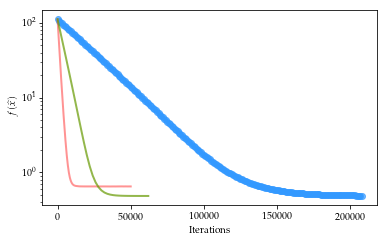

In [46]:
# Run algorithm
epsilon = 5e-3                # Precision parameter
iters = 1000
verbose = 1
l = 0.1

n = 1000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 50, p)
S = np.diag(S)
A = U.dot(S.dot(V.T))
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

eta = 0.1

x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
eta = 0.1
x_SVRG, f_list_SVRG = SVRG_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(0, len(f_list_SGD)*50, 50)
xs_SVRG = range(0, len(f_list_SVRG)*2*n, 2*n)

plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_SVRG, f_list_SVRG, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()